# Logistic Regression, Neural Networks

In the following, we consider a classification problem with two classes (_i.e._ binary classification problem), namely $C_1$ and $C_2$.

## Logistic Regression
Linear regression (regression problem):
$$y=\gamma_0+\sideset{}{_{k=1}^p}\sum  \gamma_i x_k$$
Logistic regression (binary classification problem):
$$\mathbb{P}(C_1|X=x)=\text{sigmoïd}\left(\gamma_0+\sideset{}{_{k=1}^p}\sum  \gamma_k x_k\right)=\frac{exp\left(\gamma_0+\sideset{}{_{k=1}^p}\sum  \gamma_k x_k\right)}{1+exp\left(\gamma_0+\sideset{}{_{k=1}^p}\sum  \gamma_k x_k\right)}$$

<img src="sigmoid.png" width="400">


The sigmoïd function maps $\mathbb{R}$ to $]0;1[$. In a classification context, this function is used to obtain a probability value from an ordinary real value. With the logistic regression, the sigmoïd maps the value given by a linear model to a probabilty.

<font color='red'>**Q1:**</font> Load the file "lab2.csv" in a data frame `df`. To do this, use the function `pd.read_csv(filename)`. Then, execute the `head()` method of `df` to see the first lines of the data frame. Then, plot the data with $x_1$ on the $x$-axis and $x_2$ on the $y$-axis. 

<font color='green'>**Hints for Q1:**</font> To plot the data, use the function `plt.scatter(x,y,c)` where `c` specifies the color of the points, followed by `plt.show()` to show the plot. Using the option `c=df.c`, the color of the points will depend on the variable "c".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.neural_network

import utilslab2

In [2]:
df = pd.read_csv("lab2.csv")
df.head()


x1          x2   c
0  104.798639  108.772169  C1
1  105.658004   98.375060  C2
2   99.410973   93.085385  C1
3   96.442608  107.150154  C2
4   98.439695   97.055206  C2

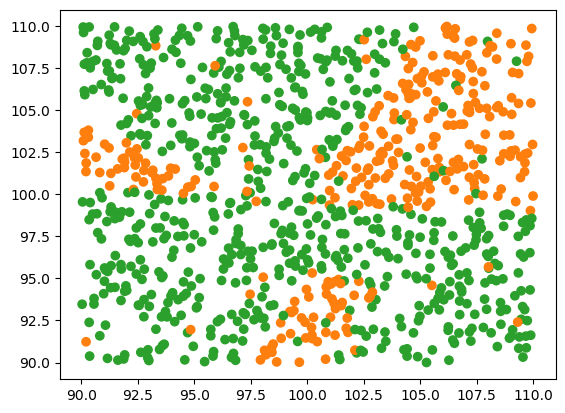

In [5]:
plt.figure()
plt.scatter(df.x1, df.x2, c=df.c)
plt.show()

<font color='red'>**Q2:**</font> Using the function `fitlogistic(s)` below, fit a logistic regression model to the data `df`.

In [7]:
def fitlogistic(s):
    model = sklearn.linear_model.LogisticRegression(C=1e6, solver='lbfgs')
    model.fit(s[["x1","x2"]], s.c)
    return model

model = fitlogistic(df) # answer Q2 here by replacing None

<font color='red'>**Q3:**</font> Once the model is fitted, consider $p \in ]0;1[$, what is the locus (the shape) of the set of points $\lbrace(x_1,x_2)\in~{\mathbb{R}}^2|~\mathbb{P}(C_1|X=(x_1,x_2))=p\rbrace$? When $p=0.5$, this locus is called the _decision boundary_. This _decision boundary_ supposedly separates the two classes. Plot the _decision boundary_ of the fitted model `model` by calling `utilslab2.drawDecisionBoundary(model,df,colors=["blue"],linewidths=3)`.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


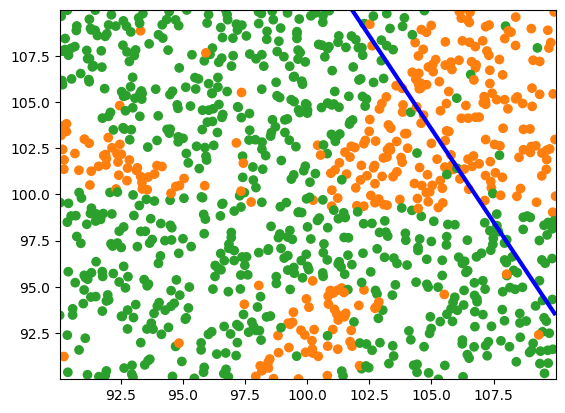

In [9]:
# THe locus is one due to sigmoid and linearity on variables
plt.scatter(df.x1, df.x2, color=df.c)
utilslab2.drawDecisionBoundary(model,df,colors=["blue"], linewidths=3)
plt.show()

<font color='red'>**Q4:**</font> If we consider a more general model: $\mathbb{P}(C_1|X=x)=\text{sigmoïd}(f(x))$, what is the equation of the _decision boundary_ ? In our data set, how many regions contain a lot of examples in $C_1$? Likewise, how many regions contain a lot of examples in $C_2$? Thus, is it possible to obtain a good prediction if we consider $f(x)=\gamma_0+\gamma_1~x_1+\gamma_2~x_2+\gamma_3~x_1*x_2+\gamma_4~{x_1}^2+\gamma_5~{x_2}^2$?

Q4. Decision boundary is again a line. C1 contains 3 regions and C2 1 region.

No, good prediction because we need more than 2 classes. Decision boundary should be at least cubic.

## Neural Network with $n$ Units on 1 Hidden Layer
Neural network (regression problem):
$$y=\gamma_0+\sideset{}{_{k=1}^n}\sum  \gamma_k ~\text{sigmoïd}\left({\beta}_{k,0}+\sideset{}{_{i=1}^p}\sum  {\beta}_{k,i} x_i\right)$$
Neural network (binary classification problem):
$$\mathbb{P}(C_1|X=x)=f(\beta,\gamma;x)=\text{sigmoïd}\left(\gamma_0+\sideset{}{_{k=1}^n}\sum  \gamma_k ~\text{sigmoïd}\left({\beta}_{k,0}+\sideset{}{_{i=1}^p}\sum  {\beta}_{k,i} x_i\right)\right)$$


The outer sigmoïd is used to map a real value to a probability, as with the logistic regression. However, the inner sigmoïds are used in a different way. They are used to build new features. Each unit on the hidden layer builds one new feature.

If we look at the sigmoïd function, we have a linear part near zero. We have a curvilinear part at $\lvert x \rvert\simeq 2$ and if $\lvert x \rvert \geq 6$ the sigmoïd is almost constant. For a given set of examples, depending on the coefficients $\left({\beta}_{k,0},\ldots,{\beta}_{k,p}\right)$, the values ${\beta}_{k,0}+\sideset{}{_{i=1}^p}\sum  {\beta}_{k,i} x_i$ will be different, they can be close to each other or very widespread. If these are close to each other (see Figure a) then only one part of the sigmoïd will be used; it can be the linear or the constant part. If these values are widespread (see Figure b), the largest values will be flattened to 1 and the smallest values will be flattened to 0.

<img src="sigmoid2.png" width="1000">


<font color='red'>**Q5:**</font> A neural network model can be trained using the `sklearn.neural_network.MLPClassifier` class, see documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). The number of hidden units is specified by the `nhidden` parameter. The regularization hyper-parameter is `alpha`. In order to obtain the $\beta$ and $\gamma$ parameters, an optimization algorithm is applied. Prior to this optimization, the standardization of the explanatory variables is done using `sklearn.preprocessing.StandardScaler` and `sklearn.pipeline.make_pipeline`. The code obtained is given below. Plot the _decision boundary_ using `utilslab2.drawDecisionBoundary(nnet,df,colors=["blue"], linewidths=3)`. Re-run the training/plot command again and again. What do you observe? What happens if you deactivate the scaling using `return net` instead of `return model` ?


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.97712D-01    |proj g|=  2.97443D-01

At iterate    1    f=  6.32661D-01    |proj g|=  3.34743D-02

At iterate    2    f=  6.27367D-01    |proj g|=  1.61331D-02

At iterate    3    f=  6.24167D-01    |proj g|=  2.18162D-02

At iterate    4    f=  6.15501D-01    |proj g|=  4.36114D-02

At iterate    5    f=  5.99718D-01    |proj g|=  5.42133D-02

At iterate    6    f=  5.72724D-01    |proj g|=  3.46907D-02

At iterate    7    f=  5.63118D-01    |proj g|=  4.00600D-02

At iterate    8    f=  5.60428D-01    |proj g|=  1.39955D-02

At iterate    9    f=  5.43171D-01    |proj g|=  4.66234D-02

At iterate   10    f=  5.28921D-01    |proj g|=  2.41057D-02

At iterate   11    f=  5.21950D-01    |proj g|=  1.03014D-02

At iterate   12    f=  5.19396D-01    |proj g|=  9.24338

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


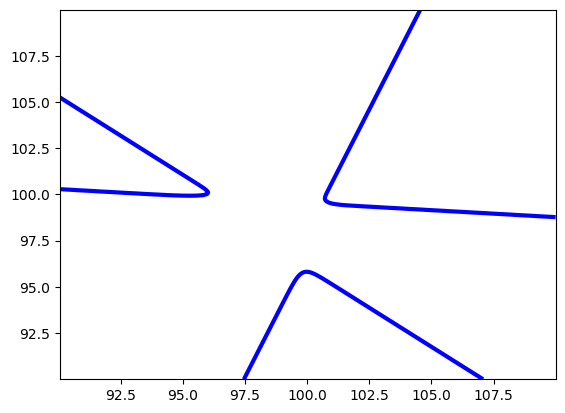

In [20]:
def buildneuralnet(nhidden=3,alpha=1e-6):
    scale = sklearn.preprocessing.StandardScaler()
    hidden_layer_sizes = (nhidden,)
    net = sklearn.neural_network.MLPClassifier(hidden_layer_sizes,activation="logistic",verbose=True, solver='lbfgs',alpha=alpha, max_iter=1000)
    model = sklearn.pipeline.make_pipeline(scale, net)
    return model

nnet = buildneuralnet()
nnet.fit(df[["x1","x2"]], df.c)
utilslab2.drawDecisionBoundary(nnet,df,colors=["blue"], linewidths=3)
# Avec model, a chaque rerun la frontiere change
# Avec net, aucune frontiere n'est trouve

<font color='red'>**Q6:**</font> Let us consider the sets $F$ and $S$ defined as follow:
\begin{align*}
& F=\lbrace x\mapsto f(\beta,\gamma;x_1,\ldots,x_p)~|~\gamma\in~{\mathbb{R}}^{n+1},~\beta\in~{\mathbb{R}}^{n(p+1)}\rbrace \\
& S=\lbrace x\mapsto f\left(\beta,\gamma;l_1\left(x_1\right),\ldots,l_p\left(x_p\right)\right)~|~\gamma\in~{\mathbb{R}}^{n+1},~\beta\in~{\mathbb{R}}^{n(p+1)}\rbrace
\end{align*}
where $l_i$ are nonconstant linear functions.

How do the sets $F$ and $S$ compare? In order to standardize the explanatory variables, nonconstant linear functions $l_i$ are applied to the $x_i$'s. Why does the standardization help to obtain a good model?

<font color='red'>**Q7:**</font> Show that a neural network model can be seen as a logistic model in a space with new features $(\phi_1(x_1,\ldots,x_p),\ldots,\phi_n(x_1,\ldots,x_p))$, where the $\phi_i$ are functions that map ${\mathbb{R}}^p$ to $]0;1[$.

<font color='red'>**Q8:**</font> This space with new feature can be plotted when $n=3$. Use the function `utilslab2.drawPhiSpace(nnet,df)` to plot this space.

Q6. Standardiser c'est pour eviter d'etre sur les plateaux de la sigmoid afin d'avoir une descente de gradient. Ainsi on se trouve dans la partie linéaire de la sigmoid.
F = S car li correspond à une normalisation lineaire. li doit etre surjective.

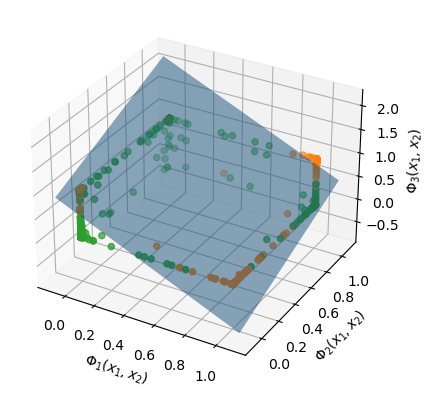

In [21]:
utilslab2.drawPhiSpace(nnet,df)

<font color='red'>**Q9:**</font> If we have more than 3 units in the hidden layers (*i.e.* $n>3$) it is difficult to plot in the $(\phi_1(x_1,\ldots,x_p),\ldots,\phi_n(x_1,\ldots,x_p))$ space. However, to visualize the new features, you can call `utilslab2.drawNewFeaturesLine(nnet,df)`. For each feature $\Phi_k(x_1,\ldots,x_p)$, it plots the line $\beta_{k,0}+\sideset{}{_{i=1}^p}\sum  \beta_{k,i} x_i=-2$ in yellow, the line $\beta_{k,0}+\sideset{}{_{i=1}^p}\sum  \beta_{k,i} x_i=0$ in black and the line $\beta_{k,0}+\sideset{}{_{i=1}^p}\sum  \beta_{k,i} x_i=2$ in red. What is the value of the new feature $\phi_k(x_1,\ldots,x_p)$ for a point on the yellow line? What if this point is on the black line? What if this point is on the red line?

<font color='red'>**Q10:**</font> Use `utilslab2.drawNewFeaturesLine(nnet,df)` to plot these lines for $n=7$ and different values of decay like $1e0$, $1e-2$ and $1e-20$. What happens to the gap between the black/green/red lines when the decay decreases? Is it consistent with what you know about the purpose of the decay?

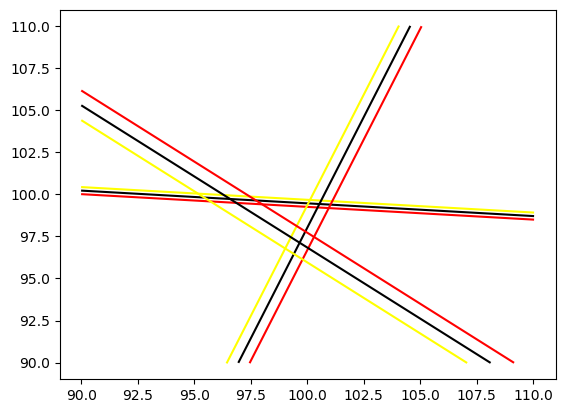

In [23]:
utilslab2.drawNewFeaturesLine(nnet,df)
# Phi_k(x1, ..., xp) = -2 => sur la sigmoid on est proche de 0.
# -2 et 2 : lineaire
# 2 : proche de 1.
# La droite noire correspond à la valeur 0.5 pour la sigmoid

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84363D-01    |proj g|=  1.71068D-01

At iterate    1    f=  6.25722D-01    |proj g|=  1.85530D-02

At iterate    2    f=  6.14829D-01    |proj g|=  1.66218D-02

At iterate    3    f=  5.66691D-01    |proj g|=  6.05810D-03

At iterate    4    f=  5.62121D-01    |proj g|=  1.61395D-02

At iterate    5    f=  5.59117D-01    |proj g|=  1.66633D-02

At iterate    6    f=  5.53007D-01    |proj g|=  7.88659D-03

At iterate    7    f=  5.48671D-01    |proj g|=  6.96246D-03

At iterate    8    f=  5.35963D-01    |proj g|=  3.60413D-02

At iterate    9    f=  5.29299D-01    |proj g|=  2.80692D-02

At iterate   10    f=  5.18802D-01    |proj g|=  6.56271D-03

At iterate   11    f=  5.15664D-01    |proj g|=  9.10109D-03

At iterate   12    f=  5.10930D-01    |proj g|=  2.11566

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


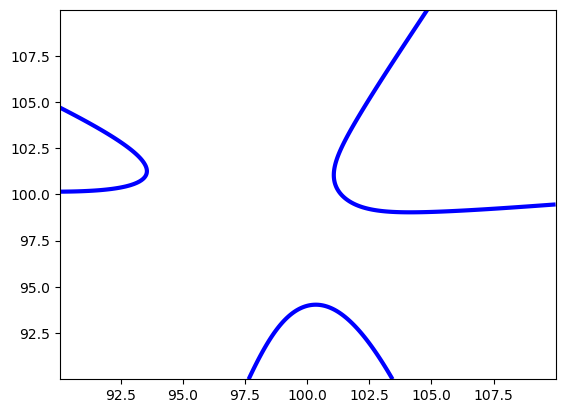

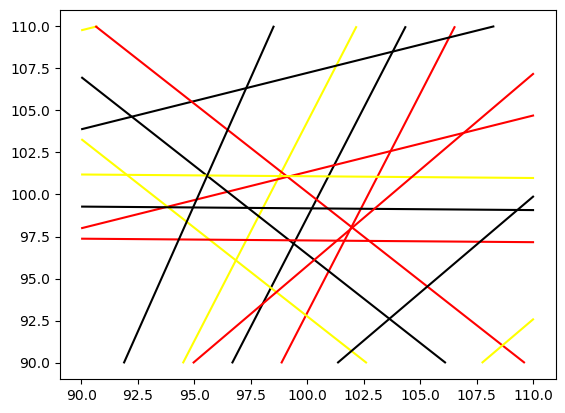

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36563D-01    |proj g|=  2.46041D-01

At iterate    1    f=  6.55565D-01    |proj g|=  1.36745D-01

At iterate    2    f=  6.04317D-01    |proj g|=  3.14501D-02

At iterate    3    f=  5.99122D-01    |proj g|=  1.89377D-02

At iterate    4    f=  5.93909D-01    |proj g|=  2.60586D-02

At iterate    5    f=  5.73112D-01    |proj g|=  5.63437D-02

At iterate    6    f=  5.64383D-01    |proj g|=  3.34048D-02

At iterate    7    f=  5.59924D-01    |proj g|=  4.31519D-03

At iterate    8    f=  5.59746D-01    |proj g|=  4.68996D-03

At iterate    9    f=  5.58351D-01    |proj g|=  7.10574D-03

At iterate   10    f=  5.55154D-01    |proj g|=  1.18692D-02

At iterate   11    f=  5.51158D-01    |proj g|=  1.33021D-02

At iterate   12    f=  5.45364D-01    |proj g|=  1.96475

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


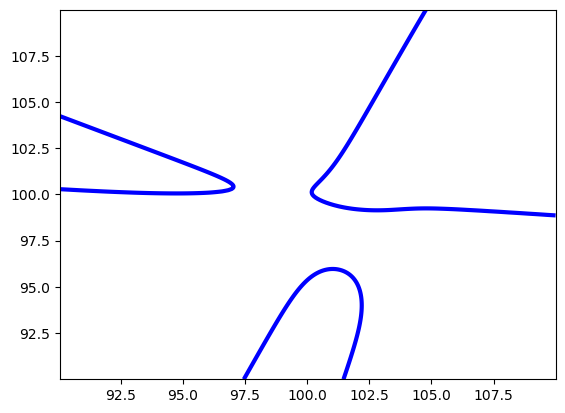

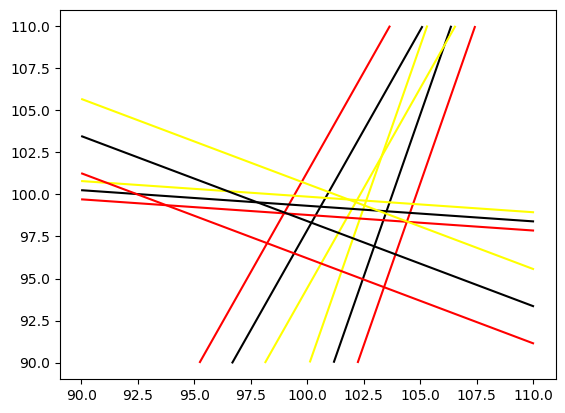

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88948D-01    |proj g|=  3.62081D-01

At iterate    1    f=  6.08013D-01    |proj g|=  2.59643D-02

At iterate    2    f=  6.04797D-01    |proj g|=  1.82415D-02

At iterate    3    f=  5.96999D-01    |proj g|=  2.98960D-02

At iterate    4    f=  5.84555D-01    |proj g|=  6.09918D-02

At iterate    5    f=  5.72601D-01    |proj g|=  6.25557D-02

At iterate    6    f=  5.59603D-01    |proj g|=  1.16464D-02

At iterate    7    f=  5.58169D-01    |proj g|=  9.15028D-03

At iterate    8    f=  5.56352D-01    |proj g|=  1.96784D-02

At iterate    9    f=  5.51561D-01    |proj g|=  3.57849D-02

At iterate   10    f=  5.45475D-01    |proj g|=  3.18768D-02

At iterate   11    f=  5.30023D-01    |proj g|=  1.93949D-02

At iterate   12    f=  5.20095D-01    |proj g|=  4.04783

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


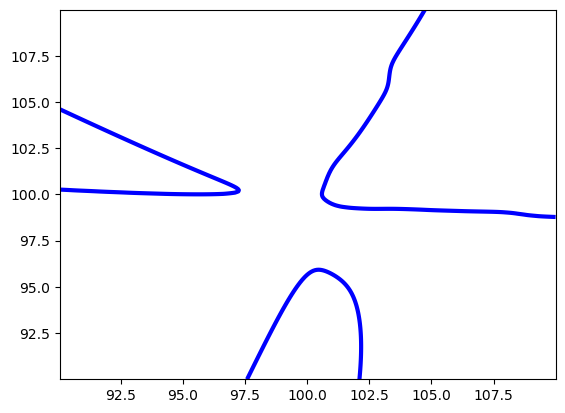

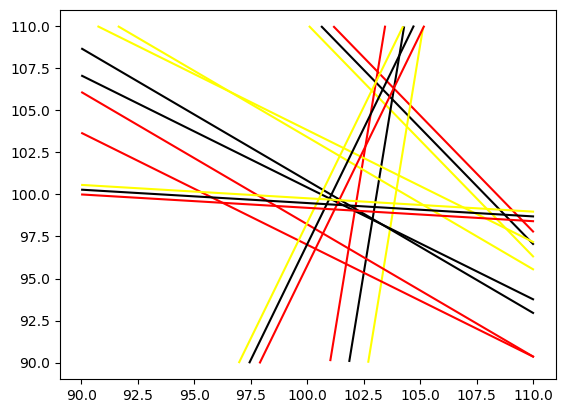

In [29]:
# n = 7
# alpha petit, les droites sont proches
# alpha grand, les droites sont eloignees.
# alpha est le pas de descente , c'est la tolerance de l'erreur que l'on fait en placant la frontiere
# nhidden correspond au nombre de region - 1 .
for alpha in [1, 1e-2, 1e-20]:
    nnet = buildneuralnet(nhidden=7,alpha=alpha)
    nnet.fit(df[["x1","x2"]], df.c)
    
    utilslab2.drawDecisionBoundary(nnet,df,colors=["blue"], linewidths=3)
    plt.show()
    utilslab2.drawNewFeaturesLine(nnet,df)
    plt.show()

## Model Selection and Assessment

As a reminder, a _confusion matrix_ can be useful to analyze the error made in classification:

<table class="wikitable" style="border:none; margin-top:0;">
<tbody><tr>
<th style="background:white; border:none;" colspan="2" rowspan="2">
</th>
<th colspan="3" style="background:none;">Actual class
</th></tr>
<tr>
<th>Positive
</th>
<th>Negative
</th></tr>
<tr>
<th rowspan="3" style="height:6em;"><div style="display: inline-block; -ms-transform: rotate(-90deg); -webkit-transform: rotate(-90deg); transform: rotate(-90deg);;">Predicted<br> class</div>
</th>
<th>Positive
</th>
<td>True Positive
</td>
<td>False Positive <br>(Type I error)
</td></tr>
<tr>
<th>Negative
</th>
<td>False Negative <br>(Type II error)
</td>
<td>True Negative
</td></tr>
</tbody></table>

In classification, one measure (among others) of the ''accuracy'' is the _accuracy_. It is defined as follows:
$$\text{accuracy}=\frac{\text{True Positive} + \text{True Negative}}{\text{All}}$$



<font color='red'>**Q11:**</font> Based on the output of ``df.c.describe()``, what would be the _accuracy_ of a model predicting that the class is always $C_1$? What would be the _accuracy_ if the model predicts always $C_2$?

In [32]:
df.c.describe()

# C1 accuracy = 316+0/1000 = 31.6%
# C2 accuracy = 0+684/1000 = 68.4 %

count     1000
unique       2
top         C2
freq       684
Name: c, dtype: object

### Model Selection
<font color='red'>**Q12:**</font> One can use a cross-validation procedure to select the best hyper-parameter. With the code below, `clf.fit` performs two operations in the following order:
1. A 5-fold cross-validation is used to select the best hyper-parameter;
2. The model with the best hyper-parameter is fitted using the whole dataset.

Using `clf.cv_results_`:

- looking at the `'params'` field, which hyper-parameters were tested ?
    learning_rate and number of hidden layers sizes
- looking at the `'mean_test_score'` field, which hyper-parameter is the best ?
        alpha=0.1 and hidden_layers_size=7 car le score sur le test est le plus elevé


In [33]:
nnet = buildneuralnet()
parameters={'mlpclassifier__alpha':[1e-1,1],'mlpclassifier__hidden_layer_sizes':[(1,),(7,),(104,)]}
clf = sklearn.model_selection.GridSearchCV(nnet, parameters, cv=5, scoring = 'accuracy')
clf.fit(df[["x1","x2"]], df.c)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18242D-01    |proj g|=  1.20575D-02

At iterate    1    f=  5.70466D-01    |proj g|=  1.25652D-02

At iterate    2    f=  5.68299D-01    |proj g|=  1.94414D-02

At iterate    3    f=  5.62778D-01    |proj g|=  2.56005D-02

At iterate    4    f=  5.57069D-01    |proj g|=  1.32869D-02

At iterate    5    f=  5.54013D-01    |proj g|=  1.55593D-02

At iterate    6    f=  5.45102D-01    |proj g|=  4.24576D-02

At iterate    7    f=  5.41029D-01    |proj g|=  5.98496D-02

At iterate    8    f=  5.35429D-01    |proj g|=  5.38228D-02

At iterate    9    f=  5.21444D-01    |proj g|=  3.56869D-02

At iterate   10    f=  5.14412D-01    |proj g|=  1.16546D-02

At iterate   11    f=  5.13568D-01    |proj g|=  5.16229D-03

At iterate   12    f=  5.13231D-01    |proj g|=  2.22302


At iterate   37    f=  2.60851D-01    |proj g|=  5.72550D-03

At iterate   38    f=  2.59706D-01    |proj g|=  4.10193D-03

At iterate   39    f=  2.59017D-01    |proj g|=  2.74260D-03

At iterate   40    f=  2.58806D-01    |proj g|=  3.79508D-03

At iterate   41    f=  2.58479D-01    |proj g|=  2.73249D-03

At iterate   42    f=  2.58098D-01    |proj g|=  3.88253D-03

At iterate   43    f=  2.57914D-01    |proj g|=  1.33396D-03

At iterate   44    f=  2.57853D-01    |proj g|=  7.95303D-04

At iterate   45    f=  2.57753D-01    |proj g|=  8.54558D-04

At iterate   46    f=  2.57468D-01    |proj g|=  2.03801D-03

At iterate   47    f=  2.57129D-01    |proj g|=  2.83977D-03

At iterate   48    f=  2.56312D-01    |proj g|=  3.78615D-03

At iterate   49    f=  2.55885D-01    |proj g|=  3.12798D-03

At iterate   50    f=  2.55688D-01    |proj g|=  6.73158D-03

At iterate   51    f=  2.55015D-01    |proj g|=  2.71779D-03

At iterate   52    f=  2.54717D-01    |proj g|=  1.27593D-03

At iter


At iterate   94    f=  2.63607D-01    |proj g|=  1.57898D-03

At iterate   95    f=  2.63052D-01    |proj g|=  1.28665D-03

At iterate   96    f=  2.62614D-01    |proj g|=  3.27602D-03

At iterate   97    f=  2.62228D-01    |proj g|=  2.31516D-03

At iterate   98    f=  2.62092D-01    |proj g|=  3.30590D-03

At iterate   99    f=  2.61977D-01    |proj g|=  3.99943D-03

At iterate  100    f=  2.61782D-01    |proj g|=  3.62399D-03

At iterate  101    f=  2.61544D-01    |proj g|=  2.95433D-03

At iterate  102    f=  2.61410D-01    |proj g|=  2.84759D-03

At iterate  103    f=  2.61357D-01    |proj g|=  2.94434D-03

At iterate  104    f=  2.61100D-01    |proj g|=  2.74563D-03

At iterate  105    f=  2.60392D-01    |proj g|=  1.78022D-03

At iterate  106    f=  2.59777D-01    |proj g|=  2.30990D-03

At iterate  107    f=  2.59178D-01    |proj g|=  2.19135D-03

At iterate  108    f=  2.58929D-01    |proj g|=  3.14278D-03

At iterate  109    f=  2.58561D-01    |proj g|=  2.31644D-03

At iter


At iterate  333    f=  2.41386D-01    |proj g|=  2.10505D-04

At iterate  334    f=  2.41385D-01    |proj g|=  2.25405D-04

At iterate  335    f=  2.41383D-01    |proj g|=  2.28478D-04

At iterate  336    f=  2.41380D-01    |proj g|=  2.76411D-04

At iterate  337    f=  2.41379D-01    |proj g|=  4.60177D-04

At iterate  338    f=  2.41376D-01    |proj g|=  3.27120D-04

At iterate  339    f=  2.41376D-01    |proj g|=  2.91079D-04

At iterate  340    f=  2.41373D-01    |proj g|=  2.02395D-04

At iterate  341    f=  2.41370D-01    |proj g|=  1.76263D-04

At iterate  342    f=  2.41368D-01    |proj g|=  1.82750D-04

At iterate  343    f=  2.41367D-01    |proj g|=  1.33034D-04

At iterate  344    f=  2.41366D-01    |proj g|=  1.40463D-04

At iterate  345    f=  2.41365D-01    |proj g|=  1.35221D-04

At iterate  346    f=  2.41363D-01    |proj g|=  2.35020D-04

At iterate  347    f=  2.41359D-01    |proj g|=  2.68202D-04

At iterate  348    f=  2.41357D-01    |proj g|=  3.98139D-04

At iter


At iterate  172    f=  2.56443D-01    |proj g|=  1.07530D-03

At iterate  173    f=  2.56408D-01    |proj g|=  2.04105D-03

At iterate  174    f=  2.56345D-01    |proj g|=  1.80122D-03

At iterate  175    f=  2.56281D-01    |proj g|=  7.42694D-04

At iterate  176    f=  2.56244D-01    |proj g|=  8.06753D-04

At iterate  177    f=  2.56217D-01    |proj g|=  9.88945D-04

At iterate  178    f=  2.56179D-01    |proj g|=  6.86498D-04

At iterate  179    f=  2.56163D-01    |proj g|=  6.42447D-04

At iterate  180    f=  2.56126D-01    |proj g|=  6.33342D-04

At iterate  181    f=  2.56091D-01    |proj g|=  6.48319D-04

At iterate  182    f=  2.56047D-01    |proj g|=  1.36734D-03

At iterate  183    f=  2.55935D-01    |proj g|=  8.92979D-04

At iterate  184    f=  2.55865D-01    |proj g|=  5.53480D-04

At iterate  185    f=  2.55766D-01    |proj g|=  1.04877D-03

At iterate  186    f=  2.55750D-01    |proj g|=  4.76548D-04

At iterate  187    f=  2.55729D-01    |proj g|=  5.80190D-04

At iter


At iterate  407    f=  2.49469D-01    |proj g|=  1.01470D-03

At iterate  408    f=  2.49435D-01    |proj g|=  9.45967D-04

At iterate  409    f=  2.49407D-01    |proj g|=  7.43551D-04

At iterate  410    f=  2.49391D-01    |proj g|=  6.73637D-04

At iterate  411    f=  2.49376D-01    |proj g|=  6.14060D-04

At iterate  412    f=  2.49358D-01    |proj g|=  6.55975D-04

At iterate  413    f=  2.49328D-01    |proj g|=  1.02634D-03

At iterate  414    f=  2.49306D-01    |proj g|=  8.21246D-04

At iterate  415    f=  2.49284D-01    |proj g|=  1.14145D-03

At iterate  416    f=  2.49240D-01    |proj g|=  6.46167D-04

At iterate  417    f=  2.49221D-01    |proj g|=  4.96167D-04

At iterate  418    f=  2.49184D-01    |proj g|=  9.81506D-04

At iterate  419    f=  2.49169D-01    |proj g|=  6.33976D-04

At iterate  420    f=  2.49153D-01    |proj g|=  6.09822D-04

At iterate  421    f=  2.49135D-01    |proj g|=  3.46593D-04

At iterate  422    f=  2.49117D-01    |proj g|=  3.82857D-04

At iter


At iterate  607    f=  2.47641D-01    |proj g|=  2.44984D-04

At iterate  608    f=  2.47637D-01    |proj g|=  3.90628D-04

At iterate  609    f=  2.47631D-01    |proj g|=  4.30556D-04

At iterate  610    f=  2.47624D-01    |proj g|=  5.43467D-04

At iterate  611    f=  2.47615D-01    |proj g|=  5.89140D-04

At iterate  612    f=  2.47598D-01    |proj g|=  4.83393D-04

At iterate  613    f=  2.47594D-01    |proj g|=  4.17385D-04

At iterate  614    f=  2.47584D-01    |proj g|=  2.42392D-04

At iterate  615    f=  2.47580D-01    |proj g|=  4.64147D-04

At iterate  616    f=  2.47568D-01    |proj g|=  3.58589D-04

At iterate  617    f=  2.47562D-01    |proj g|=  4.58212D-04

At iterate  618    f=  2.47545D-01    |proj g|=  5.49413D-04

At iterate  619    f=  2.47532D-01    |proj g|=  6.05399D-04

At iterate  620    f=  2.47508D-01    |proj g|=  4.32458D-04

At iterate  621    f=  2.47505D-01    |proj g|=  3.66057D-04

At iterate  622    f=  2.47494D-01    |proj g|=  3.01879D-04

At iter


At iterate   72    f=  2.77893D-01    |proj g|=  3.58094D-03

At iterate   73    f=  2.76205D-01    |proj g|=  4.76116D-03

At iterate   74    f=  2.74546D-01    |proj g|=  6.49868D-03

At iterate   75    f=  2.73100D-01    |proj g|=  6.01852D-03

At iterate   76    f=  2.72019D-01    |proj g|=  4.13250D-03

At iterate   77    f=  2.71094D-01    |proj g|=  2.76051D-03

At iterate   78    f=  2.70236D-01    |proj g|=  4.31531D-03

At iterate   79    f=  2.69557D-01    |proj g|=  2.40985D-03

At iterate   80    f=  2.68814D-01    |proj g|=  2.53642D-03

At iterate   81    f=  2.67285D-01    |proj g|=  3.81999D-03

At iterate   82    f=  2.66208D-01    |proj g|=  9.96013D-03

At iterate   83    f=  2.64792D-01    |proj g|=  6.14075D-03

At iterate   84    f=  2.63774D-01    |proj g|=  4.23534D-03

At iterate   85    f=  2.63250D-01    |proj g|=  3.59602D-03

At iterate   86    f=  2.62659D-01    |proj g|=  8.64955D-03

At iterate   87    f=  2.61071D-01    |proj g|=  3.53245D-03

At iter


At iterate  273    f=  2.38796D-01    |proj g|=  6.74954D-04

At iterate  274    f=  2.38768D-01    |proj g|=  6.38654D-04

At iterate  275    f=  2.38748D-01    |proj g|=  5.88891D-04

At iterate  276    f=  2.38719D-01    |proj g|=  1.03521D-03

At iterate  277    f=  2.38679D-01    |proj g|=  7.17214D-04

At iterate  278    f=  2.38641D-01    |proj g|=  9.21116D-04

At iterate  279    f=  2.38596D-01    |proj g|=  5.66093D-04

At iterate  280    f=  2.38578D-01    |proj g|=  7.29424D-04

At iterate  281    f=  2.38544D-01    |proj g|=  8.87177D-04

At iterate  282    f=  2.38524D-01    |proj g|=  9.39565D-04

At iterate  283    f=  2.38504D-01    |proj g|=  2.21191D-03

At iterate  284    f=  2.38440D-01    |proj g|=  1.14675D-03

At iterate  285    f=  2.38425D-01    |proj g|=  1.13482D-03

At iterate  286    f=  2.38377D-01    |proj g|=  7.60927D-04

At iterate  287    f=  2.38356D-01    |proj g|=  5.10227D-04

At iterate  288    f=  2.38338D-01    |proj g|=  9.34299D-04

At iter


At iterate  458    f=  2.34221D-01    |proj g|=  3.01738D-04

At iterate  459    f=  2.34213D-01    |proj g|=  4.96990D-04

At iterate  460    f=  2.34208D-01    |proj g|=  3.69467D-04

At iterate  461    f=  2.34203D-01    |proj g|=  2.90329D-04

At iterate  462    f=  2.34195D-01    |proj g|=  3.59085D-04

At iterate  463    f=  2.34187D-01    |proj g|=  2.72507D-04

At iterate  464    f=  2.34182D-01    |proj g|=  1.64394D-04

At iterate  465    f=  2.34171D-01    |proj g|=  2.06230D-04

At iterate  466    f=  2.34162D-01    |proj g|=  2.72023D-04

At iterate  467    f=  2.34157D-01    |proj g|=  7.39419D-04

At iterate  468    f=  2.34150D-01    |proj g|=  8.00090D-04

At iterate  469    f=  2.34138D-01    |proj g|=  2.90661D-04

At iterate  470    f=  2.34134D-01    |proj g|=  1.51731D-04

At iterate  471    f=  2.34130D-01    |proj g|=  2.65091D-04

At iterate  472    f=  2.34128D-01    |proj g|=  2.95304D-04

At iterate  473    f=  2.34124D-01    |proj g|=  2.60239D-04

At iter


At iterate  147    f=  2.36924D-01    |proj g|=  1.13767D-03

At iterate  148    f=  2.36897D-01    |proj g|=  1.86224D-03

At iterate  149    f=  2.36817D-01    |proj g|=  1.00592D-03

At iterate  150    f=  2.36808D-01    |proj g|=  1.04490D-03

At iterate  151    f=  2.36764D-01    |proj g|=  1.30054D-03

At iterate  152    f=  2.36703D-01    |proj g|=  1.06851D-03

At iterate  153    f=  2.36626D-01    |proj g|=  2.26452D-03

At iterate  154    f=  2.36505D-01    |proj g|=  1.33169D-03

At iterate  155    f=  2.36445D-01    |proj g|=  1.17343D-03

At iterate  156    f=  2.36356D-01    |proj g|=  6.45158D-04

At iterate  157    f=  2.36328D-01    |proj g|=  1.25138D-03

At iterate  158    f=  2.36277D-01    |proj g|=  1.11423D-03

At iterate  159    f=  2.36231D-01    |proj g|=  1.58803D-03

At iterate  160    f=  2.36143D-01    |proj g|=  2.36437D-03

At iterate  161    f=  2.36104D-01    |proj g|=  1.58802D-03

At iterate  162    f=  2.36022D-01    |proj g|=  1.96686D-03

At iter


At iterate  377    f=  2.31966D-01    |proj g|=  2.11784D-04

At iterate  378    f=  2.31960D-01    |proj g|=  1.53701D-04

At iterate  379    f=  2.31957D-01    |proj g|=  4.16948D-04

At iterate  380    f=  2.31955D-01    |proj g|=  1.81320D-04

At iterate  381    f=  2.31954D-01    |proj g|=  1.33041D-04

At iterate  382    f=  2.31951D-01    |proj g|=  1.38417D-04

At iterate  383    f=  2.31951D-01    |proj g|=  3.36713D-04

At iterate  384    f=  2.31949D-01    |proj g|=  1.83011D-04

At iterate  385    f=  2.31948D-01    |proj g|=  1.51072D-04

At iterate  386    f=  2.31947D-01    |proj g|=  2.28798D-04

At iterate  387    f=  2.31945D-01    |proj g|=  1.62860D-04

At iterate  388    f=  2.31945D-01    |proj g|=  2.36945D-04

At iterate  389    f=  2.31944D-01    |proj g|=  1.49979D-04

At iterate  390    f=  2.31943D-01    |proj g|=  1.02437D-04

At iterate  391    f=  2.31943D-01    |proj g|=  1.04317D-04

At iterate  392    f=  2.31942D-01    |proj g|=  8.19959D-05

       


At iterate  204    f=  2.43336D-01    |proj g|=  6.94537D-04

At iterate  205    f=  2.43303D-01    |proj g|=  6.01512D-04

At iterate  206    f=  2.43290D-01    |proj g|=  7.28663D-04

At iterate  207    f=  2.43245D-01    |proj g|=  1.03630D-03

At iterate  208    f=  2.43197D-01    |proj g|=  1.04930D-03

At iterate  209    f=  2.43115D-01    |proj g|=  9.87749D-04

At iterate  210    f=  2.43101D-01    |proj g|=  8.11018D-04

At iterate  211    f=  2.43057D-01    |proj g|=  6.56193D-04

At iterate  212    f=  2.43021D-01    |proj g|=  7.67000D-04

At iterate  213    f=  2.42962D-01    |proj g|=  7.58686D-04

At iterate  214    f=  2.42928D-01    |proj g|=  1.12632D-03

At iterate  215    f=  2.42890D-01    |proj g|=  9.81554D-04

At iterate  216    f=  2.42861D-01    |proj g|=  1.15883D-03

At iterate  217    f=  2.42787D-01    |proj g|=  1.68538D-03

At iterate  218    f=  2.42752D-01    |proj g|=  1.00297D-03

At iterate  219    f=  2.42719D-01    |proj g|=  6.45737D-04

At iter

At iterate   97    f=  3.99681D-01    |proj g|=  1.33742D-04

At iterate   98    f=  3.99678D-01    |proj g|=  1.35338D-04

At iterate   99    f=  3.99663D-01    |proj g|=  8.25851D-04

At iterate  100    f=  3.99652D-01    |proj g|=  1.37561D-03

At iterate  101    f=  3.99626D-01    |proj g|=  1.80387D-03

At iterate  102    f=  3.99570D-01    |proj g|=  2.82507D-03

At iterate  103    f=  3.99486D-01    |proj g|=  1.29687D-03

At iterate  104    f=  3.99405D-01    |proj g|=  2.56167D-03

At iterate  105    f=  3.99330D-01    |proj g|=  1.03179D-03

At iterate  106    f=  3.99297D-01    |proj g|=  9.07747D-04

At iterate  107    f=  3.99253D-01    |proj g|=  5.61529D-04

At iterate  108    f=  3.99186D-01    |proj g|=  1.42116D-03

At iterate  109    f=  3.99062D-01    |proj g|=  1.53908D-03

At iterate  110    f=  3.98859D-01    |proj g|=  2.64355D-03

At iterate  111    f=  3.98687D-01    |proj g|=  1.02136D-03

At iterate  112    f=  3.98577D-01    |proj g|=  9.22073D-04

At itera


At iterate   55    f=  5.34117D-01    |proj g|=  1.14801D-02

At iterate   56    f=  5.30953D-01    |proj g|=  1.51006D-02

At iterate   57    f=  5.30015D-01    |proj g|=  8.47022D-03

At iterate   58    f=  5.29451D-01    |proj g|=  7.29382D-03

At iterate   59    f=  5.27650D-01    |proj g|=  6.54561D-03

At iterate   60    f=  5.26160D-01    |proj g|=  9.50914D-03

At iterate   61    f=  5.23619D-01    |proj g|=  6.43283D-03

At iterate   62    f=  5.23023D-01    |proj g|=  3.94803D-03

At iterate   63    f=  5.22638D-01    |proj g|=  4.68550D-03

At iterate   64    f=  5.22141D-01    |proj g|=  5.23831D-03

At iterate   65    f=  5.20325D-01    |proj g|=  8.63121D-03

At iterate   66    f=  5.18511D-01    |proj g|=  8.34020D-03

At iterate   67    f=  5.15701D-01    |proj g|=  6.44450D-03

At iterate   68    f=  5.12468D-01    |proj g|=  2.14222D-02

At iterate   69    f=  5.10497D-01    |proj g|=  6.11580D-03

At iterate   70    f=  5.09089D-01    |proj g|=  1.15407D-02

At iter


At iterate  261    f=  3.96505D-01    |proj g|=  3.78061D-04

At iterate  262    f=  3.96503D-01    |proj g|=  3.10748D-04

At iterate  263    f=  3.96501D-01    |proj g|=  3.19350D-04

At iterate  264    f=  3.96498D-01    |proj g|=  3.37450D-04

At iterate  265    f=  3.96490D-01    |proj g|=  2.23105D-04

At iterate  266    f=  3.96481D-01    |proj g|=  2.67409D-04

At iterate  267    f=  3.96480D-01    |proj g|=  2.41983D-04

At iterate  268    f=  3.96477D-01    |proj g|=  2.11514D-04

At iterate  269    f=  3.96475D-01    |proj g|=  1.66069D-04

At iterate  270    f=  3.96474D-01    |proj g|=  2.13314D-04

At iterate  271    f=  3.96472D-01    |proj g|=  4.46392D-04

At iterate  272    f=  3.96469D-01    |proj g|=  2.83351D-04

At iterate  273    f=  3.96468D-01    |proj g|=  1.81972D-04

At iterate  274    f=  3.96467D-01    |proj g|=  1.99735D-04

At iterate  275    f=  3.96467D-01    |proj g|=  2.10288D-04

At iterate  276    f=  3.96466D-01    |proj g|=  1.65490D-04

At iter


At iterate  186    f=  4.93567D-01    |proj g|=  4.37736D-03

At iterate  187    f=  4.93102D-01    |proj g|=  2.95128D-03

At iterate  188    f=  4.92282D-01    |proj g|=  8.13015D-03

At iterate  189    f=  4.91550D-01    |proj g|=  6.40738D-03

At iterate  190    f=  4.90849D-01    |proj g|=  8.15207D-03

At iterate  191    f=  4.90298D-01    |proj g|=  8.24376D-03

At iterate  192    f=  4.89771D-01    |proj g|=  6.87678D-03

At iterate  193    f=  4.89001D-01    |proj g|=  7.33271D-03

At iterate  194    f=  4.86859D-01    |proj g|=  5.12691D-03

At iterate  195    f=  4.85064D-01    |proj g|=  2.65289D-03

At iterate  196    f=  4.83960D-01    |proj g|=  6.63464D-03

At iterate  197    f=  4.83491D-01    |proj g|=  4.43018D-03

At iterate  198    f=  4.83198D-01    |proj g|=  4.07199D-03

At iterate  199    f=  4.83157D-01    |proj g|=  4.25485D-03

At iterate  200    f=  4.83008D-01    |proj g|=  3.75988D-03

At iterate  201    f=  4.82812D-01    |proj g|=  4.12938D-03

At iter


At iterate   35    f=  5.61908D-01    |proj g|=  1.16060D-02

At iterate   36    f=  5.61181D-01    |proj g|=  6.32168D-03

At iterate   37    f=  5.60900D-01    |proj g|=  8.58507D-03

At iterate   38    f=  5.60123D-01    |proj g|=  5.10534D-03

At iterate   39    f=  5.58943D-01    |proj g|=  6.77014D-03

At iterate   40    f=  5.58303D-01    |proj g|=  3.24249D-03

At iterate   41    f=  5.58188D-01    |proj g|=  6.51669D-03

At iterate   42    f=  5.58024D-01    |proj g|=  3.48327D-03

At iterate   43    f=  5.57935D-01    |proj g|=  3.30424D-03

At iterate   44    f=  5.56827D-01    |proj g|=  3.25278D-03

At iterate   45    f=  5.54546D-01    |proj g|=  3.21131D-03

At iterate   46    f=  5.51985D-01    |proj g|=  3.08605D-03

At iterate   47    f=  5.50582D-01    |proj g|=  1.47560D-02

At iterate   48    f=  5.49760D-01    |proj g|=  4.46166D-03

At iterate   49    f=  5.49132D-01    |proj g|=  4.33585D-03

At iterate   50    f=  5.48370D-01    |proj g|=  4.10636D-03

At iter


At iterate  217    f=  3.97286D-01    |proj g|=  2.34256D-03

At iterate  218    f=  3.97206D-01    |proj g|=  3.26126D-03

At iterate  219    f=  3.97059D-01    |proj g|=  2.10290D-03

At iterate  220    f=  3.96970D-01    |proj g|=  2.00208D-03

At iterate  221    f=  3.96867D-01    |proj g|=  2.27677D-03

At iterate  222    f=  3.96581D-01    |proj g|=  3.99485D-03

At iterate  223    f=  3.96393D-01    |proj g|=  3.72367D-03

At iterate  224    f=  3.96239D-01    |proj g|=  5.06999D-03

At iterate  225    f=  3.96074D-01    |proj g|=  5.18383D-03

At iterate  226    f=  3.95871D-01    |proj g|=  4.54199D-03

At iterate  227    f=  3.95620D-01    |proj g|=  3.22935D-03

At iterate  228    f=  3.95560D-01    |proj g|=  3.52254D-03

At iterate  229    f=  3.95487D-01    |proj g|=  2.63384D-03

At iterate  230    f=  3.95398D-01    |proj g|=  1.60164D-03

At iterate  231    f=  3.95364D-01    |proj g|=  1.40001D-03

At iterate  232    f=  3.95335D-01    |proj g|=  1.31085D-03

At iter


At iterate   71    f=  4.55706D-01    |proj g|=  2.69818D-03

At iterate   72    f=  4.54010D-01    |proj g|=  4.02651D-03

At iterate   73    f=  4.52976D-01    |proj g|=  4.83821D-03

At iterate   74    f=  4.50050D-01    |proj g|=  6.00002D-03

At iterate   75    f=  4.47240D-01    |proj g|=  1.43333D-02

At iterate   76    f=  4.45035D-01    |proj g|=  1.06029D-02

At iterate   77    f=  4.43487D-01    |proj g|=  1.17921D-02

At iterate   78    f=  4.41476D-01    |proj g|=  1.31569D-02

At iterate   79    f=  4.40209D-01    |proj g|=  2.02366D-02

At iterate   80    f=  4.38356D-01    |proj g|=  7.55029D-03

At iterate   81    f=  4.36888D-01    |proj g|=  6.28842D-03

At iterate   82    f=  4.35428D-01    |proj g|=  9.76253D-03

At iterate   83    f=  4.34379D-01    |proj g|=  1.16671D-02

At iterate   84    f=  4.31952D-01    |proj g|=  1.87703D-02

At iterate   85    f=  4.29433D-01    |proj g|=  1.25325D-02

At iterate   86    f=  4.27391D-01    |proj g|=  8.57158D-03

At iter


At iterate  298    f=  3.85296D-01    |proj g|=  4.14892D-04

At iterate  299    f=  3.85292D-01    |proj g|=  1.88460D-04

At iterate  300    f=  3.85290D-01    |proj g|=  2.35799D-04

At iterate  301    f=  3.85289D-01    |proj g|=  1.98093D-04

At iterate  302    f=  3.85289D-01    |proj g|=  3.14736D-04

At iterate  303    f=  3.85287D-01    |proj g|=  2.42728D-04

At iterate  304    f=  3.85284D-01    |proj g|=  2.66759D-04

At iterate  305    f=  3.85282D-01    |proj g|=  3.78290D-04

At iterate  306    f=  3.85279D-01    |proj g|=  4.40602D-04

At iterate  307    f=  3.85279D-01    |proj g|=  3.08547D-04

At iterate  308    f=  3.85276D-01    |proj g|=  3.78863D-04

At iterate  309    f=  3.85275D-01    |proj g|=  1.65294D-04

At iterate  310    f=  3.85274D-01    |proj g|=  2.04536D-04

At iterate  311    f=  3.85273D-01    |proj g|=  2.75757D-04

At iterate  312    f=  3.85272D-01    |proj g|=  2.92747D-04

At iterate  313    f=  3.85270D-01    |proj g|=  1.94748D-04

At iter


At iterate  164    f=  3.94417D-01    |proj g|=  1.07542D-03

At iterate  165    f=  3.94393D-01    |proj g|=  7.63147D-04

At iterate  166    f=  3.94379D-01    |proj g|=  6.97036D-04

At iterate  167    f=  3.94362D-01    |proj g|=  1.18879D-03

At iterate  168    f=  3.94337D-01    |proj g|=  1.59691D-03

At iterate  169    f=  3.94315D-01    |proj g|=  1.52523D-03

At iterate  170    f=  3.94266D-01    |proj g|=  1.24890D-03

At iterate  171    f=  3.94144D-01    |proj g|=  1.21241D-03

At iterate  172    f=  3.94059D-01    |proj g|=  7.08144D-04

At iterate  173    f=  3.94046D-01    |proj g|=  7.57409D-04

At iterate  174    f=  3.94008D-01    |proj g|=  1.22491D-03

At iterate  175    f=  3.93981D-01    |proj g|=  1.03578D-03

At iterate  176    f=  3.93963D-01    |proj g|=  8.27840D-04

At iterate  177    f=  3.93867D-01    |proj g|=  4.14729D-03

At iterate  178    f=  3.93785D-01    |proj g|=  2.32304D-03

At iterate  179    f=  3.93700D-01    |proj g|=  1.13328D-03

At iter

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='logistic',
                                                      alpha=1e-06,
                                                      hidden_layer_sizes=(3,),
                                                      max_iter=1000,
                                                      solver='lbfgs',
                                                      verbose=True))]),
             param_grid={'mlpclassifier__alpha': [0.1, 1],
                         'mlpclassifier__hidden_layer_sizes': [(1,), (7,),
                                                               (104,)]},
             scoring='accuracy')

In [35]:
clf.cv_results_["params"]

[{'mlpclassifier__alpha': 0.1, 'mlpclassifier__hidden_layer_sizes': (1,)},
 {'mlpclassifier__alpha': 0.1, 'mlpclassifier__hidden_layer_sizes': (7,)},
 {'mlpclassifier__alpha': 0.1, 'mlpclassifier__hidden_layer_sizes': (104,)},
 {'mlpclassifier__alpha': 1, 'mlpclassifier__hidden_layer_sizes': (1,)},
 {'mlpclassifier__alpha': 1, 'mlpclassifier__hidden_layer_sizes': (7,)},
 {'mlpclassifier__alpha': 1, 'mlpclassifier__hidden_layer_sizes': (104,)}]

In [36]:
clf.cv_results_["mean_test_score"]

array([0.759, 0.944, 0.943, 0.707, 0.903, 0.905])

### Model Assessment
<font color='red'>**Q13:**</font>

We want to assess the performance of our model on unseen data.


One could think of using `clf.best_score_` as it is the score of the model with the best hyper-parameter obtained though a cross-validation. However, in this case, the same test data (the test folds as we are using a k-folds cross-validation) are used to select and evaluate the performance. Information of this test data might "leak" into the model, and we might overfit the test data without knowing it.

To avoid this potential issue, we can use  `sklearn.model_selection.cross_val_score(model,data)`. This function applies `model.fit` on the training folds of `data` and then use the trained model on the test folds of `data`. The computed scores are returned in a numpy array.

We have seen that `clf.fit` is a model that embbeds an hyper-parameter selection method that uses cross-validation. The cross-validation inside clf.fit is sometimes called the _inner_ cross-validation whereas the cross-validation of `cross_val_score` is called the _outer_ cross-validation. The whole process is called _nested_ cross-validation.

Using the code below:
- How many times `clf.fit` is called ? (5*6 + 1)*10 = 310 car l'inner fait un cross val a 5 et il 6 tests de parametres puis on refit une fois le model trouver et l'outer fait une cross val de 10
- How many times a neural network is trained ?

In [37]:
scores = sklearn.model_selection.cross_val_score(clf, df[["x1","x2"]], df.c, cv=10)
scores

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39124D-01    |proj g|=  6.39975D-02

At iterate    1    f=  6.25923D-01    |proj g|=  3.18068D-02

At iterate    2    f=  6.00204D-01    |proj g|=  2.19794D-02

At iterate    3    f=  5.85796D-01    |proj g|=  1.71079D-02

At iterate    4    f=  5.71296D-01    |proj g|=  1.40065D-02

At iterate    5    f=  5.63858D-01    |proj g|=  1.78424D-02

At iterate    6    f=  5.44843D-01    |proj g|=  2.15530D-02

At iterate    7    f=  5.27147D-01    |proj g|=  1.41987D-02

At iterate    8    f=  5.24575D-01    |proj g|=  9.00215D-03

At iterate    9    f=  5.22510D-01    |proj g|=  1.71826D-03

At iterate   10    f=  5.22474D-01    |proj g|=  1.53269D-03

At iterate   11    f=  5.22352D-01    |proj g|=  1.24638D-03

At iterate   12    f=  5.22328D-01    |proj g|=  2.92002

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          417     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69831D-01    |proj g|=  1.41213D-01

At iterate    1    f=  6.29668D-01    |proj g|=  2.09415D-02

At iterate    2    f=  6.28259D-01    |proj g|=  7.78027D-03

At iterate    3    f=  6.27751D-01    |proj g|=  7.62684D-03

At iterate    4    f=  6.25494D-01    |proj g|=  2.01347D-02

At iterate    5    f=  6.20896D-01    |proj g|=  3.93330D-02

At iterate    6    f=  6.10326D-01    |proj g|=  6.25392D-02

At iterate    7    f=  5.92847D-01    |proj g|=  7.16678D-02

At iterate    8    f=  5.71540D-01    |proj g|=  4.53024D-02

At iterate    9    f=  5.64913D-01    |proj g|=  1.03616D-02

At iterate   10    f=  5.64637D-01    |proj g|=  2.66033D-03

At iterate   11    f=  5.64578D-01    |proj g|=  8.74887D-04

At iterate   12    f=  5.64569D-01    |proj g|=  8.04527


At iterate  188    f=  2.60053D-01    |proj g|=  6.77325D-04

At iterate  189    f=  2.60010D-01    |proj g|=  8.37491D-04

At iterate  190    f=  2.59992D-01    |proj g|=  1.10960D-03

At iterate  191    f=  2.59966D-01    |proj g|=  8.33518D-04

At iterate  192    f=  2.59945D-01    |proj g|=  1.26451D-03

At iterate  193    f=  2.59929D-01    |proj g|=  1.27765D-03

At iterate  194    f=  2.59891D-01    |proj g|=  7.51528D-04

At iterate  195    f=  2.59867D-01    |proj g|=  7.59924D-04

At iterate  196    f=  2.59820D-01    |proj g|=  1.49359D-03

At iterate  197    f=  2.59782D-01    |proj g|=  8.27380D-04

At iterate  198    f=  2.59763D-01    |proj g|=  6.53386D-04

At iterate  199    f=  2.59737D-01    |proj g|=  6.28915D-04

At iterate  200    f=  2.59704D-01    |proj g|=  6.63540D-04

At iterate  201    f=  2.59692D-01    |proj g|=  6.79393D-04

At iterate  202    f=  2.59686D-01    |proj g|=  9.52592D-04

At iterate  203    f=  2.59678D-01    |proj g|=  7.97688D-04

At iter


At iterate   58    f=  2.82732D-01    |proj g|=  5.60412D-03

At iterate   59    f=  2.80957D-01    |proj g|=  6.65713D-03

At iterate   60    f=  2.79894D-01    |proj g|=  6.09251D-03

At iterate   61    f=  2.78333D-01    |proj g|=  6.27151D-03

At iterate   62    f=  2.76146D-01    |proj g|=  5.98755D-03

At iterate   63    f=  2.75388D-01    |proj g|=  9.11342D-03

At iterate   64    f=  2.73930D-01    |proj g|=  4.78914D-03

At iterate   65    f=  2.73363D-01    |proj g|=  2.40549D-03

At iterate   66    f=  2.73041D-01    |proj g|=  2.51789D-03

At iterate   67    f=  2.72468D-01    |proj g|=  3.00673D-03

At iterate   68    f=  2.71173D-01    |proj g|=  3.81412D-03

At iterate   69    f=  2.68842D-01    |proj g|=  4.66739D-03

At iterate   70    f=  2.66955D-01    |proj g|=  7.85947D-03

At iterate   71    f=  2.65114D-01    |proj g|=  5.27349D-03

At iterate   72    f=  2.64278D-01    |proj g|=  4.78617D-03

At iterate   73    f=  2.63713D-01    |proj g|=  3.91928D-03

At iter


At iterate  300    f=  2.29208D-01    |proj g|=  3.87517D-04

At iterate  301    f=  2.29203D-01    |proj g|=  3.24581D-04

At iterate  302    f=  2.29195D-01    |proj g|=  4.97789D-04

At iterate  303    f=  2.29184D-01    |proj g|=  5.38991D-04

At iterate  304    f=  2.29174D-01    |proj g|=  5.00951D-04

At iterate  305    f=  2.29171D-01    |proj g|=  4.13149D-04

At iterate  306    f=  2.29167D-01    |proj g|=  1.45609D-04

At iterate  307    f=  2.29166D-01    |proj g|=  1.52258D-04

At iterate  308    f=  2.29165D-01    |proj g|=  1.54995D-04

At iterate  309    f=  2.29162D-01    |proj g|=  1.65199D-04

At iterate  310    f=  2.29161D-01    |proj g|=  3.14276D-04

At iterate  311    f=  2.29156D-01    |proj g|=  2.65594D-04

At iterate  312    f=  2.29151D-01    |proj g|=  2.55450D-04

At iterate  313    f=  2.29146D-01    |proj g|=  2.01442D-04

At iterate  314    f=  2.29143D-01    |proj g|=  1.88940D-04

At iterate  315    f=  2.29138D-01    |proj g|=  1.12335D-04

At iter


At iterate  123    f=  2.57292D-01    |proj g|=  1.44513D-03

At iterate  124    f=  2.57081D-01    |proj g|=  1.02678D-03

At iterate  125    f=  2.56894D-01    |proj g|=  1.15794D-03

At iterate  126    f=  2.56588D-01    |proj g|=  2.01011D-03

At iterate  127    f=  2.56425D-01    |proj g|=  1.90339D-03

At iterate  128    f=  2.56330D-01    |proj g|=  1.19054D-03

At iterate  129    f=  2.56226D-01    |proj g|=  8.22363D-04

At iterate  130    f=  2.56006D-01    |proj g|=  1.32112D-03

At iterate  131    f=  2.55838D-01    |proj g|=  1.43909D-03

At iterate  132    f=  2.55201D-01    |proj g|=  2.94153D-03

At iterate  133    f=  2.55067D-01    |proj g|=  2.35555D-03

At iterate  134    f=  2.54918D-01    |proj g|=  1.34738D-03

At iterate  135    f=  2.54852D-01    |proj g|=  1.42888D-03

At iterate  136    f=  2.54752D-01    |proj g|=  1.51067D-03

At iterate  137    f=  2.54586D-01    |proj g|=  1.56910D-03

At iterate  138    f=  2.54386D-01    |proj g|=  1.68819D-03

At iter


At iterate  375    f=  2.39566D-01    |proj g|=  8.14335D-04

At iterate  376    f=  2.39504D-01    |proj g|=  6.46743D-04

At iterate  377    f=  2.39471D-01    |proj g|=  6.78850D-04

At iterate  378    f=  2.39442D-01    |proj g|=  9.90873D-04

At iterate  379    f=  2.39390D-01    |proj g|=  4.31077D-04

At iterate  380    f=  2.39373D-01    |proj g|=  4.42236D-04

At iterate  381    f=  2.39323D-01    |proj g|=  5.60937D-04

At iterate  382    f=  2.39317D-01    |proj g|=  6.25749D-04

At iterate  383    f=  2.39294D-01    |proj g|=  4.03983D-04

At iterate  384    f=  2.39248D-01    |proj g|=  6.23046D-04

At iterate  385    f=  2.39220D-01    |proj g|=  4.44748D-04

At iterate  386    f=  2.39201D-01    |proj g|=  6.89353D-04

At iterate  387    f=  2.39184D-01    |proj g|=  3.98683D-04

At iterate  388    f=  2.39176D-01    |proj g|=  3.62777D-04

At iterate  389    f=  2.39133D-01    |proj g|=  6.78732D-04

At iterate  390    f=  2.39118D-01    |proj g|=  7.42091D-04

At iter


At iterate  139    f=  2.22711D-01    |proj g|=  1.66749D-03

At iterate  140    f=  2.22585D-01    |proj g|=  1.07884D-03

At iterate  141    f=  2.22467D-01    |proj g|=  9.83486D-04

At iterate  142    f=  2.22406D-01    |proj g|=  8.99630D-04

At iterate  143    f=  2.22368D-01    |proj g|=  1.13432D-03

At iterate  144    f=  2.22322D-01    |proj g|=  4.70024D-04

At iterate  145    f=  2.22310D-01    |proj g|=  4.75766D-04

At iterate  146    f=  2.22272D-01    |proj g|=  6.01457D-04

At iterate  147    f=  2.22222D-01    |proj g|=  3.98809D-04

At iterate  148    f=  2.22145D-01    |proj g|=  6.22230D-04

At iterate  149    f=  2.22062D-01    |proj g|=  4.48106D-04

At iterate  150    f=  2.22046D-01    |proj g|=  9.24692D-04

At iterate  151    f=  2.22006D-01    |proj g|=  4.23301D-04

At iterate  152    f=  2.21998D-01    |proj g|=  3.57956D-04

At iterate  153    f=  2.21993D-01    |proj g|=  2.38958D-04

At iterate  154    f=  2.21984D-01    |proj g|=  4.36423D-04

At iter


At iterate   88    f=  2.65700D-01    |proj g|=  1.87108D-03

At iterate   89    f=  2.65455D-01    |proj g|=  1.92003D-03

At iterate   90    f=  2.65351D-01    |proj g|=  1.66053D-03

At iterate   91    f=  2.65236D-01    |proj g|=  1.37246D-03

At iterate   92    f=  2.65113D-01    |proj g|=  1.59790D-03

At iterate   93    f=  2.64987D-01    |proj g|=  1.49880D-03

At iterate   94    f=  2.64527D-01    |proj g|=  1.42780D-03

At iterate   95    f=  2.63908D-01    |proj g|=  3.03324D-03

At iterate   96    f=  2.63223D-01    |proj g|=  4.04421D-03

At iterate   97    f=  2.62974D-01    |proj g|=  5.82363D-03

At iterate   98    f=  2.62497D-01    |proj g|=  4.17581D-03

At iterate   99    f=  2.62216D-01    |proj g|=  1.19510D-03

At iterate  100    f=  2.62017D-01    |proj g|=  1.67814D-03

At iterate  101    f=  2.61954D-01    |proj g|=  2.54306D-03

At iterate  102    f=  2.61890D-01    |proj g|=  1.29195D-03

At iterate  103    f=  2.61866D-01    |proj g|=  1.29725D-03

At iter


At iterate  336    f=  2.41425D-01    |proj g|=  5.91299D-04

At iterate  337    f=  2.41421D-01    |proj g|=  6.05377D-04

At iterate  338    f=  2.41410D-01    |proj g|=  3.00558D-04

At iterate  339    f=  2.41402D-01    |proj g|=  3.19001D-04

At iterate  340    f=  2.41395D-01    |proj g|=  3.66147D-04

At iterate  341    f=  2.41383D-01    |proj g|=  3.73582D-04

At iterate  342    f=  2.41376D-01    |proj g|=  5.83896D-04

At iterate  343    f=  2.41368D-01    |proj g|=  4.32428D-04

At iterate  344    f=  2.41361D-01    |proj g|=  3.41715D-04

At iterate  345    f=  2.41351D-01    |proj g|=  3.71420D-04

At iterate  346    f=  2.41332D-01    |proj g|=  6.12411D-04

At iterate  347    f=  2.41299D-01    |proj g|=  9.62666D-04

At iterate  348    f=  2.41297D-01    |proj g|=  9.57705D-04

At iterate  349    f=  2.41277D-01    |proj g|=  7.91306D-04

At iterate  350    f=  2.41273D-01    |proj g|=  8.28098D-04

At iterate  351    f=  2.41263D-01    |proj g|=  4.89696D-04

At iter


At iterate   16    f=  5.29518D-01    |proj g|=  1.89946D-03

At iterate   17    f=  5.29282D-01    |proj g|=  2.40272D-03

At iterate   18    f=  5.28852D-01    |proj g|=  1.73636D-03

At iterate   19    f=  5.28588D-01    |proj g|=  2.72771D-03

At iterate   20    f=  5.28400D-01    |proj g|=  1.52935D-03

At iterate   21    f=  5.28208D-01    |proj g|=  1.24128D-03

At iterate   22    f=  5.28025D-01    |proj g|=  1.11183D-03

At iterate   23    f=  5.27660D-01    |proj g|=  6.60556D-03

At iterate   24    f=  5.27072D-01    |proj g|=  3.94242D-03

At iterate   25    f=  5.26326D-01    |proj g|=  4.63791D-03

At iterate   26    f=  5.25421D-01    |proj g|=  6.14738D-03

At iterate   27    f=  5.23925D-01    |proj g|=  4.74160D-03

At iterate   28    f=  5.21668D-01    |proj g|=  1.06837D-02

At iterate   29    f=  5.17556D-01    |proj g|=  8.24895D-03

At iterate   30    f=  5.05253D-01    |proj g|=  1.98991D-02

At iterate   31    f=  4.97868D-01    |proj g|=  3.21442D-02

At iter


At iterate   56    f=  5.42615D-01    |proj g|=  1.76761D-03

At iterate   57    f=  5.41731D-01    |proj g|=  2.60001D-03

At iterate   58    f=  5.41361D-01    |proj g|=  3.32412D-03

At iterate   59    f=  5.40662D-01    |proj g|=  1.46399D-02

At iterate   60    f=  5.39925D-01    |proj g|=  5.00549D-03

At iterate   61    f=  5.39714D-01    |proj g|=  2.27390D-03

At iterate   62    f=  5.39618D-01    |proj g|=  2.21811D-03

At iterate   63    f=  5.39510D-01    |proj g|=  3.46244D-03

At iterate   64    f=  5.39449D-01    |proj g|=  2.70505D-03

At iterate   65    f=  5.39295D-01    |proj g|=  2.35184D-03

At iterate   66    f=  5.39152D-01    |proj g|=  4.02053D-03

At iterate   67    f=  5.38960D-01    |proj g|=  5.00031D-03

At iterate   68    f=  5.38660D-01    |proj g|=  7.19260D-03

At iterate   69    f=  5.38267D-01    |proj g|=  2.98049D-03

At iterate   70    f=  5.38120D-01    |proj g|=  4.79858D-03

At iterate   71    f=  5.37972D-01    |proj g|=  3.61572D-03

At iter

At iterate  205    f=  4.94239D-01    |proj g|=  4.04729D-03

At iterate  206    f=  4.93896D-01    |proj g|=  3.17935D-03

At iterate  207    f=  4.93754D-01    |proj g|=  2.18486D-03

At iterate  208    f=  4.93297D-01    |proj g|=  4.75744D-03

At iterate  209    f=  4.93107D-01    |proj g|=  4.72674D-03

At iterate  210    f=  4.92707D-01    |proj g|=  5.70366D-03

At iterate  211    f=  4.92468D-01    |proj g|=  4.42044D-03

At iterate  212    f=  4.91994D-01    |proj g|=  4.37021D-03

At iterate  213    f=  4.91771D-01    |proj g|=  3.99124D-03

At iterate  214    f=  4.91691D-01    |proj g|=  6.84457D-03

At iterate  215    f=  4.91420D-01    |proj g|=  6.24605D-03

At iterate  216    f=  4.91017D-01    |proj g|=  5.43980D-03

At iterate  217    f=  4.90532D-01    |proj g|=  4.13717D-03

At iterate  218    f=  4.90341D-01    |proj g|=  4.26608D-03

At iterate  219    f=  4.89960D-01    |proj g|=  4.30611D-03

At iterate  220    f=  4.89483D-01    |proj g|=  3.14792D-03

At itera


At iterate    1    f=  6.29492D-01    |proj g|=  2.00769D-02

At iterate    2    f=  6.28158D-01    |proj g|=  7.96547D-03

At iterate    3    f=  6.27519D-01    |proj g|=  9.95168D-03

At iterate    4    f=  6.24687D-01    |proj g|=  2.23099D-02

At iterate    5    f=  6.19043D-01    |proj g|=  4.29145D-02

At iterate    6    f=  6.06478D-01    |proj g|=  6.55531D-02

At iterate    7    f=  5.86750D-01    |proj g|=  6.94088D-02

At iterate    8    f=  5.60755D-01    |proj g|=  2.69888D-02

At iterate    9    f=  5.59016D-01    |proj g|=  7.94178D-03

At iterate   10    f=  5.58413D-01    |proj g|=  9.12366D-04

At iterate   11    f=  5.58299D-01    |proj g|=  3.39557D-03

At iterate   12    f=  5.58189D-01    |proj g|=  4.63302D-03

At iterate   13    f=  5.57755D-01    |proj g|=  6.88350D-03

At iterate   14    f=  5.57242D-01    |proj g|=  6.74208D-03

At iterate   15    f=  5.56921D-01    |proj g|=  9.94711D-03

At iterate   16    f=  5.56311D-01    |proj g|=  2.14468D-03

At iter


At iterate  153    f=  3.98661D-01    |proj g|=  3.17713D-03

At iterate  154    f=  3.98575D-01    |proj g|=  2.89079D-03

At iterate  155    f=  3.98468D-01    |proj g|=  2.95636D-03

At iterate  156    f=  3.98282D-01    |proj g|=  1.80836D-03

At iterate  157    f=  3.98025D-01    |proj g|=  2.00416D-03

At iterate  158    f=  3.97793D-01    |proj g|=  1.71278D-03

At iterate  159    f=  3.97583D-01    |proj g|=  1.68709D-03

At iterate  160    f=  3.97550D-01    |proj g|=  2.31763D-03

At iterate  161    f=  3.97440D-01    |proj g|=  2.23777D-03

At iterate  162    f=  3.97211D-01    |proj g|=  2.09645D-03

At iterate  163    f=  3.96964D-01    |proj g|=  4.83486D-03

At iterate  164    f=  3.96764D-01    |proj g|=  1.79570D-03

At iterate  165    f=  3.96672D-01    |proj g|=  1.04950D-03

At iterate  166    f=  3.96652D-01    |proj g|=  9.37822D-04

At iterate  167    f=  3.96602D-01    |proj g|=  1.30252D-03

At iterate  168    f=  3.96545D-01    |proj g|=  1.23009D-03

At iter


At iterate  306    f=  3.92414D-01    |proj g|=  5.00968D-04

At iterate  307    f=  3.92407D-01    |proj g|=  8.67068D-04

At iterate  308    f=  3.92396D-01    |proj g|=  1.08692D-03

At iterate  309    f=  3.92374D-01    |proj g|=  1.05236D-03

At iterate  310    f=  3.92370D-01    |proj g|=  1.13430D-03

At iterate  311    f=  3.92362D-01    |proj g|=  7.71099D-04

At iterate  312    f=  3.92360D-01    |proj g|=  6.72793D-04

At iterate  313    f=  3.92354D-01    |proj g|=  4.28963D-04

At iterate  314    f=  3.92345D-01    |proj g|=  3.76517D-04

At iterate  315    f=  3.92342D-01    |proj g|=  3.27662D-04

At iterate  316    f=  3.92336D-01    |proj g|=  2.59212D-04

At iterate  317    f=  3.92330D-01    |proj g|=  4.26842D-04

At iterate  318    f=  3.92326D-01    |proj g|=  4.12787D-04

At iterate  319    f=  3.92322D-01    |proj g|=  3.70235D-04

At iterate  320    f=  3.92318D-01    |proj g|=  3.22619D-04

At iterate  321    f=  3.92315D-01    |proj g|=  2.21051D-04

At iter


At iterate  110    f=  4.33572D-01    |proj g|=  3.66208D-03

At iterate  111    f=  4.32310D-01    |proj g|=  3.26981D-03

At iterate  112    f=  4.31026D-01    |proj g|=  3.73812D-03

At iterate  113    f=  4.29106D-01    |proj g|=  2.65287D-03

At iterate  114    f=  4.27577D-01    |proj g|=  6.77911D-03

At iterate  115    f=  4.25489D-01    |proj g|=  3.97936D-03

At iterate  116    f=  4.24596D-01    |proj g|=  8.77182D-03

At iterate  117    f=  4.23537D-01    |proj g|=  4.99273D-03

At iterate  118    f=  4.22628D-01    |proj g|=  3.68587D-03

At iterate  119    f=  4.22097D-01    |proj g|=  3.11799D-03

At iterate  120    f=  4.21809D-01    |proj g|=  5.16436D-03

At iterate  121    f=  4.21450D-01    |proj g|=  3.68557D-03

At iterate  122    f=  4.21185D-01    |proj g|=  2.19241D-03

At iterate  123    f=  4.20388D-01    |proj g|=  2.78043D-03

At iterate  124    f=  4.19481D-01    |proj g|=  4.52165D-03

At iterate  125    f=  4.18749D-01    |proj g|=  4.00382D-03

At iter


At iterate  266    f=  4.08294D-01    |proj g|=  6.50035D-04

At iterate  267    f=  4.08279D-01    |proj g|=  9.41509D-04

At iterate  268    f=  4.08237D-01    |proj g|=  9.24148D-04

At iterate  269    f=  4.08188D-01    |proj g|=  6.04930D-04

At iterate  270    f=  4.08179D-01    |proj g|=  8.17304D-04

At iterate  271    f=  4.08164D-01    |proj g|=  7.83113D-04

At iterate  272    f=  4.08156D-01    |proj g|=  7.90180D-04

At iterate  273    f=  4.08147D-01    |proj g|=  9.78255D-04

At iterate  274    f=  4.08081D-01    |proj g|=  1.18075D-03

At iterate  275    f=  4.08062D-01    |proj g|=  1.29141D-03

At iterate  276    f=  4.08001D-01    |proj g|=  1.83566D-03

At iterate  277    f=  4.07887D-01    |proj g|=  8.78448D-04

At iterate  278    f=  4.07823D-01    |proj g|=  8.43573D-04

At iterate  279    f=  4.07796D-01    |proj g|=  5.05445D-04

At iterate  280    f=  4.07775D-01    |proj g|=  4.47202D-04

At iterate  281    f=  4.07740D-01    |proj g|=  1.16179D-03

At iter


At iterate   89    f=  4.37183D-01    |proj g|=  6.63362D-03

At iterate   90    f=  4.36719D-01    |proj g|=  5.25403D-03

At iterate   91    f=  4.36344D-01    |proj g|=  3.82766D-03

At iterate   92    f=  4.35229D-01    |proj g|=  4.34213D-03

At iterate   93    f=  4.34308D-01    |proj g|=  5.87461D-03

At iterate   94    f=  4.33625D-01    |proj g|=  8.11273D-03

At iterate   95    f=  4.32606D-01    |proj g|=  8.05479D-03

At iterate   96    f=  4.30624D-01    |proj g|=  6.01001D-03

At iterate   97    f=  4.27795D-01    |proj g|=  4.40179D-03

At iterate   98    f=  4.26904D-01    |proj g|=  5.30959D-03

At iterate   99    f=  4.25780D-01    |proj g|=  9.79349D-03

At iterate  100    f=  4.25465D-01    |proj g|=  1.30608D-02

At iterate  101    f=  4.24752D-01    |proj g|=  4.34338D-03

At iterate  102    f=  4.24406D-01    |proj g|=  5.79899D-03

At iterate  103    f=  4.23671D-01    |proj g|=  6.88483D-03

At iterate  104    f=  4.23266D-01    |proj g|=  6.62659D-03

At iter


At iterate  227    f=  3.87592D-01    |proj g|=  1.14852D-03

At iterate  228    f=  3.87570D-01    |proj g|=  7.93963D-04

At iterate  229    f=  3.87548D-01    |proj g|=  8.79488D-04

At iterate  230    f=  3.87501D-01    |proj g|=  1.72735D-03

At iterate  231    f=  3.87434D-01    |proj g|=  8.67259D-04

At iterate  232    f=  3.87405D-01    |proj g|=  7.85268D-04

At iterate  233    f=  3.87397D-01    |proj g|=  9.52627D-04

At iterate  234    f=  3.87389D-01    |proj g|=  9.89424D-04

At iterate  235    f=  3.87371D-01    |proj g|=  5.01608D-04

At iterate  236    f=  3.87362D-01    |proj g|=  5.63683D-04

At iterate  237    f=  3.87354D-01    |proj g|=  4.55984D-04

At iterate  238    f=  3.87351D-01    |proj g|=  1.06564D-03

At iterate  239    f=  3.87336D-01    |proj g|=  7.70440D-04

At iterate  240    f=  3.87325D-01    |proj g|=  3.94808D-04

At iterate  241    f=  3.87320D-01    |proj g|=  4.43290D-04

At iterate  242    f=  3.87315D-01    |proj g|=  4.12432D-04

At iter


At iterate   44    f=  5.46089D-01    |proj g|=  8.08585D-03

At iterate   45    f=  5.44781D-01    |proj g|=  6.91967D-03

At iterate   46    f=  5.43406D-01    |proj g|=  4.52324D-03

At iterate   47    f=  5.41591D-01    |proj g|=  7.19278D-03

At iterate   48    f=  5.40710D-01    |proj g|=  6.09154D-03

At iterate   49    f=  5.38357D-01    |proj g|=  3.17496D-03

At iterate   50    f=  5.37954D-01    |proj g|=  5.04080D-03

At iterate   51    f=  5.37750D-01    |proj g|=  5.05006D-03

At iterate   52    f=  5.37539D-01    |proj g|=  4.28316D-03

At iterate   53    f=  5.37385D-01    |proj g|=  4.78855D-03

At iterate   54    f=  5.36780D-01    |proj g|=  5.00758D-03

At iterate   55    f=  5.35954D-01    |proj g|=  1.81133D-03

At iterate   56    f=  5.35455D-01    |proj g|=  3.66590D-03

At iterate   57    f=  5.35318D-01    |proj g|=  4.45418D-03

At iterate   58    f=  5.35204D-01    |proj g|=  4.31687D-03

At iterate   59    f=  5.34834D-01    |proj g|=  3.55058D-03

At iter

At iterate  287    f=  4.02681D-01    |proj g|=  1.43419D-04

At iterate  288    f=  4.02681D-01    |proj g|=  1.32812D-04

At iterate  289    f=  4.02680D-01    |proj g|=  2.19435D-04

At iterate  290    f=  4.02680D-01    |proj g|=  1.75870D-04

At iterate  291    f=  4.02680D-01    |proj g|=  1.94409D-04

At iterate  292    f=  4.02679D-01    |proj g|=  2.46800D-04

At iterate  293    f=  4.02679D-01    |proj g|=  3.04480D-04

At iterate  294    f=  4.02678D-01    |proj g|=  2.89500D-04

At iterate  295    f=  4.02677D-01    |proj g|=  3.04599D-04

At iterate  296    f=  4.02674D-01    |proj g|=  2.23160D-04

At iterate  297    f=  4.02672D-01    |proj g|=  3.82417D-04

At iterate  298    f=  4.02670D-01    |proj g|=  2.07482D-04

At iterate  299    f=  4.02670D-01    |proj g|=  1.83686D-04

At iterate  300    f=  4.02669D-01    |proj g|=  1.66159D-04

At iterate  301    f=  4.02669D-01    |proj g|=  2.43857D-04

At iterate  302    f=  4.02667D-01    |proj g|=  3.19862D-04

At itera


At iterate  130    f=  2.38778D-01    |proj g|=  6.18716D-04

At iterate  131    f=  2.38749D-01    |proj g|=  7.38812D-04

At iterate  132    f=  2.38676D-01    |proj g|=  1.66081D-03

At iterate  133    f=  2.38590D-01    |proj g|=  1.83257D-03

At iterate  134    f=  2.38490D-01    |proj g|=  1.12284D-03

At iterate  135    f=  2.38342D-01    |proj g|=  1.23982D-03

At iterate  136    f=  2.38279D-01    |proj g|=  1.03639D-03

At iterate  137    f=  2.38121D-01    |proj g|=  1.23537D-03

At iterate  138    f=  2.38022D-01    |proj g|=  7.48210D-04

At iterate  139    f=  2.38011D-01    |proj g|=  8.03376D-04

At iterate  140    f=  2.37964D-01    |proj g|=  7.61463D-04

At iterate  141    f=  2.37921D-01    |proj g|=  1.00628D-03

At iterate  142    f=  2.37871D-01    |proj g|=  1.35513D-03

At iterate  143    f=  2.37756D-01    |proj g|=  1.20192D-03

At iterate  144    f=  2.37674D-01    |proj g|=  1.40353D-03

At iterate  145    f=  2.37621D-01    |proj g|=  9.42329D-04

At iter


At iterate  350    f=  2.33226D-01    |proj g|=  1.82155D-03

At iterate  351    f=  2.33199D-01    |proj g|=  4.70464D-04

At iterate  352    f=  2.33173D-01    |proj g|=  5.10411D-04

At iterate  353    f=  2.33128D-01    |proj g|=  6.28125D-04

At iterate  354    f=  2.33087D-01    |proj g|=  1.00429D-03

At iterate  355    f=  2.33067D-01    |proj g|=  1.29682D-03

At iterate  356    f=  2.33035D-01    |proj g|=  9.71845D-04

At iterate  357    f=  2.33014D-01    |proj g|=  8.14391D-04

At iterate  358    f=  2.33000D-01    |proj g|=  9.53536D-04

At iterate  359    f=  2.32963D-01    |proj g|=  1.22570D-03

At iterate  360    f=  2.32917D-01    |proj g|=  8.70547D-04

At iterate  361    f=  2.32878D-01    |proj g|=  8.11325D-04

At iterate  362    f=  2.32842D-01    |proj g|=  7.15756D-04

At iterate  363    f=  2.32816D-01    |proj g|=  1.08055D-03

At iterate  364    f=  2.32797D-01    |proj g|=  6.23397D-04

At iterate  365    f=  2.32728D-01    |proj g|=  1.05893D-03

At iter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78852D-01    |proj g|=  1.70591D-01

At iterate    1    f=  6.27772D-01    |proj g|=  7.53003D-02

At iterate    2    f=  6.11629D-01    |proj g|=  2.75268D-02

At iterate    3    f=  6.07135D-01    |proj g|=  2.33153D-02

At iterate    4    f=  5.96741D-01    |proj g|=  2.49855D-02

At iterate    5    f=  5.87727D-01    |proj g|=  1.75695D-02

At iterate    6    f=  5.74708D-01    |proj g|=  1.75369D-02

At iterate    7    f=  5.67151D-01    |proj g|=  9.44022D-03

At iterate    8    f=  5.65163D-01    |proj g|=  5.84129D-03

At iterate    9    f=  5.64857D-01    |proj g|=  2.10829D-03

At iterate   10    f=  5.64512D-01    |proj g|=  6.79084D-03

At iterate   11    f=  5.63734D-01    |proj g|=  2.83300D-02

At iterate   12    f=  5.61176D-01    |proj g|=  4.68563


At iterate    6    f=  6.08000D-01    |proj g|=  6.23326D-02

At iterate    7    f=  5.91494D-01    |proj g|=  7.55059D-02

At iterate    8    f=  5.72613D-01    |proj g|=  5.49441D-02

At iterate    9    f=  5.64417D-01    |proj g|=  1.66753D-02

At iterate   10    f=  5.63707D-01    |proj g|=  2.29677D-03

At iterate   11    f=  5.63668D-01    |proj g|=  8.81514D-04

At iterate   12    f=  5.63659D-01    |proj g|=  7.61913D-04

At iterate   13    f=  5.63623D-01    |proj g|=  8.51638D-04

At iterate   14    f=  5.63491D-01    |proj g|=  1.44364D-03

At iterate   15    f=  5.63414D-01    |proj g|=  1.57522D-03

At iterate   16    f=  5.63319D-01    |proj g|=  3.24809D-03

At iterate   17    f=  5.63205D-01    |proj g|=  2.25242D-03

At iterate   18    f=  5.62950D-01    |proj g|=  8.80894D-04

At iterate   19    f=  5.62588D-01    |proj g|=  3.54176D-03

At iterate   20    f=  5.62496D-01    |proj g|=  2.33338D-03

At iterate   21    f=  5.62451D-01    |proj g|=  6.58317D-04

At iter


At iterate  239    f=  2.59593D-01    |proj g|=  4.56904D-04

At iterate  240    f=  2.59584D-01    |proj g|=  3.66766D-04

At iterate  241    f=  2.59576D-01    |proj g|=  4.15145D-04

At iterate  242    f=  2.59566D-01    |proj g|=  5.69124D-04

At iterate  243    f=  2.59562D-01    |proj g|=  6.47745D-04

At iterate  244    f=  2.59555D-01    |proj g|=  5.32111D-04

At iterate  245    f=  2.59548D-01    |proj g|=  2.76157D-04

At iterate  246    f=  2.59536D-01    |proj g|=  3.03334D-04

At iterate  247    f=  2.59520D-01    |proj g|=  4.91696D-04

At iterate  248    f=  2.59512D-01    |proj g|=  5.23124D-04

At iterate  249    f=  2.59500D-01    |proj g|=  4.63698D-04

At iterate  250    f=  2.59493D-01    |proj g|=  4.97401D-04

At iterate  251    f=  2.59483D-01    |proj g|=  4.50817D-04

At iterate  252    f=  2.59478D-01    |proj g|=  7.90226D-04

At iterate  253    f=  2.59463D-01    |proj g|=  3.27741D-04

At iterate  254    f=  2.59457D-01    |proj g|=  3.13720D-04

At iter


At iterate  164    f=  2.52242D-01    |proj g|=  1.93267D-03

At iterate  165    f=  2.52179D-01    |proj g|=  2.33431D-03

At iterate  166    f=  2.52105D-01    |proj g|=  2.53911D-03

At iterate  167    f=  2.52053D-01    |proj g|=  1.36974D-03

At iterate  168    f=  2.52027D-01    |proj g|=  9.86510D-04

At iterate  169    f=  2.51979D-01    |proj g|=  1.05481D-03

At iterate  170    f=  2.51928D-01    |proj g|=  1.16311D-03

At iterate  171    f=  2.51889D-01    |proj g|=  9.65470D-04

At iterate  172    f=  2.51832D-01    |proj g|=  6.78539D-04

At iterate  173    f=  2.51770D-01    |proj g|=  9.22315D-04

At iterate  174    f=  2.51735D-01    |proj g|=  1.11237D-03

At iterate  175    f=  2.51691D-01    |proj g|=  7.15645D-04

At iterate  176    f=  2.51684D-01    |proj g|=  2.45451D-03

At iterate  177    f=  2.51617D-01    |proj g|=  2.28548D-03

At iterate  178    f=  2.51566D-01    |proj g|=  1.05308D-03

At iterate  179    f=  2.51532D-01    |proj g|=  7.86338D-04

At iter


At iterate  395    f=  2.48070D-01    |proj g|=  2.15534D-04

At iterate  396    f=  2.48067D-01    |proj g|=  1.57389D-04

At iterate  397    f=  2.48062D-01    |proj g|=  2.73604D-04

At iterate  398    f=  2.48056D-01    |proj g|=  3.73376D-04

At iterate  399    f=  2.48055D-01    |proj g|=  3.92181D-04

At iterate  400    f=  2.48051D-01    |proj g|=  2.55818D-04

At iterate  401    f=  2.48047D-01    |proj g|=  1.91100D-04

At iterate  402    f=  2.48045D-01    |proj g|=  2.11205D-04

At iterate  403    f=  2.48042D-01    |proj g|=  2.91509D-04

At iterate  404    f=  2.48032D-01    |proj g|=  3.28069D-04

At iterate  405    f=  2.48030D-01    |proj g|=  4.45652D-04

At iterate  406    f=  2.48022D-01    |proj g|=  3.57285D-04

At iterate  407    f=  2.48011D-01    |proj g|=  2.67089D-04

At iterate  408    f=  2.48001D-01    |proj g|=  1.80837D-04

At iterate  409    f=  2.47991D-01    |proj g|=  2.10072D-04

At iterate  410    f=  2.47988D-01    |proj g|=  4.83784D-04

At iter


At iterate   83    f=  2.80387D-01    |proj g|=  4.42889D-03

At iterate   84    f=  2.79570D-01    |proj g|=  2.79621D-03

At iterate   85    f=  2.78924D-01    |proj g|=  4.63174D-03

At iterate   86    f=  2.78523D-01    |proj g|=  8.66086D-03

At iterate   87    f=  2.77852D-01    |proj g|=  6.11459D-03

At iterate   88    f=  2.77115D-01    |proj g|=  3.78059D-03

At iterate   89    f=  2.76246D-01    |proj g|=  3.98439D-03

At iterate   90    f=  2.74672D-01    |proj g|=  4.28387D-03

At iterate   91    f=  2.74214D-01    |proj g|=  3.85555D-03

At iterate   92    f=  2.73787D-01    |proj g|=  4.34837D-03

At iterate   93    f=  2.73281D-01    |proj g|=  5.09258D-03

At iterate   94    f=  2.72777D-01    |proj g|=  3.96820D-03

At iterate   95    f=  2.72093D-01    |proj g|=  3.29820D-03

At iterate   96    f=  2.71270D-01    |proj g|=  2.53545D-03

At iterate   97    f=  2.70917D-01    |proj g|=  2.75883D-03

At iterate   98    f=  2.70600D-01    |proj g|=  3.25538D-03

At iter


At iterate  300    f=  2.50653D-01    |proj g|=  4.09032D-04

At iterate  301    f=  2.50649D-01    |proj g|=  3.95289D-04

At iterate  302    f=  2.50645D-01    |proj g|=  2.38070D-04

At iterate  303    f=  2.50644D-01    |proj g|=  1.97912D-04

At iterate  304    f=  2.50642D-01    |proj g|=  1.62007D-04

At iterate  305    f=  2.50641D-01    |proj g|=  3.35915D-04

At iterate  306    f=  2.50638D-01    |proj g|=  2.54906D-04

At iterate  307    f=  2.50633D-01    |proj g|=  1.91787D-04

At iterate  308    f=  2.50631D-01    |proj g|=  2.00342D-04

At iterate  309    f=  2.50629D-01    |proj g|=  3.22661D-04

At iterate  310    f=  2.50626D-01    |proj g|=  2.61225D-04

At iterate  311    f=  2.50625D-01    |proj g|=  1.41578D-04

At iterate  312    f=  2.50622D-01    |proj g|=  1.62941D-04

At iterate  313    f=  2.50619D-01    |proj g|=  2.50385D-04

At iterate  314    f=  2.50616D-01    |proj g|=  3.51027D-04

At iterate  315    f=  2.50613D-01    |proj g|=  2.54020D-04

At iter


At iterate   24    f=  5.46447D-01    |proj g|=  5.11529D-04

At iterate   25    f=  5.46425D-01    |proj g|=  6.13752D-04

At iterate   26    f=  5.46360D-01    |proj g|=  1.33775D-03

At iterate   27    f=  5.46225D-01    |proj g|=  1.32697D-03

At iterate   28    f=  5.45175D-01    |proj g|=  6.84412D-03

At iterate   29    f=  5.45067D-01    |proj g|=  8.72213D-03

At iterate   30    f=  5.43775D-01    |proj g|=  1.47642D-02

At iterate   31    f=  5.41506D-01    |proj g|=  1.80840D-02

At iterate   32    f=  5.36072D-01    |proj g|=  2.31779D-02

At iterate   33    f=  5.26378D-01    |proj g|=  1.82688D-02

At iterate   34    f=  5.17978D-01    |proj g|=  2.30302D-02

At iterate   35    f=  5.11803D-01    |proj g|=  2.19145D-02

At iterate   36    f=  5.01672D-01    |proj g|=  2.25964D-02

At iterate   37    f=  4.60855D-01    |proj g|=  1.89794D-02

At iterate   38    f=  4.44046D-01    |proj g|=  3.07668D-02

At iterate   39    f=  4.34108D-01    |proj g|=  1.36715D-02

At iter


At iterate  263    f=  2.43373D-01    |proj g|=  4.47683D-04

At iterate  264    f=  2.43314D-01    |proj g|=  3.95399D-04

At iterate  265    f=  2.43280D-01    |proj g|=  7.48214D-04

At iterate  266    f=  2.43230D-01    |proj g|=  4.58740D-04

At iterate  267    f=  2.43209D-01    |proj g|=  4.68866D-04

At iterate  268    f=  2.43155D-01    |proj g|=  6.13396D-04

At iterate  269    f=  2.43123D-01    |proj g|=  6.28619D-04

At iterate  270    f=  2.43088D-01    |proj g|=  4.48102D-04

At iterate  271    f=  2.43077D-01    |proj g|=  8.56498D-04

At iterate  272    f=  2.43047D-01    |proj g|=  6.70398D-04

At iterate  273    f=  2.43038D-01    |proj g|=  5.64302D-04

At iterate  274    f=  2.43031D-01    |proj g|=  5.21717D-04

At iterate  275    f=  2.43016D-01    |proj g|=  4.49869D-04

At iterate  276    f=  2.42991D-01    |proj g|=  6.19952D-04

At iterate  277    f=  2.42948D-01    |proj g|=  8.07500D-04

At iterate  278    f=  2.42907D-01    |proj g|=  9.93016D-04

At iter


At iterate   49    f=  3.98236D-01    |proj g|=  7.35103D-03

At iterate   50    f=  3.97616D-01    |proj g|=  8.90916D-03

At iterate   51    f=  3.96413D-01    |proj g|=  8.44564D-03

At iterate   52    f=  3.92208D-01    |proj g|=  5.80010D-03

At iterate   53    f=  3.87250D-01    |proj g|=  5.53085D-03

At iterate   54    f=  3.68256D-01    |proj g|=  2.99090D-02

At iterate   55    f=  3.63068D-01    |proj g|=  1.25254D-02

At iterate   56    f=  3.60495D-01    |proj g|=  1.07342D-02

At iterate   57    f=  3.58622D-01    |proj g|=  9.45912D-03

At iterate   58    f=  3.54177D-01    |proj g|=  8.51740D-03

At iterate   59    f=  3.44080D-01    |proj g|=  9.35418D-03

At iterate   60    f=  3.40030D-01    |proj g|=  1.22093D-02

At iterate   61    f=  3.37236D-01    |proj g|=  1.75843D-02

At iterate   62    f=  3.26029D-01    |proj g|=  1.29785D-02

At iterate   63    f=  3.15178D-01    |proj g|=  1.08545D-02

At iterate   64    f=  3.11370D-01    |proj g|=  1.22847D-02

At iter


At iterate  289    f=  2.58879D-01    |proj g|=  1.08521D-03

At iterate  290    f=  2.58795D-01    |proj g|=  9.73645D-04

At iterate  291    f=  2.58718D-01    |proj g|=  7.34181D-04

At iterate  292    f=  2.58699D-01    |proj g|=  1.19568D-03

At iterate  293    f=  2.58669D-01    |proj g|=  1.01698D-03

At iterate  294    f=  2.58653D-01    |proj g|=  1.03420D-03

At iterate  295    f=  2.58612D-01    |proj g|=  9.22687D-04

At iterate  296    f=  2.58555D-01    |proj g|=  7.72137D-04

At iterate  297    f=  2.58499D-01    |proj g|=  8.12627D-04

At iterate  298    f=  2.58434D-01    |proj g|=  4.86690D-04

At iterate  299    f=  2.58385D-01    |proj g|=  7.06929D-04

At iterate  300    f=  2.58352D-01    |proj g|=  6.06961D-04

At iterate  301    f=  2.58325D-01    |proj g|=  5.61835D-04

At iterate  302    f=  2.58259D-01    |proj g|=  6.89185D-04

At iterate  303    f=  2.58246D-01    |proj g|=  1.78073D-03

At iterate  304    f=  2.58206D-01    |proj g|=  8.33217D-04

At iter


At iterate    5    f=  6.13450D-01    |proj g|=  4.06849D-02

At iterate    6    f=  5.99672D-01    |proj g|=  6.70309D-02

At iterate    7    f=  5.89571D-01    |proj g|=  4.68779D-02

At iterate    8    f=  5.75591D-01    |proj g|=  1.92994D-02

At iterate    9    f=  5.74265D-01    |proj g|=  9.85301D-03

At iterate   10    f=  5.72233D-01    |proj g|=  1.06483D-02

At iterate   11    f=  5.71047D-01    |proj g|=  7.35158D-03

At iterate   12    f=  5.66116D-01    |proj g|=  2.13046D-02

At iterate   13    f=  5.62487D-01    |proj g|=  3.26775D-02

At iterate   14    f=  5.56820D-01    |proj g|=  5.88335D-02

At iterate   15    f=  5.47552D-01    |proj g|=  3.40776D-02

At iterate   16    f=  5.41839D-01    |proj g|=  1.25186D-02

At iterate   17    f=  5.40338D-01    |proj g|=  5.71843D-03

At iterate   18    f=  5.39681D-01    |proj g|=  6.72989D-03

At iterate   19    f=  5.38903D-01    |proj g|=  6.26281D-03

At iterate   20    f=  5.38162D-01    |proj g|=  2.93531D-03

At iter


At iterate   65    f=  3.97623D-01    |proj g|=  5.18641D-04

At iterate   66    f=  3.97595D-01    |proj g|=  1.56319D-03

At iterate   67    f=  3.97558D-01    |proj g|=  1.15411D-03

At iterate   68    f=  3.97537D-01    |proj g|=  5.81084D-04

At iterate   69    f=  3.97516D-01    |proj g|=  2.71823D-04

At iterate   70    f=  3.97505D-01    |proj g|=  2.75174D-04

At iterate   71    f=  3.97483D-01    |proj g|=  4.16486D-04

At iterate   72    f=  3.97471D-01    |proj g|=  4.34044D-04

At iterate   73    f=  3.97459D-01    |proj g|=  3.82843D-04

At iterate   74    f=  3.97453D-01    |proj g|=  5.53515D-04

At iterate   75    f=  3.97447D-01    |proj g|=  2.72799D-04

At iterate   76    f=  3.97443D-01    |proj g|=  3.05110D-04

At iterate   77    f=  3.97435D-01    |proj g|=  3.61543D-04

At iterate   78    f=  3.97424D-01    |proj g|=  8.57305D-04

At iterate   79    f=  3.97410D-01    |proj g|=  7.18728D-04

At iterate   80    f=  3.97400D-01    |proj g|=  4.44139D-04

At iter


At iterate  108    f=  5.11967D-01    |proj g|=  2.77514D-03

At iterate  109    f=  5.11892D-01    |proj g|=  2.46330D-03

At iterate  110    f=  5.11567D-01    |proj g|=  1.75213D-03

At iterate  111    f=  5.11428D-01    |proj g|=  1.61611D-03

At iterate  112    f=  5.11235D-01    |proj g|=  3.33617D-03

At iterate  113    f=  5.11150D-01    |proj g|=  1.66804D-03

At iterate  114    f=  5.11098D-01    |proj g|=  1.87735D-03

At iterate  115    f=  5.11015D-01    |proj g|=  2.79914D-03

At iterate  116    f=  5.10755D-01    |proj g|=  3.11881D-03

At iterate  117    f=  5.10604D-01    |proj g|=  3.57397D-03

At iterate  118    f=  5.09892D-01    |proj g|=  3.90367D-03

At iterate  119    f=  5.09832D-01    |proj g|=  4.38455D-03

At iterate  120    f=  5.09370D-01    |proj g|=  4.49545D-03

At iterate  121    f=  5.08985D-01    |proj g|=  3.04486D-03

At iterate  122    f=  5.08634D-01    |proj g|=  3.38244D-03

At iterate  123    f=  5.08274D-01    |proj g|=  3.02204D-03

At iter


At iterate  343    f=  4.16159D-01    |proj g|=  2.16481D-04

At iterate  344    f=  4.16157D-01    |proj g|=  2.16940D-04

At iterate  345    f=  4.16155D-01    |proj g|=  2.31288D-04

At iterate  346    f=  4.16153D-01    |proj g|=  2.88025D-04

At iterate  347    f=  4.16149D-01    |proj g|=  3.38382D-04

At iterate  348    f=  4.16148D-01    |proj g|=  3.44944D-04

At iterate  349    f=  4.16146D-01    |proj g|=  2.48963D-04

At iterate  350    f=  4.16145D-01    |proj g|=  1.65794D-04

At iterate  351    f=  4.16145D-01    |proj g|=  1.23806D-04

At iterate  352    f=  4.16144D-01    |proj g|=  2.35771D-04

At iterate  353    f=  4.16144D-01    |proj g|=  2.03257D-04

At iterate  354    f=  4.16142D-01    |proj g|=  2.62079D-04

At iterate  355    f=  4.16141D-01    |proj g|=  3.02292D-04

At iterate  356    f=  4.16139D-01    |proj g|=  3.78355D-04

At iterate  357    f=  4.16135D-01    |proj g|=  2.88846D-04

At iterate  358    f=  4.16133D-01    |proj g|=  1.88073D-04

At iter


At iterate  203    f=  4.02613D-01    |proj g|=  1.06188D-03

At iterate  204    f=  4.02552D-01    |proj g|=  1.49102D-03

At iterate  205    f=  4.02489D-01    |proj g|=  1.55652D-03

At iterate  206    f=  4.02434D-01    |proj g|=  9.06844D-04

At iterate  207    f=  4.02413D-01    |proj g|=  1.33018D-03

At iterate  208    f=  4.02384D-01    |proj g|=  1.07353D-03

At iterate  209    f=  4.02358D-01    |proj g|=  1.14480D-03

At iterate  210    f=  4.02341D-01    |proj g|=  9.34404D-04

At iterate  211    f=  4.02306D-01    |proj g|=  7.01053D-04

At iterate  212    f=  4.02291D-01    |proj g|=  8.43355D-04

At iterate  213    f=  4.02270D-01    |proj g|=  7.24088D-04

At iterate  214    f=  4.02249D-01    |proj g|=  8.07446D-04

At iterate  215    f=  4.02229D-01    |proj g|=  1.03321D-03

At iterate  216    f=  4.02223D-01    |proj g|=  2.68204D-03

At iterate  217    f=  4.02173D-01    |proj g|=  1.53937D-03

At iterate  218    f=  4.02151D-01    |proj g|=  1.54114D-03

At iter


At iterate  117    f=  5.41736D-01    |proj g|=  2.79804D-04

At iterate  118    f=  5.41736D-01    |proj g|=  5.07564D-04

At iterate  119    f=  5.41723D-01    |proj g|=  3.80587D-04

At iterate  120    f=  5.41719D-01    |proj g|=  2.30225D-04

At iterate  121    f=  5.41716D-01    |proj g|=  3.53826D-04

At iterate  122    f=  5.41710D-01    |proj g|=  5.87562D-04

At iterate  123    f=  5.41698D-01    |proj g|=  7.30525D-04

At iterate  124    f=  5.41661D-01    |proj g|=  9.52790D-04

At iterate  125    f=  5.41647D-01    |proj g|=  8.47908D-04

At iterate  126    f=  5.41626D-01    |proj g|=  6.54286D-04

At iterate  127    f=  5.41622D-01    |proj g|=  5.68170D-04

At iterate  128    f=  5.41608D-01    |proj g|=  5.64607D-04

At iterate  129    f=  5.41605D-01    |proj g|=  5.72072D-04

At iterate  130    f=  5.41597D-01    |proj g|=  5.61450D-04

At iterate  131    f=  5.41582D-01    |proj g|=  6.49237D-04

At iterate  132    f=  5.41548D-01    |proj g|=  7.00653D-04

At iter


At iterate  349    f=  4.14699D-01    |proj g|=  3.11855D-04

At iterate  350    f=  4.14695D-01    |proj g|=  3.47083D-04

At iterate  351    f=  4.14694D-01    |proj g|=  4.47925D-04

At iterate  352    f=  4.14691D-01    |proj g|=  4.51080D-04

At iterate  353    f=  4.14686D-01    |proj g|=  4.13446D-04

At iterate  354    f=  4.14682D-01    |proj g|=  2.96316D-04

At iterate  355    f=  4.14677D-01    |proj g|=  3.61260D-04

At iterate  356    f=  4.14673D-01    |proj g|=  3.69444D-04

At iterate  357    f=  4.14671D-01    |proj g|=  4.69600D-04

At iterate  358    f=  4.14667D-01    |proj g|=  3.19198D-04

At iterate  359    f=  4.14665D-01    |proj g|=  1.90905D-04

At iterate  360    f=  4.14663D-01    |proj g|=  2.94692D-04

At iterate  361    f=  4.14662D-01    |proj g|=  3.42780D-04

At iterate  362    f=  4.14660D-01    |proj g|=  7.12382D-04

At iterate  363    f=  4.14657D-01    |proj g|=  5.91820D-04

At iterate  364    f=  4.14650D-01    |proj g|=  3.85577D-04

At iter


At iterate  132    f=  4.16267D-01    |proj g|=  3.35781D-03

At iterate  133    f=  4.15212D-01    |proj g|=  2.38005D-03

At iterate  134    f=  4.13417D-01    |proj g|=  6.77077D-03

At iterate  135    f=  4.12740D-01    |proj g|=  7.57820D-03

At iterate  136    f=  4.12492D-01    |proj g|=  3.42231D-03

At iterate  137    f=  4.12174D-01    |proj g|=  4.86277D-03

At iterate  138    f=  4.11647D-01    |proj g|=  3.52966D-03

At iterate  139    f=  4.11006D-01    |proj g|=  4.10838D-03

At iterate  140    f=  4.10565D-01    |proj g|=  4.97837D-03

At iterate  141    f=  4.09746D-01    |proj g|=  3.61815D-03

At iterate  142    f=  4.08887D-01    |proj g|=  2.45361D-03

At iterate  143    f=  4.08711D-01    |proj g|=  7.98828D-03

At iterate  144    f=  4.07896D-01    |proj g|=  3.56253D-03

At iterate  145    f=  4.07681D-01    |proj g|=  3.20404D-03

At iterate  146    f=  4.07091D-01    |proj g|=  1.79967D-03

At iterate  147    f=  4.06721D-01    |proj g|=  5.41757D-03

At iter


At iterate   90    f=  5.06402D-01    |proj g|=  7.61380D-03

At iterate   91    f=  5.05520D-01    |proj g|=  5.50249D-03

At iterate   92    f=  5.04495D-01    |proj g|=  4.09659D-03

At iterate   93    f=  5.03473D-01    |proj g|=  5.83095D-03

At iterate   94    f=  5.03222D-01    |proj g|=  5.95009D-03

At iterate   95    f=  5.02700D-01    |proj g|=  6.05617D-03

At iterate   96    f=  4.99853D-01    |proj g|=  9.71575D-03

At iterate   97    f=  4.98034D-01    |proj g|=  6.81644D-03

At iterate   98    f=  4.96435D-01    |proj g|=  5.37274D-03

At iterate   99    f=  4.96278D-01    |proj g|=  6.20759D-03

At iterate  100    f=  4.95854D-01    |proj g|=  6.49513D-03

At iterate  101    f=  4.95400D-01    |proj g|=  5.08551D-03

At iterate  102    f=  4.94392D-01    |proj g|=  2.49613D-03

At iterate  103    f=  4.94107D-01    |proj g|=  3.86854D-03

At iterate  104    f=  4.93570D-01    |proj g|=  3.70679D-03

At iterate  105    f=  4.93173D-01    |proj g|=  4.44523D-03

At iter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.11422D-01    |proj g|=  3.78030D-01

At iterate    1    f=  6.42909D-01    |proj g|=  1.08502D-01

At iterate    2    f=  6.20385D-01    |proj g|=  1.99002D-02

At iterate    3    f=  6.18066D-01    |proj g|=  2.41815D-02

At iterate    4    f=  5.97608D-01    |proj g|=  4.92291D-02

At iterate    5    f=  5.83562D-01    |proj g|=  6.11252D-02

At iterate    6    f=  5.78416D-01    |proj g|=  1.84436D-02

At iterate    7    f=  5.76022D-01    |proj g|=  1.72494D-02

At iterate    8    f=  5.75616D-01    |proj g|=  1.18107D-02

At iterate    9    f=  5.74983D-01    |proj g|=  4.59274D-03

At iterate   10    f=  5.73692D-01    |proj g|=  6.71231D-03

At iterate   11    f=  5.71545D-01    |proj g|=  1.78862D-02

At iterate   12    f=  5.63068D-01    |proj g|=  4.30546


At iterate   16    f=  5.63312D-01    |proj g|=  4.86503D-03

At iterate   17    f=  5.63081D-01    |proj g|=  2.04924D-03

At iterate   18    f=  5.63019D-01    |proj g|=  7.92504D-04

At iterate   19    f=  5.62977D-01    |proj g|=  5.93480D-04

At iterate   20    f=  5.62955D-01    |proj g|=  7.38876D-04

At iterate   21    f=  5.62925D-01    |proj g|=  6.03707D-04

At iterate   22    f=  5.62827D-01    |proj g|=  7.02000D-04

At iterate   23    f=  5.62693D-01    |proj g|=  1.45128D-03

At iterate   24    f=  5.62628D-01    |proj g|=  2.80409D-03

At iterate   25    f=  5.62450D-01    |proj g|=  3.50048D-03

At iterate   26    f=  5.61822D-01    |proj g|=  6.08469D-03

At iterate   27    f=  5.60010D-01    |proj g|=  6.92290D-03

At iterate   28    f=  5.57557D-01    |proj g|=  9.50135D-03

At iterate   29    f=  5.56637D-01    |proj g|=  1.60145D-02

At iterate   30    f=  5.55826D-01    |proj g|=  1.69493D-02

At iterate   31    f=  5.55193D-01    |proj g|=  1.45507D-02

At iter


At iterate  231    f=  2.58400D-01    |proj g|=  6.07777D-04

At iterate  232    f=  2.58385D-01    |proj g|=  4.46259D-04

At iterate  233    f=  2.58357D-01    |proj g|=  7.44318D-04

At iterate  234    f=  2.58325D-01    |proj g|=  5.96384D-04

At iterate  235    f=  2.58303D-01    |proj g|=  5.87130D-04

At iterate  236    f=  2.58279D-01    |proj g|=  5.33757D-04

At iterate  237    f=  2.58254D-01    |proj g|=  1.14091D-03

At iterate  238    f=  2.58223D-01    |proj g|=  7.20720D-04

At iterate  239    f=  2.58200D-01    |proj g|=  6.66480D-04

At iterate  240    f=  2.58178D-01    |proj g|=  7.50624D-04

At iterate  241    f=  2.58150D-01    |proj g|=  6.83500D-04

At iterate  242    f=  2.58097D-01    |proj g|=  6.78146D-04

At iterate  243    f=  2.58032D-01    |proj g|=  8.06994D-04

At iterate  244    f=  2.57936D-01    |proj g|=  1.14315D-03

At iterate  245    f=  2.57923D-01    |proj g|=  1.22813D-03

At iterate  246    f=  2.57863D-01    |proj g|=  1.02062D-03

At iter


At iterate    1    f=  6.19326D-01    |proj g|=  2.17364D-02

At iterate    2    f=  6.17936D-01    |proj g|=  7.03256D-03

At iterate    3    f=  6.17507D-01    |proj g|=  7.74422D-03

At iterate    4    f=  6.15742D-01    |proj g|=  1.72989D-02

At iterate    5    f=  6.11857D-01    |proj g|=  3.63475D-02

At iterate    6    f=  6.02398D-01    |proj g|=  6.42678D-02

At iterate    7    f=  5.87357D-01    |proj g|=  8.42131D-02

At iterate    8    f=  5.72268D-01    |proj g|=  6.63489D-02

At iterate    9    f=  5.61467D-01    |proj g|=  1.80737D-02

At iterate   10    f=  5.60602D-01    |proj g|=  7.54559D-04

At iterate   11    f=  5.60597D-01    |proj g|=  6.12342D-04

At iterate   12    f=  5.60592D-01    |proj g|=  6.78220D-04

At iterate   13    f=  5.60572D-01    |proj g|=  1.84642D-03

At iterate   14    f=  5.60537D-01    |proj g|=  2.83098D-03

At iterate   15    f=  5.60486D-01    |proj g|=  2.90349D-03

At iterate   16    f=  5.60423D-01    |proj g|=  6.63040D-04

At iter


At iterate  243    f=  2.53487D-01    |proj g|=  4.87243D-04

At iterate  244    f=  2.53482D-01    |proj g|=  3.13140D-04

At iterate  245    f=  2.53478D-01    |proj g|=  3.25942D-04

At iterate  246    f=  2.53470D-01    |proj g|=  4.27586D-04

At iterate  247    f=  2.53465D-01    |proj g|=  6.08204D-04

At iterate  248    f=  2.53455D-01    |proj g|=  4.35988D-04

At iterate  249    f=  2.53449D-01    |proj g|=  3.19217D-04

At iterate  250    f=  2.53448D-01    |proj g|=  3.05654D-04

At iterate  251    f=  2.53447D-01    |proj g|=  5.88611D-04

At iterate  252    f=  2.53441D-01    |proj g|=  3.16952D-04

At iterate  253    f=  2.53436D-01    |proj g|=  2.71972D-04

At iterate  254    f=  2.53433D-01    |proj g|=  2.83989D-04

At iterate  255    f=  2.53431D-01    |proj g|=  2.01644D-04

At iterate  256    f=  2.53429D-01    |proj g|=  5.27510D-04

At iterate  257    f=  2.53425D-01    |proj g|=  7.46868D-04

At iterate  258    f=  2.53416D-01    |proj g|=  4.12362D-04

At iter


At iterate  182    f=  2.57413D-01    |proj g|=  2.17239D-03

At iterate  183    f=  2.57353D-01    |proj g|=  1.49397D-03

At iterate  184    f=  2.57309D-01    |proj g|=  1.01367D-03

At iterate  185    f=  2.57260D-01    |proj g|=  1.00979D-03

At iterate  186    f=  2.57213D-01    |proj g|=  1.08999D-03

At iterate  187    f=  2.57145D-01    |proj g|=  9.68437D-04

At iterate  188    f=  2.57125D-01    |proj g|=  1.50279D-03

At iterate  189    f=  2.57098D-01    |proj g|=  9.86170D-04

At iterate  190    f=  2.57067D-01    |proj g|=  1.09734D-03

At iterate  191    f=  2.57046D-01    |proj g|=  1.07448D-03

At iterate  192    f=  2.56974D-01    |proj g|=  1.12867D-03

At iterate  193    f=  2.56928D-01    |proj g|=  1.20389D-03

At iterate  194    f=  2.56884D-01    |proj g|=  5.12261D-04

At iterate  195    f=  2.56868D-01    |proj g|=  5.44671D-04

At iterate  196    f=  2.56845D-01    |proj g|=  6.37390D-04

At iterate  197    f=  2.56806D-01    |proj g|=  3.81808D-04

At iter


At iterate  430    f=  2.52314D-01    |proj g|=  8.92488D-04

At iterate  431    f=  2.52308D-01    |proj g|=  1.38819D-03

At iterate  432    f=  2.52288D-01    |proj g|=  7.73414D-04

At iterate  433    f=  2.52277D-01    |proj g|=  6.65522D-04

At iterate  434    f=  2.52240D-01    |proj g|=  7.29634D-04

At iterate  435    f=  2.52210D-01    |proj g|=  9.05273D-04

At iterate  436    f=  2.52197D-01    |proj g|=  1.41235D-03

At iterate  437    f=  2.52170D-01    |proj g|=  9.34388D-04

At iterate  438    f=  2.52165D-01    |proj g|=  3.83000D-04

At iterate  439    f=  2.52157D-01    |proj g|=  5.12184D-04

At iterate  440    f=  2.52142D-01    |proj g|=  4.80217D-04

At iterate  441    f=  2.52117D-01    |proj g|=  4.29680D-04

At iterate  442    f=  2.52080D-01    |proj g|=  4.74884D-04

At iterate  443    f=  2.52038D-01    |proj g|=  6.08111D-04

At iterate  444    f=  2.52015D-01    |proj g|=  7.90694D-04

At iterate  445    f=  2.52010D-01    |proj g|=  1.23354D-03

At iter


At iterate  128    f=  2.49006D-01    |proj g|=  1.03062D-03

At iterate  129    f=  2.48880D-01    |proj g|=  1.16694D-03

At iterate  130    f=  2.48696D-01    |proj g|=  1.25086D-03

At iterate  131    f=  2.48546D-01    |proj g|=  1.75664D-03

At iterate  132    f=  2.48489D-01    |proj g|=  1.47288D-03

At iterate  133    f=  2.48400D-01    |proj g|=  1.50916D-03

At iterate  134    f=  2.48340D-01    |proj g|=  1.50299D-03

At iterate  135    f=  2.48295D-01    |proj g|=  1.32829D-03

At iterate  136    f=  2.48271D-01    |proj g|=  1.08654D-03

At iterate  137    f=  2.48222D-01    |proj g|=  1.01224D-03

At iterate  138    f=  2.48116D-01    |proj g|=  1.06358D-03

At iterate  139    f=  2.48005D-01    |proj g|=  2.06770D-03

At iterate  140    f=  2.47841D-01    |proj g|=  1.19784D-03

At iterate  141    f=  2.47798D-01    |proj g|=  9.95101D-04

At iterate  142    f=  2.47708D-01    |proj g|=  5.85300D-04

At iterate  143    f=  2.47674D-01    |proj g|=  1.04521D-03

At iter


At iterate  371    f=  2.43459D-01    |proj g|=  2.18224D-04

At iterate  372    f=  2.43454D-01    |proj g|=  1.85522D-04

At iterate  373    f=  2.43450D-01    |proj g|=  2.65004D-04

At iterate  374    f=  2.43443D-01    |proj g|=  1.71428D-04

At iterate  375    f=  2.43437D-01    |proj g|=  1.91111D-04

At iterate  376    f=  2.43431D-01    |proj g|=  1.66256D-04

At iterate  377    f=  2.43426D-01    |proj g|=  1.61407D-04

At iterate  378    f=  2.43421D-01    |proj g|=  2.37838D-04

At iterate  379    f=  2.43417D-01    |proj g|=  2.41445D-04

At iterate  380    f=  2.43414D-01    |proj g|=  3.06080D-04

At iterate  381    f=  2.43406D-01    |proj g|=  3.52083D-04

At iterate  382    f=  2.43403D-01    |proj g|=  9.20001D-04

At iterate  383    f=  2.43395D-01    |proj g|=  4.28544D-04

At iterate  384    f=  2.43391D-01    |proj g|=  2.52896D-04

At iterate  385    f=  2.43390D-01    |proj g|=  2.77276D-04

At iterate  386    f=  2.43386D-01    |proj g|=  2.89469D-04

At iter


At iterate   41    f=  4.20953D-01    |proj g|=  3.93392D-02

At iterate   42    f=  4.08438D-01    |proj g|=  2.61470D-02

At iterate   43    f=  3.98970D-01    |proj g|=  1.00649D-02

At iterate   44    f=  3.95288D-01    |proj g|=  8.15856D-03

At iterate   45    f=  3.93341D-01    |proj g|=  8.25010D-03

At iterate   46    f=  3.87784D-01    |proj g|=  1.44027D-02

At iterate   47    f=  3.81198D-01    |proj g|=  2.03861D-02

At iterate   48    f=  3.74448D-01    |proj g|=  2.00457D-02

At iterate   49    f=  3.63880D-01    |proj g|=  1.48745D-02

At iterate   50    f=  3.60056D-01    |proj g|=  8.77544D-03

At iterate   51    f=  3.57575D-01    |proj g|=  1.06789D-02

At iterate   52    f=  3.55043D-01    |proj g|=  1.41160D-02

At iterate   53    f=  3.50685D-01    |proj g|=  1.60432D-02

At iterate   54    f=  3.45076D-01    |proj g|=  1.58314D-02

At iterate   55    f=  3.39985D-01    |proj g|=  1.11081D-02

At iterate   56    f=  3.34240D-01    |proj g|=  1.04138D-02

At iter


At iterate  268    f=  2.58941D-01    |proj g|=  3.92221D-04

At iterate  269    f=  2.58936D-01    |proj g|=  1.90981D-04

At iterate  270    f=  2.58933D-01    |proj g|=  2.26435D-04

At iterate  271    f=  2.58931D-01    |proj g|=  2.02826D-04

At iterate  272    f=  2.58929D-01    |proj g|=  4.86065D-04

At iterate  273    f=  2.58926D-01    |proj g|=  6.87152D-04

At iterate  274    f=  2.58921D-01    |proj g|=  4.03531D-04

At iterate  275    f=  2.58916D-01    |proj g|=  3.54750D-04

At iterate  276    f=  2.58910D-01    |proj g|=  3.16056D-04

At iterate  277    f=  2.58908D-01    |proj g|=  3.27473D-04

At iterate  278    f=  2.58907D-01    |proj g|=  2.78031D-04

At iterate  279    f=  2.58903D-01    |proj g|=  2.43631D-04

At iterate  280    f=  2.58902D-01    |proj g|=  2.06971D-04

At iterate  281    f=  2.58900D-01    |proj g|=  2.60549D-04

At iterate  282    f=  2.58897D-01    |proj g|=  1.66246D-04

At iterate  283    f=  2.58893D-01    |proj g|=  1.33676D-04

At iter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68101D-01    |proj g|=  1.18566D-01

At iterate    1    f=  6.36435D-01    |proj g|=  2.25519D-02

At iterate    2    f=  6.19722D-01    |proj g|=  1.86681D-02

At iterate    3    f=  5.73823D-01    |proj g|=  1.72340D-02

At iterate    4    f=  5.68468D-01    |proj g|=  1.35223D-02

At iterate    5    f=  5.67340D-01    |proj g|=  9.45070D-03

At iterate    6    f=  5.63702D-01    |proj g|=  7.69580D-03

At iterate    7    f=  5.61667D-01    |proj g|=  7.36532D-03

At iterate    8    f=  5.58993D-01    |proj g|=  5.83249D-03

At iterate    9    f=  5.57006D-01    |proj g|=  9.86169D-03

At iterate   10    f=  5.53462D-01    |proj g|=  8.56444D-03

At iterate   11    f=  5.48170D-01    |proj g|=  2.20110D-02

At iterate   12    f=  5.44765D-01    |proj g|=  1.31611


At iterate   43    f=  5.46403D-01    |proj g|=  8.06180D-03

At iterate   44    f=  5.45457D-01    |proj g|=  6.22562D-03

At iterate   45    f=  5.44729D-01    |proj g|=  5.05726D-03

At iterate   46    f=  5.44027D-01    |proj g|=  7.43680D-03

At iterate   47    f=  5.43106D-01    |proj g|=  4.70340D-03

At iterate   48    f=  5.41120D-01    |proj g|=  4.28068D-03

At iterate   49    f=  5.40650D-01    |proj g|=  7.77608D-03

At iterate   50    f=  5.40566D-01    |proj g|=  1.05039D-02

At iterate   51    f=  5.40128D-01    |proj g|=  2.20333D-03

At iterate   52    f=  5.40068D-01    |proj g|=  2.16376D-03

At iterate   53    f=  5.40026D-01    |proj g|=  2.12300D-03

At iterate   54    f=  5.39807D-01    |proj g|=  3.97227D-03

At iterate   55    f=  5.39565D-01    |proj g|=  4.39476D-03

At iterate   56    f=  5.38851D-01    |proj g|=  8.11275D-03

At iterate   57    f=  5.37527D-01    |proj g|=  1.12031D-02

At iterate   58    f=  5.37149D-01    |proj g|=  3.88139D-03

At iter


At iterate  279    f=  4.14501D-01    |proj g|=  1.43011D-04

At iterate  280    f=  4.14501D-01    |proj g|=  1.53721D-04

At iterate  281    f=  4.14500D-01    |proj g|=  9.01475D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  417    281    334      1     0     0   9.015D-05   4.145D-01
  F =  0.41449988508343827     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          417     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24598D-01   


At iterate  220    f=  4.08570D-01    |proj g|=  7.37463D-04

At iterate  221    f=  4.08567D-01    |proj g|=  9.11745D-04

At iterate  222    f=  4.08559D-01    |proj g|=  7.64565D-04

At iterate  223    f=  4.08542D-01    |proj g|=  5.39920D-04

At iterate  224    f=  4.08530D-01    |proj g|=  6.01726D-04

At iterate  225    f=  4.08525D-01    |proj g|=  5.84299D-04

At iterate  226    f=  4.08517D-01    |proj g|=  5.03208D-04

At iterate  227    f=  4.08494D-01    |proj g|=  6.05873D-04

At iterate  228    f=  4.08477D-01    |proj g|=  6.65720D-04

At iterate  229    f=  4.08459D-01    |proj g|=  4.73700D-04

At iterate  230    f=  4.08450D-01    |proj g|=  6.58472D-04

At iterate  231    f=  4.08432D-01    |proj g|=  5.66961D-04

At iterate  232    f=  4.08411D-01    |proj g|=  7.40150D-04

At iterate  233    f=  4.08397D-01    |proj g|=  6.27745D-04

At iterate  234    f=  4.08394D-01    |proj g|=  1.34494D-03

At iterate  235    f=  4.08379D-01    |proj g|=  8.58737D-04

At iter


At iterate   94    f=  5.44214D-01    |proj g|=  8.74738D-04

At iterate   95    f=  5.44204D-01    |proj g|=  8.82535D-04

At iterate   96    f=  5.44198D-01    |proj g|=  8.91474D-04

At iterate   97    f=  5.44187D-01    |proj g|=  9.48785D-04

At iterate   98    f=  5.44181D-01    |proj g|=  9.51367D-04

At iterate   99    f=  5.44165D-01    |proj g|=  1.00798D-03

At iterate  100    f=  5.44062D-01    |proj g|=  1.39945D-03

At iterate  101    f=  5.43905D-01    |proj g|=  3.97075D-03

At iterate  102    f=  5.43682D-01    |proj g|=  8.26281D-03

At iterate  103    f=  5.43273D-01    |proj g|=  4.39651D-03

At iterate  104    f=  5.42957D-01    |proj g|=  2.75380D-03

At iterate  105    f=  5.42884D-01    |proj g|=  3.38987D-03

At iterate  106    f=  5.42740D-01    |proj g|=  2.54659D-03

At iterate  107    f=  5.42524D-01    |proj g|=  2.32194D-03

At iterate  108    f=  5.41935D-01    |proj g|=  6.63538D-03

At iterate  109    f=  5.41624D-01    |proj g|=  4.61268D-03

At iter


At iterate  323    f=  4.21335D-01    |proj g|=  1.11522D-03

At iterate  324    f=  4.21266D-01    |proj g|=  2.79160D-03

At iterate  325    f=  4.21149D-01    |proj g|=  1.36012D-03

At iterate  326    f=  4.21070D-01    |proj g|=  1.04214D-03

At iterate  327    f=  4.21046D-01    |proj g|=  1.08070D-03

At iterate  328    f=  4.21014D-01    |proj g|=  1.36260D-03

At iterate  329    f=  4.20957D-01    |proj g|=  1.05792D-03

At iterate  330    f=  4.20929D-01    |proj g|=  2.09186D-03

At iterate  331    f=  4.20899D-01    |proj g|=  6.31082D-04

At iterate  332    f=  4.20896D-01    |proj g|=  5.83548D-04

At iterate  333    f=  4.20880D-01    |proj g|=  4.58222D-04

At iterate  334    f=  4.20859D-01    |proj g|=  5.53941D-04

At iterate  335    f=  4.20824D-01    |proj g|=  1.26560D-03

At iterate  336    f=  4.20804D-01    |proj g|=  1.10637D-03

At iterate  337    f=  4.20698D-01    |proj g|=  1.21785D-03

At iterate  338    f=  4.20603D-01    |proj g|=  9.38464D-04

At iter


At iterate   26    f=  5.54982D-01    |proj g|=  6.81015D-03

At iterate   27    f=  5.54726D-01    |proj g|=  6.48737D-03

At iterate   28    f=  5.54172D-01    |proj g|=  5.35979D-03

At iterate   29    f=  5.52997D-01    |proj g|=  6.92554D-03

At iterate   30    f=  5.51973D-01    |proj g|=  9.03060D-03

At iterate   31    f=  5.50988D-01    |proj g|=  1.52708D-02

At iterate   32    f=  5.49251D-01    |proj g|=  2.18319D-02

At iterate   33    f=  5.47547D-01    |proj g|=  3.87078D-02

At iterate   34    f=  5.37700D-01    |proj g|=  2.71095D-02

At iterate   35    f=  5.33013D-01    |proj g|=  9.34616D-03

At iterate   36    f=  5.30683D-01    |proj g|=  1.14052D-02

At iterate   37    f=  5.29921D-01    |proj g|=  1.34799D-02

At iterate   38    f=  5.27635D-01    |proj g|=  1.46598D-02

At iterate   39    f=  5.06842D-01    |proj g|=  2.01298D-02

At iterate   40    f=  5.05141D-01    |proj g|=  1.97620D-02

At iterate   41    f=  4.97263D-01    |proj g|=  1.42751D-02

At iter


At iterate   36    f=  5.60715D-01    |proj g|=  1.39884D-02

At iterate   37    f=  5.59365D-01    |proj g|=  1.24625D-02

At iterate   38    f=  5.58179D-01    |proj g|=  1.11159D-02

At iterate   39    f=  5.56389D-01    |proj g|=  1.44960D-02

At iterate   40    f=  5.53575D-01    |proj g|=  8.14741D-03

At iterate   41    f=  5.48217D-01    |proj g|=  1.13264D-02

At iterate   42    f=  5.37523D-01    |proj g|=  1.22731D-02

At iterate   43    f=  5.32974D-01    |proj g|=  8.51703D-03

At iterate   44    f=  5.32029D-01    |proj g|=  9.70561D-03

At iterate   45    f=  5.31504D-01    |proj g|=  9.16909D-03

At iterate   46    f=  5.31054D-01    |proj g|=  9.18316D-03

At iterate   47    f=  5.27548D-01    |proj g|=  8.34491D-03

At iterate   48    f=  5.14623D-01    |proj g|=  2.66725D-02

At iterate   49    f=  5.12357D-01    |proj g|=  1.22919D-02

At iterate   50    f=  5.09363D-01    |proj g|=  1.18411D-02

At iterate   51    f=  5.02766D-01    |proj g|=  8.52085D-03

At iter


At iterate   24    f=  5.62810D-01    |proj g|=  3.66588D-03

At iterate   25    f=  5.62495D-01    |proj g|=  1.57003D-03

At iterate   26    f=  5.62329D-01    |proj g|=  2.86319D-03

At iterate   27    f=  5.62036D-01    |proj g|=  3.53686D-03

At iterate   28    f=  5.62013D-01    |proj g|=  2.37399D-03

At iterate   29    f=  5.61924D-01    |proj g|=  3.64270D-03

At iterate   30    f=  5.61871D-01    |proj g|=  3.35343D-03

At iterate   31    f=  5.60540D-01    |proj g|=  4.79676D-03

At iterate   32    f=  5.59960D-01    |proj g|=  1.05738D-02

At iterate   33    f=  5.57945D-01    |proj g|=  1.81669D-02

At iterate   34    f=  5.51167D-01    |proj g|=  1.26558D-02

At iterate   35    f=  5.32235D-01    |proj g|=  2.19368D-02

At iterate   36    f=  5.18220D-01    |proj g|=  1.45281D-02

At iterate   37    f=  5.14320D-01    |proj g|=  1.78428D-02

At iterate   38    f=  5.08170D-01    |proj g|=  1.56822D-02

At iterate   39    f=  4.97758D-01    |proj g|=  1.21370D-02

At iter


At iterate  206    f=  2.49528D-01    |proj g|=  3.54901D-04

At iterate  207    f=  2.49520D-01    |proj g|=  4.57952D-04

At iterate  208    f=  2.49495D-01    |proj g|=  6.68030D-04

At iterate  209    f=  2.49456D-01    |proj g|=  6.49570D-04

At iterate  210    f=  2.49402D-01    |proj g|=  7.10698D-04

At iterate  211    f=  2.49392D-01    |proj g|=  7.60223D-04

At iterate  212    f=  2.49369D-01    |proj g|=  8.88123D-04

At iterate  213    f=  2.49349D-01    |proj g|=  8.82315D-04

At iterate  214    f=  2.49342D-01    |proj g|=  7.27385D-04

At iterate  215    f=  2.49335D-01    |proj g|=  4.01256D-04

At iterate  216    f=  2.49319D-01    |proj g|=  2.89490D-04

At iterate  217    f=  2.49313D-01    |proj g|=  3.53050D-04

At iterate  218    f=  2.49302D-01    |proj g|=  3.92329D-04

At iterate  219    f=  2.49280D-01    |proj g|=  8.92752D-04

At iterate  220    f=  2.49256D-01    |proj g|=  7.79495D-04

At iterate  221    f=  2.49227D-01    |proj g|=  3.38244D-04

At iter


At iterate  401    f=  2.47191D-01    |proj g|=  3.85425D-04

At iterate  402    f=  2.47183D-01    |proj g|=  3.42888D-04

At iterate  403    f=  2.47171D-01    |proj g|=  6.02206D-04

At iterate  404    f=  2.47159D-01    |proj g|=  9.10678D-04

At iterate  405    f=  2.47146D-01    |proj g|=  9.94957D-04

At iterate  406    f=  2.47134D-01    |proj g|=  9.68919D-04

At iterate  407    f=  2.47111D-01    |proj g|=  6.80727D-04

At iterate  408    f=  2.47104D-01    |proj g|=  7.28361D-04

At iterate  409    f=  2.47092D-01    |proj g|=  5.65018D-04

At iterate  410    f=  2.47089D-01    |proj g|=  6.31344D-04

At iterate  411    f=  2.47073D-01    |proj g|=  4.63878D-04

At iterate  412    f=  2.47068D-01    |proj g|=  2.79992D-04

At iterate  413    f=  2.47052D-01    |proj g|=  4.14277D-04

At iterate  414    f=  2.47044D-01    |proj g|=  2.88770D-04

At iterate  415    f=  2.47039D-01    |proj g|=  3.90579D-04

At iterate  416    f=  2.47031D-01    |proj g|=  3.59971D-04

At iter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15825D-01    |proj g|=  2.99505D-01

At iterate    1    f=  6.46183D-01    |proj g|=  8.97551D-02

At iterate    2    f=  6.22548D-01    |proj g|=  2.88800D-02

At iterate    3    f=  6.15642D-01    |proj g|=  2.47360D-02

At iterate    4    f=  6.01419D-01    |proj g|=  3.77399D-02

At iterate    5    f=  5.78359D-01    |proj g|=  5.08212D-02

At iterate    6    f=  5.61542D-01    |proj g|=  9.72264D-03

At iterate    7    f=  5.60462D-01    |proj g|=  5.55335D-03

At iterate    8    f=  5.60134D-01    |proj g|=  9.30216D-03

At iterate    9    f=  5.58742D-01    |proj g|=  2.03978D-02

At iterate   10    f=  5.57174D-01    |proj g|=  2.56585D-02

At iterate   11    f=  5.54154D-01    |proj g|=  2.50491D-02

At iterate   12    f=  5.47415D-01    |proj g|=  1.68470


At iterate   84    f=  2.53307D-01    |proj g|=  1.32329D-03

At iterate   85    f=  2.52958D-01    |proj g|=  2.95332D-03

At iterate   86    f=  2.52895D-01    |proj g|=  1.24705D-03

At iterate   87    f=  2.52778D-01    |proj g|=  1.04416D-03

At iterate   88    f=  2.52573D-01    |proj g|=  1.79041D-03

At iterate   89    f=  2.52441D-01    |proj g|=  1.41707D-03

At iterate   90    f=  2.52342D-01    |proj g|=  7.99083D-04

At iterate   91    f=  2.52254D-01    |proj g|=  6.94132D-04

At iterate   92    f=  2.52174D-01    |proj g|=  7.86427D-04

At iterate   93    f=  2.52089D-01    |proj g|=  1.40245D-03

At iterate   94    f=  2.51995D-01    |proj g|=  8.78980D-04

At iterate   95    f=  2.51902D-01    |proj g|=  8.15000D-04

At iterate   96    f=  2.51811D-01    |proj g|=  9.91401D-04

At iterate   97    f=  2.51789D-01    |proj g|=  1.25092D-03

At iterate   98    f=  2.51747D-01    |proj g|=  5.63329D-04

At iterate   99    f=  2.51726D-01    |proj g|=  4.90163D-04

At iter


At iterate  125    f=  2.50042D-01    |proj g|=  1.97787D-03

At iterate  126    f=  2.49915D-01    |proj g|=  3.01154D-03

At iterate  127    f=  2.49770D-01    |proj g|=  2.23098D-03

At iterate  128    f=  2.49662D-01    |proj g|=  2.54036D-03

At iterate  129    f=  2.49539D-01    |proj g|=  2.52764D-03

At iterate  130    f=  2.49444D-01    |proj g|=  2.06755D-03

At iterate  131    f=  2.49380D-01    |proj g|=  1.61197D-03

At iterate  132    f=  2.49241D-01    |proj g|=  1.54736D-03

At iterate  133    f=  2.49108D-01    |proj g|=  1.35171D-03

At iterate  134    f=  2.49020D-01    |proj g|=  1.65767D-03

At iterate  135    f=  2.48889D-01    |proj g|=  1.69553D-03

At iterate  136    f=  2.48779D-01    |proj g|=  3.89227D-03

At iterate  137    f=  2.48679D-01    |proj g|=  1.96999D-03

At iterate  138    f=  2.48428D-01    |proj g|=  1.36006D-03

At iterate  139    f=  2.48146D-01    |proj g|=  1.60992D-03

At iterate  140    f=  2.48079D-01    |proj g|=  1.46656D-03

At iter


At iterate  261    f=  2.40580D-01    |proj g|=  5.63599D-04

At iterate  262    f=  2.40575D-01    |proj g|=  6.56119D-04

At iterate  263    f=  2.40566D-01    |proj g|=  6.40352D-04

At iterate  264    f=  2.40539D-01    |proj g|=  5.02161D-04

At iterate  265    f=  2.40526D-01    |proj g|=  7.67520D-04

At iterate  266    f=  2.40492D-01    |proj g|=  4.36828D-04

At iterate  267    f=  2.40459D-01    |proj g|=  9.65670D-04

At iterate  268    f=  2.40424D-01    |proj g|=  5.73259D-04

At iterate  269    f=  2.40401D-01    |proj g|=  5.03819D-04

At iterate  270    f=  2.40376D-01    |proj g|=  5.30639D-04

At iterate  271    f=  2.40371D-01    |proj g|=  8.74534D-04

At iterate  272    f=  2.40356D-01    |proj g|=  6.15791D-04

At iterate  273    f=  2.40349D-01    |proj g|=  6.59105D-04

At iterate  274    f=  2.40343D-01    |proj g|=  6.97369D-04

At iterate  275    f=  2.40331D-01    |proj g|=  5.56155D-04

At iterate  276    f=  2.40312D-01    |proj g|=  4.54455D-04

At iter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          417     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39351D-01    |proj g|=  8.62473D-02

At iterate    1    f=  6.24065D-01    |proj g|=  1.86192D-02

At iterate    2    f=  6.22916D-01    |proj g|=  7.47048D-03

At iterate    3    f=  6.22375D-01    |proj g|=  8.82606D-03

At iterate    4    f=  6.19772D-01    |proj g|=  2.15269D-02

At iterate    5    f=  6.14544D-01    |proj g|=  4.22241D-02

At iterate    6    f=  6.02468D-01    |proj g|=  6.82101D-02

At iterate    7    f=  5.84414D-01    |proj g|=  7.74246D-02

At iterate    8    f=  5.65995D-01    |proj g|=  4.37014D-02

At iterate    9    f=  5.60972D-01    |proj g|=  7.58895D-03

At iterate   10    f=  5.60779D-01    |proj g|=  7.56619D-04

At iterate   11    f=  5.60767D-01    |proj g|=  5.33604D-04

At iterate   12    f=  5.60764D-01    |proj g|=  5.28179


At iterate  136    f=  2.63771D-01    |proj g|=  1.54846D-03

At iterate  137    f=  2.63615D-01    |proj g|=  1.96857D-03

At iterate  138    f=  2.63445D-01    |proj g|=  1.83989D-03

At iterate  139    f=  2.63278D-01    |proj g|=  2.38920D-03

At iterate  140    f=  2.63186D-01    |proj g|=  1.86760D-03

At iterate  141    f=  2.63088D-01    |proj g|=  1.54612D-03

At iterate  142    f=  2.62927D-01    |proj g|=  1.37725D-03

At iterate  143    f=  2.62884D-01    |proj g|=  1.23957D-03

At iterate  144    f=  2.62798D-01    |proj g|=  2.01700D-03

At iterate  145    f=  2.62678D-01    |proj g|=  1.75889D-03

At iterate  146    f=  2.62493D-01    |proj g|=  1.95639D-03

At iterate  147    f=  2.62260D-01    |proj g|=  2.05508D-03

At iterate  148    f=  2.62183D-01    |proj g|=  2.95854D-03

At iterate  149    f=  2.61935D-01    |proj g|=  1.35751D-03

At iterate  150    f=  2.61909D-01    |proj g|=  1.10414D-03

At iterate  151    f=  2.61839D-01    |proj g|=  1.06359D-03

At iter


At iterate  395    f=  2.53542D-01    |proj g|=  2.04955D-04

At iterate  396    f=  2.53541D-01    |proj g|=  1.96793D-04

At iterate  397    f=  2.53540D-01    |proj g|=  4.11615D-04

At iterate  398    f=  2.53537D-01    |proj g|=  1.87631D-04

At iterate  399    f=  2.53536D-01    |proj g|=  2.02310D-04

At iterate  400    f=  2.53535D-01    |proj g|=  1.90735D-04

At iterate  401    f=  2.53534D-01    |proj g|=  2.61237D-04

At iterate  402    f=  2.53533D-01    |proj g|=  2.31298D-04

At iterate  403    f=  2.53530D-01    |proj g|=  3.29494D-04

At iterate  404    f=  2.53528D-01    |proj g|=  5.19701D-04

At iterate  405    f=  2.53527D-01    |proj g|=  6.98022D-04

At iterate  406    f=  2.53525D-01    |proj g|=  6.87086D-04

At iterate  407    f=  2.53520D-01    |proj g|=  4.56823D-04

At iterate  408    f=  2.53517D-01    |proj g|=  1.71316D-04

At iterate  409    f=  2.53515D-01    |proj g|=  1.38943D-04

At iterate  410    f=  2.53515D-01    |proj g|=  1.35745D-04

At iter


At iterate   66    f=  2.89709D-01    |proj g|=  4.19272D-03

At iterate   67    f=  2.88587D-01    |proj g|=  4.52662D-03

At iterate   68    f=  2.85926D-01    |proj g|=  2.27861D-03

At iterate   69    f=  2.84912D-01    |proj g|=  2.16782D-03

At iterate   70    f=  2.84126D-01    |proj g|=  2.91757D-03

At iterate   71    f=  2.82798D-01    |proj g|=  4.80369D-03

At iterate   72    f=  2.81638D-01    |proj g|=  4.11378D-03

At iterate   73    f=  2.80163D-01    |proj g|=  4.02921D-03

At iterate   74    f=  2.77869D-01    |proj g|=  2.55367D-03

At iterate   75    f=  2.76852D-01    |proj g|=  2.06731D-03

At iterate   76    f=  2.76292D-01    |proj g|=  2.68390D-03

At iterate   77    f=  2.75739D-01    |proj g|=  3.28306D-03

At iterate   78    f=  2.74808D-01    |proj g|=  2.94662D-03

At iterate   79    f=  2.73583D-01    |proj g|=  2.50224D-03

At iterate   80    f=  2.72316D-01    |proj g|=  4.04742D-03

At iterate   81    f=  2.71171D-01    |proj g|=  3.90854D-03

At iter


At iterate  331    f=  2.36980D-01    |proj g|=  2.91165D-04

At iterate  332    f=  2.36974D-01    |proj g|=  4.08862D-04

At iterate  333    f=  2.36971D-01    |proj g|=  3.06721D-04

At iterate  334    f=  2.36966D-01    |proj g|=  3.15538D-04

At iterate  335    f=  2.36957D-01    |proj g|=  4.07565D-04

At iterate  336    f=  2.36952D-01    |proj g|=  3.40173D-04

At iterate  337    f=  2.36948D-01    |proj g|=  2.93410D-04

At iterate  338    f=  2.36937D-01    |proj g|=  4.62328D-04

At iterate  339    f=  2.36932D-01    |proj g|=  9.86671D-04

At iterate  340    f=  2.36922D-01    |proj g|=  4.92029D-04

At iterate  341    f=  2.36918D-01    |proj g|=  2.98807D-04

At iterate  342    f=  2.36915D-01    |proj g|=  2.82238D-04

At iterate  343    f=  2.36911D-01    |proj g|=  4.96291D-04

At iterate  344    f=  2.36905D-01    |proj g|=  3.73192D-04

At iterate  345    f=  2.36902D-01    |proj g|=  3.80402D-04

At iterate  346    f=  2.36897D-01    |proj g|=  3.80385D-04

At iter


At iterate  466    f=  2.35539D-01    |proj g|=  3.49634D-04

At iterate  467    f=  2.35536D-01    |proj g|=  2.21795D-04

At iterate  468    f=  2.35534D-01    |proj g|=  1.64734D-04

At iterate  469    f=  2.35533D-01    |proj g|=  1.71026D-04

At iterate  470    f=  2.35525D-01    |proj g|=  4.57884D-04

At iterate  471    f=  2.35520D-01    |proj g|=  3.90601D-04

At iterate  472    f=  2.35516D-01    |proj g|=  2.86244D-04

At iterate  473    f=  2.35513D-01    |proj g|=  1.98698D-04

At iterate  474    f=  2.35509D-01    |proj g|=  1.06097D-04

At iterate  475    f=  2.35506D-01    |proj g|=  3.22798D-04

At iterate  476    f=  2.35505D-01    |proj g|=  4.09168D-04

At iterate  477    f=  2.35503D-01    |proj g|=  1.62044D-04

At iterate  478    f=  2.35503D-01    |proj g|=  1.66609D-04

At iterate  479    f=  2.35502D-01    |proj g|=  1.47350D-04

At iterate  480    f=  2.35502D-01    |proj g|=  1.34028D-04

At iterate  481    f=  2.35500D-01    |proj g|=  1.00385D-04

At iter


At iterate  194    f=  2.27097D-01    |proj g|=  6.05162D-04

At iterate  195    f=  2.27087D-01    |proj g|=  1.17058D-03

At iterate  196    f=  2.27054D-01    |proj g|=  6.52818D-04

At iterate  197    f=  2.27034D-01    |proj g|=  3.53988D-04

At iterate  198    f=  2.27021D-01    |proj g|=  6.63797D-04

At iterate  199    f=  2.27019D-01    |proj g|=  7.24473D-04

At iterate  200    f=  2.27006D-01    |proj g|=  7.41155D-04

At iterate  201    f=  2.26996D-01    |proj g|=  7.03908D-04

At iterate  202    f=  2.26967D-01    |proj g|=  8.07711D-04

At iterate  203    f=  2.26964D-01    |proj g|=  6.22474D-04

At iterate  204    f=  2.26933D-01    |proj g|=  4.41222D-04

At iterate  205    f=  2.26922D-01    |proj g|=  3.74648D-04

At iterate  206    f=  2.26896D-01    |proj g|=  6.24821D-04

At iterate  207    f=  2.26879D-01    |proj g|=  5.32133D-04

At iterate  208    f=  2.26862D-01    |proj g|=  5.62302D-04

At iterate  209    f=  2.26828D-01    |proj g|=  5.89154D-04

At iter


At iterate   74    f=  2.90764D-01    |proj g|=  3.62458D-03

At iterate   75    f=  2.90122D-01    |proj g|=  3.48664D-03

At iterate   76    f=  2.89627D-01    |proj g|=  5.84726D-03

At iterate   77    f=  2.89031D-01    |proj g|=  5.40571D-03

At iterate   78    f=  2.87950D-01    |proj g|=  1.83759D-03

At iterate   79    f=  2.87627D-01    |proj g|=  1.88267D-03

At iterate   80    f=  2.86431D-01    |proj g|=  2.37749D-03

At iterate   81    f=  2.84704D-01    |proj g|=  3.03451D-03

At iterate   82    f=  2.81762D-01    |proj g|=  7.65400D-03

At iterate   83    f=  2.80014D-01    |proj g|=  5.50143D-03

At iterate   84    f=  2.78913D-01    |proj g|=  6.11685D-03

At iterate   85    f=  2.78047D-01    |proj g|=  4.87182D-03

At iterate   86    f=  2.77312D-01    |proj g|=  4.16909D-03

At iterate   87    f=  2.76576D-01    |proj g|=  5.23062D-03

At iterate   88    f=  2.75844D-01    |proj g|=  2.77504D-03

At iterate   89    f=  2.75650D-01    |proj g|=  2.86050D-03

At iter


At iterate  256    f=  2.47312D-01    |proj g|=  5.78552D-04

At iterate  257    f=  2.47283D-01    |proj g|=  6.61754D-04

At iterate  258    f=  2.47263D-01    |proj g|=  5.77972D-04

At iterate  259    f=  2.47230D-01    |proj g|=  1.15899D-03

At iterate  260    f=  2.47184D-01    |proj g|=  9.38600D-04

At iterate  261    f=  2.47165D-01    |proj g|=  1.31300D-03

At iterate  262    f=  2.47136D-01    |proj g|=  1.35686D-03

At iterate  263    f=  2.47104D-01    |proj g|=  1.43041D-03

At iterate  264    f=  2.47063D-01    |proj g|=  8.13495D-04

At iterate  265    f=  2.47048D-01    |proj g|=  1.09276D-03

At iterate  266    f=  2.47024D-01    |proj g|=  1.07115D-03

At iterate  267    f=  2.46997D-01    |proj g|=  1.49732D-03

At iterate  268    f=  2.46976D-01    |proj g|=  1.62055D-03

At iterate  269    f=  2.46930D-01    |proj g|=  1.35337D-03

At iterate  270    f=  2.46879D-01    |proj g|=  6.15030D-04

At iterate  271    f=  2.46864D-01    |proj g|=  1.03630D-03

At iter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.64681D-01    |proj g|=  3.99473D-01

At iterate    1    f=  6.68637D-01    |proj g|=  1.42392D-01

At iterate    2    f=  6.27665D-01    |proj g|=  1.38207D-02

At iterate    3    f=  6.26649D-01    |proj g|=  1.28138D-02

At iterate    4    f=  6.20097D-01    |proj g|=  1.18129D-02

At iterate    5    f=  6.12840D-01    |proj g|=  2.15487D-02

At iterate    6    f=  6.07539D-01    |proj g|=  3.73866D-02

At iterate    7    f=  5.99648D-01    |proj g|=  1.62644D-02

At iterate    8    f=  5.92863D-01    |proj g|=  2.98262D-02

At iterate    9    f=  5.85023D-01    |proj g|=  3.58753D-02

At iterate   10    f=  5.75404D-01    |proj g|=  3.30412D-02

At iterate   11    f=  5.71487D-01    |proj g|=  9.02803D-03

At iterate   12    f=  5.70152D-01    |proj g|=  6.38790


At iterate   20    f=  5.63345D-01    |proj g|=  3.22037D-04

At iterate   21    f=  5.63336D-01    |proj g|=  3.26957D-04

At iterate   22    f=  5.63276D-01    |proj g|=  2.74805D-03

At iterate   23    f=  5.63169D-01    |proj g|=  3.31439D-03

At iterate   24    f=  5.62923D-01    |proj g|=  1.47538D-03

At iterate   25    f=  5.62779D-01    |proj g|=  9.96060D-04

At iterate   26    f=  5.62635D-01    |proj g|=  2.09484D-03

At iterate   27    f=  5.62593D-01    |proj g|=  1.08354D-03

At iterate   28    f=  5.62568D-01    |proj g|=  5.23092D-04

At iterate   29    f=  5.62553D-01    |proj g|=  4.66768D-04

At iterate   30    f=  5.62543D-01    |proj g|=  5.22145D-04

At iterate   31    f=  5.62503D-01    |proj g|=  1.37675D-03

At iterate   32    f=  5.62380D-01    |proj g|=  1.95191D-03

At iterate   33    f=  5.61996D-01    |proj g|=  5.74086D-03

At iterate   34    f=  5.61680D-01    |proj g|=  2.12165D-03

At iterate   35    f=  5.61342D-01    |proj g|=  5.35839D-03

At iter


At iterate  196    f=  4.09631D-01    |proj g|=  2.80653D-03

At iterate  197    f=  4.09563D-01    |proj g|=  3.10488D-03

At iterate  198    f=  4.09516D-01    |proj g|=  4.82248D-03

At iterate  199    f=  4.09319D-01    |proj g|=  3.69009D-03

At iterate  200    f=  4.09182D-01    |proj g|=  3.04462D-03

At iterate  201    f=  4.09117D-01    |proj g|=  2.51646D-03

At iterate  202    f=  4.09072D-01    |proj g|=  1.94260D-03

At iterate  203    f=  4.08986D-01    |proj g|=  2.13123D-03

At iterate  204    f=  4.08850D-01    |proj g|=  2.53581D-03

At iterate  205    f=  4.08598D-01    |proj g|=  2.20338D-03

At iterate  206    f=  4.08484D-01    |proj g|=  2.68596D-03

At iterate  207    f=  4.08365D-01    |proj g|=  1.39954D-03

At iterate  208    f=  4.08170D-01    |proj g|=  9.24476D-04

At iterate  209    f=  4.07866D-01    |proj g|=  2.39659D-03

At iterate  210    f=  4.07665D-01    |proj g|=  3.11408D-03

At iterate  211    f=  4.07542D-01    |proj g|=  2.17602D-03

At iter


At iterate   91    f=  5.31016D-01    |proj g|=  7.49151D-03

At iterate   92    f=  5.28482D-01    |proj g|=  6.19157D-03

At iterate   93    f=  5.28379D-01    |proj g|=  5.99623D-03

At iterate   94    f=  5.24392D-01    |proj g|=  1.00546D-02

At iterate   95    f=  5.22802D-01    |proj g|=  1.24546D-02

At iterate   96    f=  5.22121D-01    |proj g|=  6.47830D-03

At iterate   97    f=  5.21872D-01    |proj g|=  6.38456D-03

At iterate   98    f=  5.21421D-01    |proj g|=  7.41447D-03

At iterate   99    f=  5.20668D-01    |proj g|=  7.18156D-03

At iterate  100    f=  5.20572D-01    |proj g|=  9.70909D-03

At iterate  101    f=  5.20060D-01    |proj g|=  4.40515D-03

At iterate  102    f=  5.19689D-01    |proj g|=  4.08777D-03

At iterate  103    f=  5.18913D-01    |proj g|=  8.35438D-03

At iterate  104    f=  5.18289D-01    |proj g|=  7.96607D-03

At iterate  105    f=  5.17751D-01    |proj g|=  1.03845D-02

At iterate  106    f=  5.15922D-01    |proj g|=  9.97884D-03

At iter


At iterate  285    f=  4.09172D-01    |proj g|=  1.42872D-03

At iterate  286    f=  4.09136D-01    |proj g|=  1.45069D-03

At iterate  287    f=  4.09073D-01    |proj g|=  1.58931D-03

At iterate  288    f=  4.09034D-01    |proj g|=  1.58225D-03

At iterate  289    f=  4.08967D-01    |proj g|=  1.14963D-03

At iterate  290    f=  4.08909D-01    |proj g|=  1.33913D-03

At iterate  291    f=  4.08874D-01    |proj g|=  1.49196D-03

At iterate  292    f=  4.08839D-01    |proj g|=  9.00031D-04

At iterate  293    f=  4.08805D-01    |proj g|=  8.23886D-04

At iterate  294    f=  4.08791D-01    |proj g|=  9.50454D-04

At iterate  295    f=  4.08777D-01    |proj g|=  8.51327D-04

At iterate  296    f=  4.08750D-01    |proj g|=  1.32280D-03

At iterate  297    f=  4.08726D-01    |proj g|=  1.42504D-03

At iterate  298    f=  4.08681D-01    |proj g|=  1.28304D-03

At iterate  299    f=  4.08647D-01    |proj g|=  1.39946D-03

At iterate  300    f=  4.08601D-01    |proj g|=  1.27194D-03

At iter


At iterate   74    f=  5.43221D-01    |proj g|=  3.21547D-03

At iterate   75    f=  5.42764D-01    |proj g|=  3.01057D-03

At iterate   76    f=  5.41875D-01    |proj g|=  4.57237D-03

At iterate   77    f=  5.41342D-01    |proj g|=  2.61920D-03

At iterate   78    f=  5.41302D-01    |proj g|=  1.91645D-03

At iterate   79    f=  5.41146D-01    |proj g|=  1.89883D-03

At iterate   80    f=  5.40933D-01    |proj g|=  1.22865D-03

At iterate   81    f=  5.40628D-01    |proj g|=  1.25835D-03

At iterate   82    f=  5.40583D-01    |proj g|=  1.65478D-03

At iterate   83    f=  5.40398D-01    |proj g|=  2.31449D-03

At iterate   84    f=  5.40266D-01    |proj g|=  2.08256D-03

At iterate   85    f=  5.39846D-01    |proj g|=  2.44847D-03

At iterate   86    f=  5.39683D-01    |proj g|=  1.58949D-03

At iterate   87    f=  5.39499D-01    |proj g|=  2.33179D-03

At iterate   88    f=  5.39362D-01    |proj g|=  3.06027D-03

At iterate   89    f=  5.39116D-01    |proj g|=  6.45522D-03

At iter


At iterate  258    f=  4.20645D-01    |proj g|=  5.69006D-03

At iterate  259    f=  4.19955D-01    |proj g|=  3.22625D-03

At iterate  260    f=  4.19762D-01    |proj g|=  3.35333D-03

At iterate  261    f=  4.18506D-01    |proj g|=  4.20606D-03

At iterate  262    f=  4.17127D-01    |proj g|=  7.65270D-03

At iterate  263    f=  4.16539D-01    |proj g|=  3.72187D-03

At iterate  264    f=  4.16197D-01    |proj g|=  3.57784D-03

At iterate  265    f=  4.16101D-01    |proj g|=  3.75094D-03

At iterate  266    f=  4.15901D-01    |proj g|=  3.81887D-03

At iterate  267    f=  4.15733D-01    |proj g|=  4.64218D-03

At iterate  268    f=  4.15439D-01    |proj g|=  6.15120D-03

At iterate  269    f=  4.15203D-01    |proj g|=  5.90333D-03

At iterate  270    f=  4.14955D-01    |proj g|=  6.88822D-03

At iterate  271    f=  4.14643D-01    |proj g|=  5.93500D-03

At iterate  272    f=  4.13856D-01    |proj g|=  4.90302D-03

At iterate  273    f=  4.13174D-01    |proj g|=  5.67794D-03

At iter


At iterate  122    f=  4.09935D-01    |proj g|=  1.56062D-03

At iterate  123    f=  4.09907D-01    |proj g|=  1.56963D-03

At iterate  124    f=  4.09876D-01    |proj g|=  1.99777D-03

At iterate  125    f=  4.09784D-01    |proj g|=  2.09511D-03

At iterate  126    f=  4.09615D-01    |proj g|=  1.31693D-03

At iterate  127    f=  4.09564D-01    |proj g|=  2.91266D-03

At iterate  128    f=  4.09477D-01    |proj g|=  2.33964D-03

At iterate  129    f=  4.09391D-01    |proj g|=  1.76049D-03

At iterate  130    f=  4.09343D-01    |proj g|=  1.86460D-03

At iterate  131    f=  4.09278D-01    |proj g|=  2.18808D-03

At iterate  132    f=  4.09163D-01    |proj g|=  1.52176D-03

At iterate  133    f=  4.08872D-01    |proj g|=  1.40411D-03

At iterate  134    f=  4.08716D-01    |proj g|=  1.70619D-03

At iterate  135    f=  4.08699D-01    |proj g|=  2.06876D-03

At iterate  136    f=  4.08614D-01    |proj g|=  1.94922D-03

At iterate  137    f=  4.08480D-01    |proj g|=  1.41322D-03

At iter


At iterate   40    f=  5.58127D-01    |proj g|=  1.45372D-02

At iterate   41    f=  5.57065D-01    |proj g|=  5.76573D-03

At iterate   42    f=  5.56483D-01    |proj g|=  6.90094D-03

At iterate   43    f=  5.53846D-01    |proj g|=  4.78643D-03

At iterate   44    f=  5.50568D-01    |proj g|=  2.23657D-02

At iterate   45    f=  5.46393D-01    |proj g|=  6.10726D-03

At iterate   46    f=  5.45610D-01    |proj g|=  3.20817D-03

At iterate   47    f=  5.45436D-01    |proj g|=  3.54965D-03

At iterate   48    f=  5.45242D-01    |proj g|=  4.40413D-03

At iterate   49    f=  5.44648D-01    |proj g|=  5.57713D-03

At iterate   50    f=  5.43716D-01    |proj g|=  4.90823D-03

At iterate   51    f=  5.43486D-01    |proj g|=  4.99514D-03

At iterate   52    f=  5.43080D-01    |proj g|=  8.30282D-03

At iterate   53    f=  5.42369D-01    |proj g|=  1.24363D-02

At iterate   54    f=  5.41618D-01    |proj g|=  2.20792D-03

At iterate   55    f=  5.41243D-01    |proj g|=  2.01738D-03

At iter


At iterate  215    f=  4.07938D-01    |proj g|=  2.59999D-03

At iterate  216    f=  4.07868D-01    |proj g|=  1.89028D-03

At iterate  217    f=  4.07728D-01    |proj g|=  2.06392D-03

At iterate  218    f=  4.07581D-01    |proj g|=  1.27398D-03

At iterate  219    f=  4.07508D-01    |proj g|=  1.60776D-03

At iterate  220    f=  4.07360D-01    |proj g|=  3.03080D-03

At iterate  221    f=  4.07131D-01    |proj g|=  1.67148D-03

At iterate  222    f=  4.06873D-01    |proj g|=  1.64223D-03

At iterate  223    f=  4.06668D-01    |proj g|=  1.62709D-03

At iterate  224    f=  4.06554D-01    |proj g|=  1.20352D-03

At iterate  225    f=  4.06497D-01    |proj g|=  1.26556D-03

At iterate  226    f=  4.06411D-01    |proj g|=  1.47629D-03

At iterate  227    f=  4.06316D-01    |proj g|=  2.09191D-03

At iterate  228    f=  4.06202D-01    |proj g|=  2.09480D-03

At iterate  229    f=  4.06186D-01    |proj g|=  2.28939D-03

At iterate  230    f=  4.06067D-01    |proj g|=  1.11627D-03

At iter


At iterate    1    f=  6.23850D-01    |proj g|=  2.31368D-02

At iterate    2    f=  6.22368D-01    |proj g|=  7.19442D-03

At iterate    3    f=  6.21858D-01    |proj g|=  8.18452D-03

At iterate    4    f=  6.19608D-01    |proj g|=  1.85808D-02

At iterate    5    f=  6.14922D-01    |proj g|=  3.86196D-02

At iterate    6    f=  6.03974D-01    |proj g|=  6.47647D-02

At iterate    7    f=  5.86580D-01    |proj g|=  7.77724D-02

At iterate    8    f=  5.68256D-01    |proj g|=  5.29186D-02

At iterate    9    f=  5.61004D-01    |proj g|=  1.39763D-02

At iterate   10    f=  5.60481D-01    |proj g|=  1.41642D-03

At iterate   11    f=  5.60464D-01    |proj g|=  5.51683D-04

At iterate   12    f=  5.60462D-01    |proj g|=  5.40061D-04

At iterate   13    f=  5.60439D-01    |proj g|=  6.08724D-04

At iterate   14    f=  5.60252D-01    |proj g|=  2.66251D-03

At iterate   15    f=  5.60096D-01    |proj g|=  3.33260D-03

At iterate   16    f=  5.59725D-01    |proj g|=  3.65608D-03

At iter


At iterate  154    f=  2.37798D-01    |proj g|=  1.05000D-03

At iterate  155    f=  2.37785D-01    |proj g|=  1.13532D-03

At iterate  156    f=  2.37752D-01    |proj g|=  1.19532D-03

At iterate  157    f=  2.37744D-01    |proj g|=  1.30432D-03

At iterate  158    f=  2.37719D-01    |proj g|=  5.86899D-04

At iterate  159    f=  2.37709D-01    |proj g|=  1.43549D-03

At iterate  160    f=  2.37684D-01    |proj g|=  1.14355D-03

At iterate  161    f=  2.37675D-01    |proj g|=  1.02732D-03

At iterate  162    f=  2.37656D-01    |proj g|=  9.43774D-04

At iterate  163    f=  2.37634D-01    |proj g|=  8.62944D-04

At iterate  164    f=  2.37617D-01    |proj g|=  1.49585D-03

At iterate  165    f=  2.37573D-01    |proj g|=  1.03792D-03

At iterate  166    f=  2.37536D-01    |proj g|=  6.61041D-04

At iterate  167    f=  2.37525D-01    |proj g|=  8.85480D-04

At iterate  168    f=  2.37512D-01    |proj g|=  9.77233D-04

At iterate  169    f=  2.37476D-01    |proj g|=  1.00960D-03

At iter


At iterate  304    f=  2.35774D-01    |proj g|=  2.41978D-04

At iterate  305    f=  2.35768D-01    |proj g|=  7.70057D-04

At iterate  306    f=  2.35762D-01    |proj g|=  5.69555D-04

At iterate  307    f=  2.35756D-01    |proj g|=  2.99922D-04

At iterate  308    f=  2.35746D-01    |proj g|=  2.09706D-04

At iterate  309    f=  2.35737D-01    |proj g|=  2.76926D-04

At iterate  310    f=  2.35727D-01    |proj g|=  4.30666D-04

At iterate  311    f=  2.35725D-01    |proj g|=  3.62199D-04

At iterate  312    f=  2.35720D-01    |proj g|=  3.93402D-04

At iterate  313    f=  2.35718D-01    |proj g|=  4.54191D-04

At iterate  314    f=  2.35713D-01    |proj g|=  2.84922D-04

At iterate  315    f=  2.35709D-01    |proj g|=  1.76992D-04

At iterate  316    f=  2.35703D-01    |proj g|=  2.95521D-04

At iterate  317    f=  2.35699D-01    |proj g|=  3.49018D-04

At iterate  318    f=  2.35697D-01    |proj g|=  2.29381D-04

At iterate  319    f=  2.35696D-01    |proj g|=  1.80698D-04

At iter


At iterate    1    f=  6.55083D-01    |proj g|=  1.26016D-01

At iterate    2    f=  6.12716D-01    |proj g|=  2.99612D-02

At iterate    3    f=  6.07505D-01    |proj g|=  2.07197D-02

At iterate    4    f=  6.01066D-01    |proj g|=  2.72539D-02

At iterate    5    f=  5.79024D-01    |proj g|=  9.88680D-02

At iterate    6    f=  5.64072D-01    |proj g|=  5.82364D-02

At iterate    7    f=  5.48832D-01    |proj g|=  1.05970D-02

At iterate    8    f=  5.48139D-01    |proj g|=  1.06860D-02

At iterate    9    f=  5.46288D-01    |proj g|=  1.56896D-02

At iterate   10    f=  5.43158D-01    |proj g|=  2.85488D-02

At iterate   11    f=  5.38590D-01    |proj g|=  3.79374D-02

At iterate   12    f=  5.32230D-01    |proj g|=  3.45632D-02

At iterate   13    f=  5.11656D-01    |proj g|=  1.67822D-02

At iterate   14    f=  5.00594D-01    |proj g|=  1.85810D-02

At iterate   15    f=  4.93652D-01    |proj g|=  3.27232D-02

At iterate   16    f=  4.83838D-01    |proj g|=  3.08029D-02

At iter


At iterate  102    f=  2.61153D-01    |proj g|=  1.25909D-03

At iterate  103    f=  2.61084D-01    |proj g|=  1.09979D-03

At iterate  104    f=  2.60841D-01    |proj g|=  2.88339D-03

At iterate  105    f=  2.60438D-01    |proj g|=  1.58743D-03

At iterate  106    f=  2.60230D-01    |proj g|=  1.73030D-03

At iterate  107    f=  2.59969D-01    |proj g|=  1.87269D-03

At iterate  108    f=  2.59634D-01    |proj g|=  1.74728D-03

At iterate  109    f=  2.59431D-01    |proj g|=  2.38683D-03

At iterate  110    f=  2.59183D-01    |proj g|=  1.65243D-03

At iterate  111    f=  2.59030D-01    |proj g|=  1.45841D-03

At iterate  112    f=  2.59003D-01    |proj g|=  1.26927D-03

At iterate  113    f=  2.58934D-01    |proj g|=  9.59167D-04

At iterate  114    f=  2.58762D-01    |proj g|=  8.28863D-04

At iterate  115    f=  2.58592D-01    |proj g|=  1.26544D-03

At iterate  116    f=  2.58222D-01    |proj g|=  2.70440D-03

At iterate  117    f=  2.57826D-01    |proj g|=  1.65944D-03

At iter


At iterate  310    f=  2.45331D-01    |proj g|=  2.92179D-04

At iterate  311    f=  2.45318D-01    |proj g|=  2.01265D-04

At iterate  312    f=  2.45311D-01    |proj g|=  1.87784D-04

At iterate  313    f=  2.45309D-01    |proj g|=  3.19544D-04

At iterate  314    f=  2.45303D-01    |proj g|=  2.71708D-04

At iterate  315    f=  2.45303D-01    |proj g|=  4.15985D-04

At iterate  316    f=  2.45299D-01    |proj g|=  1.98827D-04

At iterate  317    f=  2.45297D-01    |proj g|=  1.67223D-04

At iterate  318    f=  2.45295D-01    |proj g|=  3.00882D-04

At iterate  319    f=  2.45292D-01    |proj g|=  3.05144D-04

At iterate  320    f=  2.45289D-01    |proj g|=  2.24864D-04

At iterate  321    f=  2.45284D-01    |proj g|=  3.36709D-04

At iterate  322    f=  2.45280D-01    |proj g|=  2.37096D-04

At iterate  323    f=  2.45275D-01    |proj g|=  1.09558D-04

At iterate  324    f=  2.45273D-01    |proj g|=  1.38444D-04

At iterate  325    f=  2.45271D-01    |proj g|=  2.36374D-04

At iter


At iterate   26    f=  5.63805D-01    |proj g|=  1.50359D-03

At iterate   27    f=  5.63520D-01    |proj g|=  2.73923D-03

At iterate   28    f=  5.63097D-01    |proj g|=  3.73184D-03

At iterate   29    f=  5.61820D-01    |proj g|=  7.81431D-03

At iterate   30    f=  5.61230D-01    |proj g|=  6.59248D-03

At iterate   31    f=  5.60180D-01    |proj g|=  7.83618D-03

At iterate   32    f=  5.59900D-01    |proj g|=  1.36802D-02

At iterate   33    f=  5.59286D-01    |proj g|=  6.73824D-03

At iterate   34    f=  5.58642D-01    |proj g|=  4.58225D-03

At iterate   35    f=  5.56171D-01    |proj g|=  1.73923D-02

At iterate   36    f=  5.52451D-01    |proj g|=  2.49619D-02

At iterate   37    f=  5.48871D-01    |proj g|=  5.64130D-03

At iterate   38    f=  5.45107D-01    |proj g|=  1.67507D-02

At iterate   39    f=  5.43027D-01    |proj g|=  2.08119D-02

At iterate   40    f=  5.39404D-01    |proj g|=  8.50846D-03

At iterate   41    f=  5.36533D-01    |proj g|=  1.07025D-02

At iter


At iterate  268    f=  2.69177D-01    |proj g|=  7.22392D-04

At iterate  269    f=  2.69167D-01    |proj g|=  5.58628D-04

At iterate  270    f=  2.69154D-01    |proj g|=  3.55249D-04

At iterate  271    f=  2.69145D-01    |proj g|=  2.44298D-04

At iterate  272    f=  2.69139D-01    |proj g|=  1.16949D-03

At iterate  273    f=  2.69124D-01    |proj g|=  5.42351D-04

At iterate  274    f=  2.69114D-01    |proj g|=  3.68240D-04

At iterate  275    f=  2.69094D-01    |proj g|=  4.36039D-04

At iterate  276    f=  2.69082D-01    |proj g|=  5.36461D-04

At iterate  277    f=  2.69072D-01    |proj g|=  4.70189D-04

At iterate  278    f=  2.69068D-01    |proj g|=  6.73775D-04

At iterate  279    f=  2.69049D-01    |proj g|=  5.23359D-04

At iterate  280    f=  2.69032D-01    |proj g|=  7.15270D-04

At iterate  281    f=  2.68997D-01    |proj g|=  7.81128D-04

At iterate  282    f=  2.68960D-01    |proj g|=  7.63426D-04

At iterate  283    f=  2.68942D-01    |proj g|=  5.77539D-04

At iter


At iterate  401    f=  2.67764D-01    |proj g|=  3.81949D-04

At iterate  402    f=  2.67754D-01    |proj g|=  2.29303D-04

At iterate  403    f=  2.67747D-01    |proj g|=  2.68649D-04

At iterate  404    f=  2.67746D-01    |proj g|=  3.64593D-04

At iterate  405    f=  2.67741D-01    |proj g|=  4.00020D-04

At iterate  406    f=  2.67722D-01    |proj g|=  5.39687D-04

At iterate  407    f=  2.67689D-01    |proj g|=  5.72446D-04

At iterate  408    f=  2.67669D-01    |proj g|=  5.20209D-04

At iterate  409    f=  2.67643D-01    |proj g|=  2.61101D-04

At iterate  410    f=  2.67636D-01    |proj g|=  4.78950D-04

At iterate  411    f=  2.67629D-01    |proj g|=  2.03685D-04

At iterate  412    f=  2.67625D-01    |proj g|=  2.05771D-04

At iterate  413    f=  2.67616D-01    |proj g|=  3.00898D-04

At iterate  414    f=  2.67614D-01    |proj g|=  2.75434D-04

At iterate  415    f=  2.67612D-01    |proj g|=  5.00412D-04

At iterate  416    f=  2.67610D-01    |proj g|=  3.95041D-04

At iter


At iterate   88    f=  2.47304D-01    |proj g|=  4.18987D-03

At iterate   89    f=  2.46843D-01    |proj g|=  2.73919D-03

At iterate   90    f=  2.46071D-01    |proj g|=  4.52089D-03

At iterate   91    f=  2.45561D-01    |proj g|=  3.06521D-03

At iterate   92    f=  2.45305D-01    |proj g|=  2.89079D-03

At iterate   93    f=  2.45112D-01    |proj g|=  3.09664D-03

At iterate   94    f=  2.44853D-01    |proj g|=  2.40907D-03

At iterate   95    f=  2.44144D-01    |proj g|=  1.75553D-03

At iterate   96    f=  2.43593D-01    |proj g|=  1.59668D-03

At iterate   97    f=  2.43118D-01    |proj g|=  3.04526D-03

At iterate   98    f=  2.42774D-01    |proj g|=  3.38734D-03

At iterate   99    f=  2.42306D-01    |proj g|=  1.99764D-03

At iterate  100    f=  2.41869D-01    |proj g|=  2.61177D-03

At iterate  101    f=  2.41722D-01    |proj g|=  3.76620D-03

At iterate  102    f=  2.40877D-01    |proj g|=  3.14140D-03

At iterate  103    f=  2.39978D-01    |proj g|=  4.39768D-03

At iter


At iterate  329    f=  2.20940D-01    |proj g|=  2.30375D-04

At iterate  330    f=  2.20934D-01    |proj g|=  2.68660D-04

At iterate  331    f=  2.20929D-01    |proj g|=  1.85416D-04

At iterate  332    f=  2.20927D-01    |proj g|=  2.60124D-04

At iterate  333    f=  2.20925D-01    |proj g|=  2.61652D-04

At iterate  334    f=  2.20923D-01    |proj g|=  2.48919D-04

At iterate  335    f=  2.20917D-01    |proj g|=  1.96024D-04

At iterate  336    f=  2.20910D-01    |proj g|=  2.12400D-04

At iterate  337    f=  2.20899D-01    |proj g|=  2.35467D-04

At iterate  338    f=  2.20898D-01    |proj g|=  7.21039D-04

At iterate  339    f=  2.20888D-01    |proj g|=  1.86082D-04

At iterate  340    f=  2.20885D-01    |proj g|=  1.47326D-04

At iterate  341    f=  2.20883D-01    |proj g|=  9.12438D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


At iterate  217    f=  2.28750D-01    |proj g|=  3.29304D-04

At iterate  218    f=  2.28744D-01    |proj g|=  2.83768D-04

At iterate  219    f=  2.28734D-01    |proj g|=  2.03830D-04

At iterate  220    f=  2.28724D-01    |proj g|=  3.22097D-04

At iterate  221    f=  2.28713D-01    |proj g|=  2.99632D-04

At iterate  222    f=  2.28702D-01    |proj g|=  1.12413D-03

At iterate  223    f=  2.28697D-01    |proj g|=  1.28420D-03

At iterate  224    f=  2.28674D-01    |proj g|=  3.52491D-04

At iterate  225    f=  2.28666D-01    |proj g|=  3.59723D-04

At iterate  226    f=  2.28662D-01    |proj g|=  4.80687D-04

At iterate  227    f=  2.28657D-01    |proj g|=  4.61135D-04

At iterate  228    f=  2.28654D-01    |proj g|=  2.88636D-04

At iterate  229    f=  2.28652D-01    |proj g|=  6.05925D-04

At iterate  230    f=  2.28645D-01    |proj g|=  2.06671D-04

At iterate  231    f=  2.28642D-01    |proj g|=  1.92761D-04

At iterate  232    f=  2.28641D-01    |proj g|=  2.99139D-04

At iter


At iterate   32    f=  5.49601D-01    |proj g|=  2.39540D-02

At iterate   33    f=  5.41481D-01    |proj g|=  2.80585D-02

At iterate   34    f=  5.13132D-01    |proj g|=  4.11218D-02

At iterate   35    f=  4.74133D-01    |proj g|=  1.66019D-02

At iterate   36    f=  4.66191D-01    |proj g|=  1.89474D-02

At iterate   37    f=  4.59294D-01    |proj g|=  1.32707D-02

At iterate   38    f=  4.46142D-01    |proj g|=  1.16479D-02

At iterate   39    f=  4.38422D-01    |proj g|=  3.30503D-02

At iterate   40    f=  4.29722D-01    |proj g|=  1.64793D-02

At iterate   41    f=  4.20528D-01    |proj g|=  8.53184D-03

At iterate   42    f=  4.07826D-01    |proj g|=  1.55129D-02

At iterate   43    f=  3.96517D-01    |proj g|=  1.43435D-02

At iterate   44    f=  3.81316D-01    |proj g|=  2.44083D-02

At iterate   45    f=  3.74226D-01    |proj g|=  1.06406D-02

At iterate   46    f=  3.70411D-01    |proj g|=  1.09794D-02

At iterate   47    f=  3.67270D-01    |proj g|=  1.51715D-02

At iter


At iterate  271    f=  2.46983D-01    |proj g|=  4.77562D-04

At iterate  272    f=  2.46944D-01    |proj g|=  9.94902D-04

At iterate  273    f=  2.46863D-01    |proj g|=  7.08962D-04

At iterate  274    f=  2.46832D-01    |proj g|=  1.01143D-03

At iterate  275    f=  2.46768D-01    |proj g|=  6.90983D-04

At iterate  276    f=  2.46748D-01    |proj g|=  3.34261D-04

At iterate  277    f=  2.46726D-01    |proj g|=  3.31289D-04

At iterate  278    f=  2.46693D-01    |proj g|=  4.34949D-04

At iterate  279    f=  2.46628D-01    |proj g|=  7.51286D-04

At iterate  280    f=  2.46607D-01    |proj g|=  1.35174D-03

At iterate  281    f=  2.46568D-01    |proj g|=  1.01734D-03

At iterate  282    f=  2.46546D-01    |proj g|=  7.31304D-04

At iterate  283    f=  2.46518D-01    |proj g|=  7.24168D-04

At iterate  284    f=  2.46491D-01    |proj g|=  3.94315D-04

At iterate  285    f=  2.46465D-01    |proj g|=  4.52933D-04

At iterate  286    f=  2.46434D-01    |proj g|=  4.78663D-04

At iter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.86526D-01    |proj g|=  2.85560D-01

At iterate    1    f=  6.25644D-01    |proj g|=  1.35813D-02

At iterate    2    f=  6.25135D-01    |proj g|=  8.94350D-03

At iterate    3    f=  6.24014D-01    |proj g|=  1.31657D-02

At iterate    4    f=  6.22974D-01    |proj g|=  1.34015D-02

At iterate    5    f=  5.86366D-01    |proj g|=  2.88369D-02

At iterate    6    f=  5.85122D-01    |proj g|=  2.98899D-02

At iterate    7    f=  5.83286D-01    |proj g|=  7.05768D-03

At iterate    8    f=  5.82755D-01    |proj g|=  7.03365D-03

At iterate    9    f=  5.79362D-01    |proj g|=  1.10616D-02

At iterate   10    f=  5.75970D-01    |proj g|=  1.39572D-02

At iterate   11    f=  5.64411D-01    |proj g|=  1.93954D-02

At iterate   12    f=  5.40334D-01    |proj g|=  1.80648


At iterate   15    f=  5.48848D-01    |proj g|=  1.09095D-02

At iterate   16    f=  5.41081D-01    |proj g|=  1.36203D-02

At iterate   17    f=  5.33436D-01    |proj g|=  6.52028D-03

At iterate   18    f=  5.26246D-01    |proj g|=  9.58181D-03

At iterate   19    f=  5.16838D-01    |proj g|=  1.46950D-02

At iterate   20    f=  5.07458D-01    |proj g|=  2.57692D-02

At iterate   21    f=  5.02330D-01    |proj g|=  2.69354D-02

At iterate   22    f=  4.92188D-01    |proj g|=  1.57622D-02

At iterate   23    f=  4.85293D-01    |proj g|=  9.84616D-03

At iterate   24    f=  4.80891D-01    |proj g|=  9.17630D-03

At iterate   25    f=  4.70421D-01    |proj g|=  1.36098D-02

At iterate   26    f=  4.58848D-01    |proj g|=  1.87475D-02

At iterate   27    f=  4.50143D-01    |proj g|=  8.67328D-03

At iterate   28    f=  4.46055D-01    |proj g|=  6.77386D-03

At iterate   29    f=  4.40246D-01    |proj g|=  1.25281D-02

At iterate   30    f=  4.35801D-01    |proj g|=  1.10825D-02

At iter


At iterate   48    f=  5.41436D-01    |proj g|=  2.77680D-03

At iterate   49    f=  5.40935D-01    |proj g|=  3.44133D-03

At iterate   50    f=  5.40689D-01    |proj g|=  3.92795D-03

At iterate   51    f=  5.40334D-01    |proj g|=  5.21809D-03

At iterate   52    f=  5.40043D-01    |proj g|=  2.39280D-03

At iterate   53    f=  5.39816D-01    |proj g|=  2.53497D-03

At iterate   54    f=  5.39391D-01    |proj g|=  2.53438D-03

At iterate   55    f=  5.39264D-01    |proj g|=  2.67732D-03

At iterate   56    f=  5.38942D-01    |proj g|=  1.21257D-03

At iterate   57    f=  5.38714D-01    |proj g|=  2.25859D-03

At iterate   58    f=  5.38192D-01    |proj g|=  4.85215D-03

At iterate   59    f=  5.37567D-01    |proj g|=  1.81369D-03

At iterate   60    f=  5.37041D-01    |proj g|=  5.54262D-04

At iterate   61    f=  5.36940D-01    |proj g|=  4.48388D-03

At iterate   62    f=  5.36805D-01    |proj g|=  3.53844D-03

At iterate   63    f=  5.36543D-01    |proj g|=  8.99767D-04

At iter


At iterate  271    f=  4.03588D-01    |proj g|=  5.92468D-04

At iterate  272    f=  4.03586D-01    |proj g|=  3.05696D-04

At iterate  273    f=  4.03585D-01    |proj g|=  2.19960D-04

At iterate  274    f=  4.03585D-01    |proj g|=  1.72732D-04

At iterate  275    f=  4.03585D-01    |proj g|=  1.80987D-04

At iterate  276    f=  4.03584D-01    |proj g|=  2.24914D-04

At iterate  277    f=  4.03582D-01    |proj g|=  2.06956D-04

At iterate  278    f=  4.03581D-01    |proj g|=  3.43017D-04

At iterate  279    f=  4.03576D-01    |proj g|=  4.27422D-04

At iterate  280    f=  4.03572D-01    |proj g|=  4.52899D-04

At iterate  281    f=  4.03564D-01    |proj g|=  6.21801D-04

At iterate  282    f=  4.03556D-01    |proj g|=  7.84478D-04

At iterate  283    f=  4.03537D-01    |proj g|=  1.05933D-03

At iterate  284    f=  4.03529D-01    |proj g|=  8.39786D-04

At iterate  285    f=  4.03516D-01    |proj g|=  8.02861D-04

At iterate  286    f=  4.03479D-01    |proj g|=  8.15930D-04

At iter


At iterate  109    f=  5.18979D-01    |proj g|=  5.87657D-04

At iterate  110    f=  5.18962D-01    |proj g|=  1.05227D-03

At iterate  111    f=  5.18946D-01    |proj g|=  5.52444D-04

At iterate  112    f=  5.18921D-01    |proj g|=  8.68157D-04

At iterate  113    f=  5.18899D-01    |proj g|=  9.98214D-04

At iterate  114    f=  5.18871D-01    |proj g|=  1.13526D-03

At iterate  115    f=  5.18861D-01    |proj g|=  1.41524D-03

At iterate  116    f=  5.18837D-01    |proj g|=  1.70557D-03

At iterate  117    f=  5.18806D-01    |proj g|=  2.00513D-03

At iterate  118    f=  5.18756D-01    |proj g|=  2.46991D-03

At iterate  119    f=  5.18669D-01    |proj g|=  3.48361D-03

At iterate  120    f=  5.18528D-01    |proj g|=  4.45244D-03

At iterate  121    f=  5.18470D-01    |proj g|=  2.94274D-03

At iterate  122    f=  5.18316D-01    |proj g|=  2.41867D-03

At iterate  123    f=  5.18176D-01    |proj g|=  2.61466D-03

At iterate  124    f=  5.17886D-01    |proj g|=  3.31705D-03

At iter


At iterate   23    f=  5.67716D-01    |proj g|=  6.20405D-04

At iterate   24    f=  5.67685D-01    |proj g|=  6.95784D-04

At iterate   25    f=  5.67454D-01    |proj g|=  7.88743D-04

At iterate   26    f=  5.67183D-01    |proj g|=  1.49107D-03

At iterate   27    f=  5.66946D-01    |proj g|=  7.32066D-04

At iterate   28    f=  5.66909D-01    |proj g|=  2.65743D-03

At iterate   29    f=  5.66888D-01    |proj g|=  5.50123D-04

At iterate   30    f=  5.66878D-01    |proj g|=  4.90848D-04

At iterate   31    f=  5.66862D-01    |proj g|=  5.71108D-04

At iterate   32    f=  5.66824D-01    |proj g|=  1.13149D-03

At iterate   33    f=  5.66740D-01    |proj g|=  1.43404D-03

At iterate   34    f=  5.66528D-01    |proj g|=  1.55724D-03

At iterate   35    f=  5.66255D-01    |proj g|=  6.49636D-03

At iterate   36    f=  5.65077D-01    |proj g|=  3.81050D-03

At iterate   37    f=  5.64398D-01    |proj g|=  8.28007D-03

At iterate   38    f=  5.64235D-01    |proj g|=  5.03599D-03

At iter


At iterate  251    f=  3.93667D-01    |proj g|=  2.54799D-03

At iterate  252    f=  3.93614D-01    |proj g|=  1.86615D-03

At iterate  253    f=  3.93538D-01    |proj g|=  1.56097D-03

At iterate  254    f=  3.93463D-01    |proj g|=  1.46917D-03

At iterate  255    f=  3.93376D-01    |proj g|=  1.51118D-03

At iterate  256    f=  3.93336D-01    |proj g|=  1.41428D-03

At iterate  257    f=  3.93308D-01    |proj g|=  1.45016D-03

At iterate  258    f=  3.93280D-01    |proj g|=  1.25784D-03

At iterate  259    f=  3.93245D-01    |proj g|=  9.22266D-04

At iterate  260    f=  3.93205D-01    |proj g|=  7.15788D-04

At iterate  261    f=  3.93167D-01    |proj g|=  9.02437D-04

At iterate  262    f=  3.93157D-01    |proj g|=  1.25312D-03

At iterate  263    f=  3.93123D-01    |proj g|=  1.31603D-03

At iterate  264    f=  3.93074D-01    |proj g|=  1.74530D-03

At iterate  265    f=  3.92989D-01    |proj g|=  9.61692D-04

At iterate  266    f=  3.92942D-01    |proj g|=  1.12379D-03

At iter


At iterate  105    f=  4.18565D-01    |proj g|=  4.27997D-03

At iterate  106    f=  4.18447D-01    |proj g|=  2.87366D-03

At iterate  107    f=  4.18351D-01    |proj g|=  2.51755D-03

At iterate  108    f=  4.18269D-01    |proj g|=  2.63251D-03

At iterate  109    f=  4.18109D-01    |proj g|=  2.77366D-03

At iterate  110    f=  4.17894D-01    |proj g|=  2.94758D-03

At iterate  111    f=  4.17651D-01    |proj g|=  1.41830D-03

At iterate  112    f=  4.17605D-01    |proj g|=  5.57920D-03

At iterate  113    f=  4.17386D-01    |proj g|=  1.98177D-03

At iterate  114    f=  4.17285D-01    |proj g|=  1.96182D-03

At iterate  115    f=  4.17124D-01    |proj g|=  3.13788D-03

At iterate  116    f=  4.16977D-01    |proj g|=  3.87807D-03

At iterate  117    f=  4.16918D-01    |proj g|=  4.02723D-03

At iterate  118    f=  4.16784D-01    |proj g|=  3.58691D-03

At iterate  119    f=  4.16397D-01    |proj g|=  3.31467D-03

At iterate  120    f=  4.16045D-01    |proj g|=  3.57968D-03

At iter


At iterate   36    f=  5.64880D-01    |proj g|=  8.63218D-03

At iterate   37    f=  5.64559D-01    |proj g|=  9.31305D-03

At iterate   38    f=  5.64053D-01    |proj g|=  1.30421D-02

At iterate   39    f=  5.63410D-01    |proj g|=  4.45389D-03

At iterate   40    f=  5.62976D-01    |proj g|=  6.43482D-03

At iterate   41    f=  5.62436D-01    |proj g|=  7.25442D-03

At iterate   42    f=  5.61790D-01    |proj g|=  1.10386D-02

At iterate   43    f=  5.59671D-01    |proj g|=  4.55602D-03

At iterate   44    f=  5.58026D-01    |proj g|=  7.91815D-03

At iterate   45    f=  5.57524D-01    |proj g|=  5.39531D-03

At iterate   46    f=  5.55891D-01    |proj g|=  1.44769D-02

At iterate   47    f=  5.51316D-01    |proj g|=  6.51132D-03

At iterate   48    f=  5.50107D-01    |proj g|=  5.20756D-03

At iterate   49    f=  5.48064D-01    |proj g|=  4.24389D-03

At iterate   50    f=  5.46074D-01    |proj g|=  6.58682D-03

At iterate   51    f=  5.45524D-01    |proj g|=  6.03570D-03

At iter


At iterate  270    f=  4.03606D-01    |proj g|=  6.86951D-04

At iterate  271    f=  4.03598D-01    |proj g|=  8.64161D-04

At iterate  272    f=  4.03569D-01    |proj g|=  7.32108D-04

At iterate  273    f=  4.03567D-01    |proj g|=  9.23231D-04

At iterate  274    f=  4.03560D-01    |proj g|=  6.58900D-04

At iterate  275    f=  4.03558D-01    |proj g|=  4.70048D-04

At iterate  276    f=  4.03556D-01    |proj g|=  3.45480D-04

At iterate  277    f=  4.03553D-01    |proj g|=  4.46011D-04

At iterate  278    f=  4.03547D-01    |proj g|=  4.48881D-04

At iterate  279    f=  4.03546D-01    |proj g|=  7.12931D-04

At iterate  280    f=  4.03542D-01    |proj g|=  5.21465D-04

At iterate  281    f=  4.03538D-01    |proj g|=  4.31946D-04

At iterate  282    f=  4.03536D-01    |proj g|=  3.91561D-04

At iterate  283    f=  4.03533D-01    |proj g|=  4.27355D-04

At iterate  284    f=  4.03528D-01    |proj g|=  4.25569D-04

At iterate  285    f=  4.03521D-01    |proj g|=  5.37066D-04

At iter


At iterate  167    f=  2.43848D-01    |proj g|=  1.28633D-03

At iterate  168    f=  2.43752D-01    |proj g|=  7.19364D-04

At iterate  169    f=  2.43718D-01    |proj g|=  6.05006D-04

At iterate  170    f=  2.43628D-01    |proj g|=  8.33051D-04

At iterate  171    f=  2.43541D-01    |proj g|=  1.03868D-03

At iterate  172    f=  2.43516D-01    |proj g|=  1.55081D-03

At iterate  173    f=  2.43445D-01    |proj g|=  1.37453D-03

At iterate  174    f=  2.43392D-01    |proj g|=  1.04045D-03

At iterate  175    f=  2.43363D-01    |proj g|=  7.14572D-04

At iterate  176    f=  2.43323D-01    |proj g|=  3.69288D-04

At iterate  177    f=  2.43314D-01    |proj g|=  1.38352D-03

At iterate  178    f=  2.43279D-01    |proj g|=  4.96209D-04

At iterate  179    f=  2.43272D-01    |proj g|=  4.69398D-04

At iterate  180    f=  2.43259D-01    |proj g|=  6.77071D-04

At iterate  181    f=  2.43233D-01    |proj g|=  8.03019D-04

At iterate  182    f=  2.43159D-01    |proj g|=  1.21624D-03

At iter


At iterate  373    f=  2.36464D-01    |proj g|=  3.88318D-04

At iterate  374    f=  2.36458D-01    |proj g|=  3.40190D-04

At iterate  375    f=  2.36455D-01    |proj g|=  3.87977D-04

At iterate  376    f=  2.36452D-01    |proj g|=  3.98216D-04

At iterate  377    f=  2.36444D-01    |proj g|=  5.33099D-04

At iterate  378    f=  2.36439D-01    |proj g|=  5.49843D-04

At iterate  379    f=  2.36428D-01    |proj g|=  4.01269D-04

At iterate  380    f=  2.36423D-01    |proj g|=  4.14208D-04

At iterate  381    f=  2.36418D-01    |proj g|=  5.83869D-04

At iterate  382    f=  2.36410D-01    |proj g|=  7.01559D-04

At iterate  383    f=  2.36396D-01    |proj g|=  6.87431D-04

At iterate  384    f=  2.36389D-01    |proj g|=  8.23938D-04

At iterate  385    f=  2.36377D-01    |proj g|=  4.64721D-04

At iterate  386    f=  2.36371D-01    |proj g|=  3.34221D-04

At iterate  387    f=  2.36370D-01    |proj g|=  3.10919D-04

At iterate  388    f=  2.36363D-01    |proj g|=  3.61874D-04

At iter


At iterate   32    f=  3.38050D-01    |proj g|=  1.02706D-02

At iterate   33    f=  3.27641D-01    |proj g|=  1.02002D-02

At iterate   34    f=  3.24187D-01    |proj g|=  1.65008D-02

At iterate   35    f=  3.21307D-01    |proj g|=  3.91110D-03

At iterate   36    f=  3.20447D-01    |proj g|=  5.41193D-03

At iterate   37    f=  3.18632D-01    |proj g|=  7.26042D-03

At iterate   38    f=  3.16291D-01    |proj g|=  7.23221D-03

At iterate   39    f=  3.11394D-01    |proj g|=  7.24995D-03

At iterate   40    f=  3.08301D-01    |proj g|=  5.82590D-03

At iterate   41    f=  3.05632D-01    |proj g|=  5.60986D-03

At iterate   42    f=  3.03434D-01    |proj g|=  3.44273D-03

At iterate   43    f=  3.01891D-01    |proj g|=  3.88355D-03

At iterate   44    f=  2.99551D-01    |proj g|=  3.06676D-03

At iterate   45    f=  2.98952D-01    |proj g|=  4.56107D-03

At iterate   46    f=  2.98245D-01    |proj g|=  1.82459D-03

At iterate   47    f=  2.98049D-01    |proj g|=  1.72137D-03

At iter


At iterate   27    f=  5.60878D-01    |proj g|=  1.49399D-03

At iterate   28    f=  5.60689D-01    |proj g|=  2.65263D-03

At iterate   29    f=  5.59583D-01    |proj g|=  1.40265D-02

At iterate   30    f=  5.59331D-01    |proj g|=  1.77706D-02

At iterate   31    f=  5.57700D-01    |proj g|=  2.11673D-02

At iterate   32    f=  5.56967D-01    |proj g|=  2.00679D-02

At iterate   33    f=  5.53910D-01    |proj g|=  1.33865D-02

At iterate   34    f=  5.51541D-01    |proj g|=  2.28892D-02

At iterate   35    f=  5.49650D-01    |proj g|=  3.79907D-02

At iterate   36    f=  5.42582D-01    |proj g|=  1.83865D-02

At iterate   37    f=  5.40724D-01    |proj g|=  1.38974D-02

At iterate   38    f=  5.39635D-01    |proj g|=  1.17268D-02

At iterate   39    f=  5.36921D-01    |proj g|=  7.59738D-03

At iterate   40    f=  5.26733D-01    |proj g|=  1.36755D-02

At iterate   41    f=  4.92066D-01    |proj g|=  2.90468D-02

At iterate   42    f=  4.49342D-01    |proj g|=  3.00729D-02

At iter


At iterate  267    f=  2.38523D-01    |proj g|=  5.65103D-04

At iterate  268    f=  2.38488D-01    |proj g|=  3.26908D-04

At iterate  269    f=  2.38476D-01    |proj g|=  3.66632D-04

At iterate  270    f=  2.38475D-01    |proj g|=  3.60339D-04

At iterate  271    f=  2.38471D-01    |proj g|=  3.57134D-04

At iterate  272    f=  2.38457D-01    |proj g|=  2.11689D-04

At iterate  273    f=  2.38438D-01    |proj g|=  2.87416D-04

At iterate  274    f=  2.38428D-01    |proj g|=  3.91077D-04

At iterate  275    f=  2.38409D-01    |proj g|=  3.24322D-04

At iterate  276    f=  2.38379D-01    |proj g|=  2.95316D-04

At iterate  277    f=  2.38361D-01    |proj g|=  3.20213D-04

At iterate  278    f=  2.38354D-01    |proj g|=  7.99585D-04

At iterate  279    f=  2.38337D-01    |proj g|=  1.90036D-04

At iterate  280    f=  2.38327D-01    |proj g|=  2.13487D-04

At iterate  281    f=  2.38326D-01    |proj g|=  3.66313D-04

At iterate  282    f=  2.38320D-01    |proj g|=  2.51909D-04

At iter


At iterate  198    f=  2.66820D-01    |proj g|=  4.26074D-04

At iterate  199    f=  2.66740D-01    |proj g|=  4.19731D-04

At iterate  200    f=  2.66723D-01    |proj g|=  1.03509D-03

At iterate  201    f=  2.66690D-01    |proj g|=  5.76585D-04

At iterate  202    f=  2.66668D-01    |proj g|=  6.04548D-04

At iterate  203    f=  2.66616D-01    |proj g|=  7.91980D-04

At iterate  204    f=  2.66565D-01    |proj g|=  8.99246D-04

At iterate  205    f=  2.66490D-01    |proj g|=  1.53552D-03

At iterate  206    f=  2.66456D-01    |proj g|=  1.38054D-03

At iterate  207    f=  2.66369D-01    |proj g|=  9.83987D-04

At iterate  208    f=  2.66340D-01    |proj g|=  8.89865D-04

At iterate  209    f=  2.66311D-01    |proj g|=  9.47684D-04

At iterate  210    f=  2.66223D-01    |proj g|=  1.15691D-03

At iterate  211    f=  2.66134D-01    |proj g|=  1.17755D-03

At iterate  212    f=  2.66114D-01    |proj g|=  8.00701D-04

At iterate  213    f=  2.66047D-01    |proj g|=  7.59396D-04

At iter


At iterate   51    f=  3.39949D-01    |proj g|=  1.60841D-02

At iterate   52    f=  3.34942D-01    |proj g|=  9.17529D-03

At iterate   53    f=  3.29359D-01    |proj g|=  9.00213D-03

At iterate   54    f=  3.16703D-01    |proj g|=  1.37739D-02

At iterate   55    f=  3.01932D-01    |proj g|=  8.54306D-03

At iterate   56    f=  2.91085D-01    |proj g|=  7.81212D-03

At iterate   57    f=  2.86283D-01    |proj g|=  1.07240D-02

At iterate   58    f=  2.82837D-01    |proj g|=  6.69065D-03

At iterate   59    f=  2.81399D-01    |proj g|=  4.60389D-03

At iterate   60    f=  2.79530D-01    |proj g|=  4.52989D-03

At iterate   61    f=  2.78488D-01    |proj g|=  3.67179D-03

At iterate   62    f=  2.77216D-01    |proj g|=  7.59601D-03

At iterate   63    f=  2.76006D-01    |proj g|=  1.28152D-02

At iterate   64    f=  2.73673D-01    |proj g|=  7.50809D-03

At iterate   65    f=  2.72252D-01    |proj g|=  6.20280D-03

At iterate   66    f=  2.71508D-01    |proj g|=  6.82110D-03

At iter

At iterate  294    f=  2.24547D-01    |proj g|=  3.12508D-04

At iterate  295    f=  2.24536D-01    |proj g|=  3.64453D-04

At iterate  296    f=  2.24526D-01    |proj g|=  2.93279D-04

At iterate  297    f=  2.24514D-01    |proj g|=  6.99313D-04

At iterate  298    f=  2.24508D-01    |proj g|=  8.73611D-04

At iterate  299    f=  2.24496D-01    |proj g|=  4.87286D-04

At iterate  300    f=  2.24490D-01    |proj g|=  3.95731D-04

At iterate  301    f=  2.24482D-01    |proj g|=  3.45809D-04

At iterate  302    f=  2.24471D-01    |proj g|=  4.24486D-04

At iterate  303    f=  2.24461D-01    |proj g|=  7.95912D-04

At iterate  304    f=  2.24452D-01    |proj g|=  6.37029D-04

At iterate  305    f=  2.24444D-01    |proj g|=  3.88085D-04

At iterate  306    f=  2.24440D-01    |proj g|=  2.95026D-04

At iterate  307    f=  2.24429D-01    |proj g|=  2.54747D-04

At iterate  308    f=  2.24414D-01    |proj g|=  5.71424D-04

At iterate  309    f=  2.24399D-01    |proj g|=  8.32986D-04

At itera


At iterate  543    f=  2.20452D-01    |proj g|=  4.73390D-04

At iterate  544    f=  2.20447D-01    |proj g|=  4.57350D-04

At iterate  545    f=  2.20443D-01    |proj g|=  4.45347D-04

At iterate  546    f=  2.20436D-01    |proj g|=  4.25846D-04

At iterate  547    f=  2.20428D-01    |proj g|=  8.20906D-04

At iterate  548    f=  2.20419D-01    |proj g|=  6.80015D-04

At iterate  549    f=  2.20401D-01    |proj g|=  5.58589D-04

At iterate  550    f=  2.20393D-01    |proj g|=  5.10060D-04

At iterate  551    f=  2.20372D-01    |proj g|=  4.17740D-04

At iterate  552    f=  2.20366D-01    |proj g|=  9.26602D-04

At iterate  553    f=  2.20347D-01    |proj g|=  5.50410D-04

At iterate  554    f=  2.20341D-01    |proj g|=  2.80201D-04

At iterate  555    f=  2.20336D-01    |proj g|=  2.62779D-04

At iterate  556    f=  2.20332D-01    |proj g|=  4.38621D-04

At iterate  557    f=  2.20323D-01    |proj g|=  6.33825D-04

At iterate  558    f=  2.20316D-01    |proj g|=  7.00338D-04

At iter


At iterate  130    f=  2.34562D-01    |proj g|=  1.55723D-03

At iterate  131    f=  2.34409D-01    |proj g|=  1.63919D-03

At iterate  132    f=  2.34296D-01    |proj g|=  2.30327D-03

At iterate  133    f=  2.34146D-01    |proj g|=  2.37936D-03

At iterate  134    f=  2.33962D-01    |proj g|=  3.84686D-03

At iterate  135    f=  2.33767D-01    |proj g|=  2.03845D-03

At iterate  136    f=  2.33637D-01    |proj g|=  1.43692D-03

At iterate  137    f=  2.33495D-01    |proj g|=  1.72310D-03

At iterate  138    f=  2.33221D-01    |proj g|=  1.53958D-03

At iterate  139    f=  2.32958D-01    |proj g|=  2.28950D-03

At iterate  140    f=  2.32789D-01    |proj g|=  2.45460D-03

At iterate  141    f=  2.32681D-01    |proj g|=  2.97523D-03

At iterate  142    f=  2.32571D-01    |proj g|=  2.69346D-03

At iterate  143    f=  2.32283D-01    |proj g|=  1.44111D-03

At iterate  144    f=  2.32136D-01    |proj g|=  8.85450D-04

At iterate  145    f=  2.32029D-01    |proj g|=  7.60171D-04

At iter


At iterate  379    f=  2.26103D-01    |proj g|=  4.72542D-04

At iterate  380    f=  2.26098D-01    |proj g|=  2.98438D-04

At iterate  381    f=  2.26094D-01    |proj g|=  2.95624D-04

At iterate  382    f=  2.26091D-01    |proj g|=  4.12360D-04

At iterate  383    f=  2.26088D-01    |proj g|=  4.26729D-04

At iterate  384    f=  2.26084D-01    |proj g|=  1.92363D-04

At iterate  385    f=  2.26081D-01    |proj g|=  1.80023D-04

At iterate  386    f=  2.26080D-01    |proj g|=  1.29955D-04

At iterate  387    f=  2.26079D-01    |proj g|=  1.24311D-04

At iterate  388    f=  2.26078D-01    |proj g|=  1.09636D-04

At iterate  389    f=  2.26077D-01    |proj g|=  1.09857D-04

At iterate  390    f=  2.26076D-01    |proj g|=  1.38153D-04

At iterate  391    f=  2.26076D-01    |proj g|=  1.50675D-04

At iterate  392    f=  2.26073D-01    |proj g|=  1.72254D-04

At iterate  393    f=  2.26071D-01    |proj g|=  1.62551D-04

At iterate  394    f=  2.26069D-01    |proj g|=  1.30536D-04

At iter


At iterate   62    f=  3.11403D-01    |proj g|=  1.23189D-02

At iterate   63    f=  3.09048D-01    |proj g|=  8.92083D-03

At iterate   64    f=  3.06938D-01    |proj g|=  6.57708D-03

At iterate   65    f=  3.05536D-01    |proj g|=  4.76094D-03

At iterate   66    f=  3.05088D-01    |proj g|=  5.74614D-03

At iterate   67    f=  3.03724D-01    |proj g|=  9.10873D-03

At iterate   68    f=  3.02827D-01    |proj g|=  1.08054D-02

At iterate   69    f=  3.00797D-01    |proj g|=  7.61685D-03

At iterate   70    f=  2.96957D-01    |proj g|=  8.44785D-03

At iterate   71    f=  2.95024D-01    |proj g|=  1.03307D-02

At iterate   72    f=  2.92610D-01    |proj g|=  6.38600D-03

At iterate   73    f=  2.90425D-01    |proj g|=  7.05494D-03

At iterate   74    f=  2.89422D-01    |proj g|=  9.47560D-03

At iterate   75    f=  2.87655D-01    |proj g|=  1.05272D-02

At iterate   76    f=  2.85920D-01    |proj g|=  1.16959D-02

At iterate   77    f=  2.82538D-01    |proj g|=  5.96936D-03

At iter


At iterate  292    f=  2.43389D-01    |proj g|=  4.75301D-04

At iterate  293    f=  2.43384D-01    |proj g|=  3.37585D-04

At iterate  294    f=  2.43378D-01    |proj g|=  3.97041D-04

At iterate  295    f=  2.43376D-01    |proj g|=  3.79587D-04

At iterate  296    f=  2.43374D-01    |proj g|=  4.64817D-04

At iterate  297    f=  2.43371D-01    |proj g|=  3.83930D-04

At iterate  298    f=  2.43368D-01    |proj g|=  2.45139D-04

At iterate  299    f=  2.43366D-01    |proj g|=  3.34228D-04

At iterate  300    f=  2.43364D-01    |proj g|=  3.49053D-04

At iterate  301    f=  2.43362D-01    |proj g|=  2.60403D-04

At iterate  302    f=  2.43357D-01    |proj g|=  2.12739D-04

At iterate  303    f=  2.43353D-01    |proj g|=  1.98858D-04

At iterate  304    f=  2.43352D-01    |proj g|=  2.93314D-04

At iterate  305    f=  2.43351D-01    |proj g|=  2.91715D-04

At iterate  306    f=  2.43349D-01    |proj g|=  1.76732D-04

At iterate  307    f=  2.43348D-01    |proj g|=  3.32840D-04

At iter


At iterate   46    f=  4.11291D-01    |proj g|=  9.93910D-04

At iterate   47    f=  4.11185D-01    |proj g|=  2.01586D-03

At iterate   48    f=  4.11048D-01    |proj g|=  1.14540D-03

At iterate   49    f=  4.10907D-01    |proj g|=  1.33263D-03

At iterate   50    f=  4.10807D-01    |proj g|=  1.26101D-03

At iterate   51    f=  4.10590D-01    |proj g|=  1.26226D-03

At iterate   52    f=  4.10491D-01    |proj g|=  1.37192D-03

At iterate   53    f=  4.10406D-01    |proj g|=  8.42164D-04

At iterate   54    f=  4.10333D-01    |proj g|=  9.66520D-04

At iterate   55    f=  4.10194D-01    |proj g|=  1.38339D-03

At iterate   56    f=  4.10008D-01    |proj g|=  1.72887D-03

At iterate   57    f=  4.09877D-01    |proj g|=  2.20750D-03

At iterate   58    f=  4.09793D-01    |proj g|=  2.96602D-03

At iterate   59    f=  4.09694D-01    |proj g|=  1.79744D-03

At iterate   60    f=  4.09631D-01    |proj g|=  1.09166D-03

At iterate   61    f=  4.09525D-01    |proj g|=  1.61457D-03

At iter


At iterate   40    f=  5.57846D-01    |proj g|=  3.62413D-02

At iterate   41    f=  5.53642D-01    |proj g|=  2.74226D-03

At iterate   42    f=  5.53464D-01    |proj g|=  3.56023D-03

At iterate   43    f=  5.52779D-01    |proj g|=  5.93461D-03

At iterate   44    f=  5.51892D-01    |proj g|=  2.88046D-03

At iterate   45    f=  5.51678D-01    |proj g|=  6.84178D-03

At iterate   46    f=  5.51501D-01    |proj g|=  1.01550D-02

At iterate   47    f=  5.51182D-01    |proj g|=  6.98406D-03

At iterate   48    f=  5.50292D-01    |proj g|=  2.51917D-03

At iterate   49    f=  5.49912D-01    |proj g|=  2.78246D-03

At iterate   50    f=  5.49484D-01    |proj g|=  4.96081D-03

At iterate   51    f=  5.49195D-01    |proj g|=  3.21519D-03

At iterate   52    f=  5.48768D-01    |proj g|=  6.21144D-03

At iterate   53    f=  5.48185D-01    |proj g|=  5.16631D-03

At iterate   54    f=  5.47658D-01    |proj g|=  3.46084D-03

At iterate   55    f=  5.47360D-01    |proj g|=  1.66074D-03

At iter


At iterate  281    f=  4.09014D-01    |proj g|=  1.57736D-04

At iterate  282    f=  4.09013D-01    |proj g|=  1.87039D-04

At iterate  283    f=  4.09012D-01    |proj g|=  2.37305D-04

At iterate  284    f=  4.09011D-01    |proj g|=  1.44828D-04

At iterate  285    f=  4.09011D-01    |proj g|=  7.71040D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  417    285    341      1     0     0   7.710D-05   4.090D-01
  F =  0.40901073609573779     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          417     M =           10


At iterate  230    f=  4.26563D-01    |proj g|=  1.15897D-03

At iterate  231    f=  4.26490D-01    |proj g|=  1.37057D-03

At iterate  232    f=  4.26342D-01    |proj g|=  2.07744D-03

At iterate  233    f=  4.26247D-01    |proj g|=  3.10808D-03

At iterate  234    f=  4.26160D-01    |proj g|=  2.92113D-03

At iterate  235    f=  4.26019D-01    |proj g|=  3.02882D-03

At iterate  236    f=  4.25750D-01    |proj g|=  1.74764D-03

At iterate  237    f=  4.25694D-01    |proj g|=  1.38715D-03

At iterate  238    f=  4.25621D-01    |proj g|=  1.46376D-03

At iterate  239    f=  4.25480D-01    |proj g|=  1.66317D-03

At iterate  240    f=  4.25397D-01    |proj g|=  1.12934D-03

At iterate  241    f=  4.25334D-01    |proj g|=  2.43356D-03

At iterate  242    f=  4.25218D-01    |proj g|=  1.92924D-03

At iterate  243    f=  4.25184D-01    |proj g|=  2.05399D-03

At iterate  244    f=  4.24835D-01    |proj g|=  2.23211D-03

At iterate  245    f=  4.24643D-01    |proj g|=  3.32318D-03

At iter


At iterate   60    f=  5.44543D-01    |proj g|=  4.45028D-03

At iterate   61    f=  5.43620D-01    |proj g|=  4.73753D-03

At iterate   62    f=  5.42975D-01    |proj g|=  3.38892D-03

At iterate   63    f=  5.42870D-01    |proj g|=  3.79412D-03

At iterate   64    f=  5.42586D-01    |proj g|=  3.71719D-03

At iterate   65    f=  5.42273D-01    |proj g|=  2.01480D-03

At iterate   66    f=  5.41989D-01    |proj g|=  1.88444D-03

At iterate   67    f=  5.41795D-01    |proj g|=  4.59678D-03

At iterate   68    f=  5.41384D-01    |proj g|=  2.80409D-03

At iterate   69    f=  5.41208D-01    |proj g|=  1.63660D-03

At iterate   70    f=  5.41106D-01    |proj g|=  2.63353D-03

At iterate   71    f=  5.40819D-01    |proj g|=  1.25049D-03

At iterate   72    f=  5.40380D-01    |proj g|=  1.84524D-03

At iterate   73    f=  5.39597D-01    |proj g|=  8.65736D-03

At iterate   74    f=  5.39012D-01    |proj g|=  5.12655D-03

At iterate   75    f=  5.38651D-01    |proj g|=  1.77599D-03

At iter


At iterate  296    f=  3.93187D-01    |proj g|=  9.55347D-04

At iterate  297    f=  3.93159D-01    |proj g|=  8.67279D-04

At iterate  298    f=  3.93113D-01    |proj g|=  1.09077D-03

At iterate  299    f=  3.93048D-01    |proj g|=  2.01622D-03

At iterate  300    f=  3.92936D-01    |proj g|=  2.27822D-03

At iterate  301    f=  3.92868D-01    |proj g|=  1.96399D-03

At iterate  302    f=  3.92726D-01    |proj g|=  8.01782D-04

At iterate  303    f=  3.92672D-01    |proj g|=  6.81689D-04

At iterate  304    f=  3.92664D-01    |proj g|=  1.80414D-03

At iterate  305    f=  3.92631D-01    |proj g|=  1.34534D-03

At iterate  306    f=  3.92611D-01    |proj g|=  1.02200D-03

At iterate  307    f=  3.92589D-01    |proj g|=  8.61125D-04

At iterate  308    f=  3.92560D-01    |proj g|=  7.46445D-04

At iterate  309    f=  3.92496D-01    |proj g|=  1.07541D-03

At iterate  310    f=  3.92473D-01    |proj g|=  1.30112D-03

At iterate  311    f=  3.92455D-01    |proj g|=  8.41500D-04

At iter


At iterate  175    f=  4.56727D-01    |proj g|=  5.48732D-03

At iterate  176    f=  4.55373D-01    |proj g|=  5.68730D-03

At iterate  177    f=  4.54642D-01    |proj g|=  6.15141D-03

At iterate  178    f=  4.53445D-01    |proj g|=  5.97063D-03

At iterate  179    f=  4.51140D-01    |proj g|=  7.29125D-03

At iterate  180    f=  4.50282D-01    |proj g|=  7.87198D-03

At iterate  181    f=  4.48968D-01    |proj g|=  3.82648D-03

At iterate  182    f=  4.47836D-01    |proj g|=  3.18352D-03

At iterate  183    f=  4.47667D-01    |proj g|=  3.37970D-03

At iterate  184    f=  4.46968D-01    |proj g|=  2.88947D-03

At iterate  185    f=  4.46465D-01    |proj g|=  3.18664D-03

At iterate  186    f=  4.45032D-01    |proj g|=  4.07713D-03

At iterate  187    f=  4.44671D-01    |proj g|=  6.59704D-03

At iterate  188    f=  4.43680D-01    |proj g|=  5.36330D-03

At iterate  189    f=  4.42732D-01    |proj g|=  2.95787D-03

At iterate  190    f=  4.41499D-01    |proj g|=  2.96426D-03

At iter


At iterate  416    f=  3.92450D-01    |proj g|=  3.19227D-04

At iterate  417    f=  3.92447D-01    |proj g|=  4.72914D-04

At iterate  418    f=  3.92441D-01    |proj g|=  4.88160D-04

At iterate  419    f=  3.92439D-01    |proj g|=  4.48694D-04

At iterate  420    f=  3.92432D-01    |proj g|=  2.92195D-04

At iterate  421    f=  3.92428D-01    |proj g|=  2.68110D-04

At iterate  422    f=  3.92425D-01    |proj g|=  2.31033D-04

At iterate  423    f=  3.92423D-01    |proj g|=  1.86925D-04

At iterate  424    f=  3.92422D-01    |proj g|=  4.45714D-04

At iterate  425    f=  3.92419D-01    |proj g|=  2.42129D-04

At iterate  426    f=  3.92418D-01    |proj g|=  2.21173D-04

At iterate  427    f=  3.92416D-01    |proj g|=  2.42879D-04

At iterate  428    f=  3.92415D-01    |proj g|=  2.37328D-04

At iterate  429    f=  3.92414D-01    |proj g|=  2.44823D-04

At iterate  430    f=  3.92413D-01    |proj g|=  2.24206D-04

At iterate  431    f=  3.92411D-01    |proj g|=  2.07662D-04

At iter


At iterate   96    f=  2.41564D-01    |proj g|=  2.08458D-03

At iterate   97    f=  2.41142D-01    |proj g|=  2.62387D-03

At iterate   98    f=  2.40897D-01    |proj g|=  1.37448D-03

At iterate   99    f=  2.40649D-01    |proj g|=  1.72864D-03

At iterate  100    f=  2.40582D-01    |proj g|=  1.00677D-03

At iterate  101    f=  2.40534D-01    |proj g|=  6.28485D-04

At iterate  102    f=  2.40489D-01    |proj g|=  4.91905D-04

At iterate  103    f=  2.40410D-01    |proj g|=  8.60459D-04

At iterate  104    f=  2.40327D-01    |proj g|=  5.58950D-04

At iterate  105    f=  2.40280D-01    |proj g|=  8.70843D-04

At iterate  106    f=  2.40237D-01    |proj g|=  8.35370D-04

At iterate  107    f=  2.40191D-01    |proj g|=  5.36958D-04

At iterate  108    f=  2.40092D-01    |proj g|=  1.07733D-03

At iterate  109    f=  2.39937D-01    |proj g|=  2.22809D-03

At iterate  110    f=  2.39782D-01    |proj g|=  9.89032D-04

At iterate  111    f=  2.39723D-01    |proj g|=  8.96327D-04

At iter


At iterate   20    f=  2.77054D-01    |proj g|=  9.31759D-03

At iterate   21    f=  2.73052D-01    |proj g|=  8.17109D-03

At iterate   22    f=  2.68371D-01    |proj g|=  4.51894D-03

At iterate   23    f=  2.64203D-01    |proj g|=  3.88439D-03

At iterate   24    f=  2.60977D-01    |proj g|=  1.45076D-02

At iterate   25    f=  2.57285D-01    |proj g|=  9.53493D-03

At iterate   26    f=  2.54280D-01    |proj g|=  6.01461D-03

At iterate   27    f=  2.51345D-01    |proj g|=  8.61657D-03

At iterate   28    f=  2.50168D-01    |proj g|=  4.59713D-03

At iterate   29    f=  2.49232D-01    |proj g|=  3.27606D-03

At iterate   30    f=  2.46983D-01    |proj g|=  8.03658D-03

At iterate   31    f=  2.45317D-01    |proj g|=  8.10290D-03

At iterate   32    f=  2.42669D-01    |proj g|=  9.25467D-03

At iterate   33    f=  2.41660D-01    |proj g|=  7.69762D-03

At iterate   34    f=  2.39079D-01    |proj g|=  3.12069D-03

At iterate   35    f=  2.38049D-01    |proj g|=  3.57098D-03

At iter


At iterate  102    f=  2.49749D-01    |proj g|=  2.05952D-03

At iterate  103    f=  2.49669D-01    |proj g|=  2.67117D-03

At iterate  104    f=  2.49410D-01    |proj g|=  2.47745D-03

At iterate  105    f=  2.49326D-01    |proj g|=  2.86254D-03

At iterate  106    f=  2.49154D-01    |proj g|=  2.08741D-03

At iterate  107    f=  2.49066D-01    |proj g|=  2.02923D-03

At iterate  108    f=  2.48925D-01    |proj g|=  1.73187D-03

At iterate  109    f=  2.48490D-01    |proj g|=  1.86186D-03

At iterate  110    f=  2.48322D-01    |proj g|=  2.10075D-03

At iterate  111    f=  2.48075D-01    |proj g|=  1.31505D-03

At iterate  112    f=  2.47930D-01    |proj g|=  1.58758D-03

At iterate  113    f=  2.47770D-01    |proj g|=  5.20014D-03

At iterate  114    f=  2.47409D-01    |proj g|=  4.61274D-03

At iterate  115    f=  2.46904D-01    |proj g|=  1.86300D-03

At iterate  116    f=  2.46805D-01    |proj g|=  1.91212D-03

At iterate  117    f=  2.46673D-01    |proj g|=  1.77094D-03

At iter


At iterate   89    f=  2.81838D-01    |proj g|=  4.53662D-03

At iterate   90    f=  2.81208D-01    |proj g|=  3.77502D-03

At iterate   91    f=  2.80823D-01    |proj g|=  2.20104D-03

At iterate   92    f=  2.80554D-01    |proj g|=  2.31360D-03

At iterate   93    f=  2.80280D-01    |proj g|=  2.29674D-03

At iterate   94    f=  2.80019D-01    |proj g|=  2.53146D-03

At iterate   95    f=  2.79774D-01    |proj g|=  1.75740D-03

At iterate   96    f=  2.79300D-01    |proj g|=  4.41739D-03

At iterate   97    f=  2.78990D-01    |proj g|=  4.73265D-03

At iterate   98    f=  2.78473D-01    |proj g|=  4.41559D-03

At iterate   99    f=  2.77870D-01    |proj g|=  5.10472D-03

At iterate  100    f=  2.77677D-01    |proj g|=  6.98037D-03

At iterate  101    f=  2.77220D-01    |proj g|=  2.17928D-03

At iterate  102    f=  2.77149D-01    |proj g|=  1.68739D-03

At iterate  103    f=  2.77018D-01    |proj g|=  1.76257D-03

At iterate  104    f=  2.76915D-01    |proj g|=  1.65216D-03

At iter


At iterate  328    f=  2.65593D-01    |proj g|=  4.00281D-04

At iterate  329    f=  2.65588D-01    |proj g|=  4.93935D-04

At iterate  330    f=  2.65579D-01    |proj g|=  4.50397D-04

At iterate  331    f=  2.65574D-01    |proj g|=  6.62871D-04

At iterate  332    f=  2.65566D-01    |proj g|=  5.80517D-04

At iterate  333    f=  2.65552D-01    |proj g|=  2.21850D-04

At iterate  334    f=  2.65550D-01    |proj g|=  2.14130D-04

At iterate  335    f=  2.65549D-01    |proj g|=  6.33419D-04

At iterate  336    f=  2.65543D-01    |proj g|=  2.89299D-04

At iterate  337    f=  2.65540D-01    |proj g|=  1.81774D-04

At iterate  338    f=  2.65538D-01    |proj g|=  2.24201D-04

At iterate  339    f=  2.65536D-01    |proj g|=  2.32708D-04

At iterate  340    f=  2.65532D-01    |proj g|=  2.67367D-04

At iterate  341    f=  2.65528D-01    |proj g|=  2.95126D-04

At iterate  342    f=  2.65525D-01    |proj g|=  2.16631D-04

At iterate  343    f=  2.65522D-01    |proj g|=  3.07309D-04

At iter


At iterate   15    f=  5.53564D-01    |proj g|=  2.09453D-03

At iterate   16    f=  5.53412D-01    |proj g|=  1.99634D-03

At iterate   17    f=  5.53222D-01    |proj g|=  1.95939D-03

At iterate   18    f=  5.52885D-01    |proj g|=  5.80807D-03

At iterate   19    f=  5.52608D-01    |proj g|=  3.36429D-03

At iterate   20    f=  5.52449D-01    |proj g|=  1.24428D-03

At iterate   21    f=  5.52404D-01    |proj g|=  8.03467D-04

At iterate   22    f=  5.52352D-01    |proj g|=  5.75236D-04

At iterate   23    f=  5.52255D-01    |proj g|=  8.77343D-04

At iterate   24    f=  5.52159D-01    |proj g|=  6.97417D-04

At iterate   25    f=  5.51688D-01    |proj g|=  3.21348D-03

At iterate   26    f=  5.51319D-01    |proj g|=  6.39616D-03

At iterate   27    f=  5.50462D-01    |proj g|=  1.39594D-02

At iterate   28    f=  5.49836D-01    |proj g|=  8.89033D-03

At iterate   29    f=  5.49336D-01    |proj g|=  1.97446D-02

At iterate   30    f=  5.47255D-01    |proj g|=  9.02406D-03

At iter


At iterate  152    f=  2.27650D-01    |proj g|=  5.78457D-04

At iterate  153    f=  2.27578D-01    |proj g|=  9.31113D-04

At iterate  154    f=  2.27522D-01    |proj g|=  1.24220D-03

At iterate  155    f=  2.27498D-01    |proj g|=  1.72454D-03

At iterate  156    f=  2.27472D-01    |proj g|=  1.44575D-03

At iterate  157    f=  2.27447D-01    |proj g|=  1.23598D-03

At iterate  158    f=  2.27422D-01    |proj g|=  8.18175D-04

At iterate  159    f=  2.27401D-01    |proj g|=  7.17554D-04

At iterate  160    f=  2.27395D-01    |proj g|=  7.47566D-04

At iterate  161    f=  2.27371D-01    |proj g|=  6.48515D-04

At iterate  162    f=  2.27344D-01    |proj g|=  6.78969D-04

At iterate  163    f=  2.27292D-01    |proj g|=  1.23514D-03

At iterate  164    f=  2.27246D-01    |proj g|=  9.82567D-04

At iterate  165    f=  2.27185D-01    |proj g|=  8.58281D-04

At iterate  166    f=  2.27126D-01    |proj g|=  4.56167D-04

At iterate  167    f=  2.27114D-01    |proj g|=  4.08007D-04

At iter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          417     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35633D-01    |proj g|=  2.41633D-01

At iterate    1    f=  6.17661D-01    |proj g|=  1.80015D-02

At iterate    2    f=  6.16578D-01    |proj g|=  6.26990D-03

At iterate    3    f=  6.16036D-01    |proj g|=  7.82302D-03

At iterate    4    f=  6.14043D-01    |proj g|=  1.93444D-02

At iterate    5    f=  6.09538D-01    |proj g|=  3.99739D-02

At iterate    6    f=  5.98913D-01    |proj g|=  6.92444D-02

At iterate    7    f=  5.83304D-01    |proj g|=  8.65838D-02

At iterate    8    f=  5.68065D-01    |proj g|=  6.25270D-02

At iterate    9    f=  5.58089D-01    |proj g|=  1.14225D-02

At iterate   10    f=  5.57725D-01    |proj g|=  9.00108D-04

At iterate   11    f=  5.57717D-01    |proj g|=  8.87156D-04

At iterate   12    f=  5.57691D-01    |proj g|=  1.64648


At iterate  131    f=  2.27123D-01    |proj g|=  1.11139D-03

At iterate  132    f=  2.27057D-01    |proj g|=  1.76597D-03

At iterate  133    f=  2.26968D-01    |proj g|=  1.45562D-03

At iterate  134    f=  2.26894D-01    |proj g|=  1.29120D-03

At iterate  135    f=  2.26796D-01    |proj g|=  1.30444D-03

At iterate  136    f=  2.26528D-01    |proj g|=  9.28069D-04

At iterate  137    f=  2.26502D-01    |proj g|=  8.16665D-04

At iterate  138    f=  2.26443D-01    |proj g|=  5.62042D-04

At iterate  139    f=  2.26420D-01    |proj g|=  1.12346D-03

At iterate  140    f=  2.26394D-01    |proj g|=  9.73730D-04

At iterate  141    f=  2.26345D-01    |proj g|=  9.54484D-04

At iterate  142    f=  2.26272D-01    |proj g|=  1.41584D-03

At iterate  143    f=  2.26152D-01    |proj g|=  1.62083D-03

At iterate  144    f=  2.26134D-01    |proj g|=  1.27823D-03

At iterate  145    f=  2.26029D-01    |proj g|=  8.02513D-04

At iterate  146    f=  2.25967D-01    |proj g|=  1.08032D-03

At iter


At iterate   26    f=  5.56547D-01    |proj g|=  8.55597D-04

At iterate   27    f=  5.56505D-01    |proj g|=  2.70216D-03

At iterate   28    f=  5.56451D-01    |proj g|=  4.38926D-03

At iterate   29    f=  5.56262D-01    |proj g|=  1.12127D-02

At iterate   30    f=  5.55883D-01    |proj g|=  1.43178D-02

At iterate   31    f=  5.54737D-01    |proj g|=  2.40749D-02

At iterate   32    f=  5.53454D-01    |proj g|=  4.61988D-02

At iterate   33    f=  5.52240D-01    |proj g|=  3.94156D-02

At iterate   34    f=  5.41802D-01    |proj g|=  3.07632D-02

At iterate   35    f=  5.36416D-01    |proj g|=  3.55007D-02

At iterate   36    f=  5.26371D-01    |proj g|=  1.54853D-02

At iterate   37    f=  5.20610D-01    |proj g|=  2.14657D-02

At iterate   38    f=  5.06598D-01    |proj g|=  2.01795D-02

At iterate   39    f=  4.91745D-01    |proj g|=  1.77555D-02

At iterate   40    f=  4.77977D-01    |proj g|=  2.77059D-02

At iterate   41    f=  4.61248D-01    |proj g|=  2.19515D-02

At iter


At iterate  270    f=  2.45137D-01    |proj g|=  3.07419D-04

At iterate  271    f=  2.45090D-01    |proj g|=  3.76152D-04

At iterate  272    f=  2.45075D-01    |proj g|=  3.78237D-04

At iterate  273    f=  2.45069D-01    |proj g|=  5.46395D-04

At iterate  274    f=  2.45040D-01    |proj g|=  3.15743D-04

At iterate  275    f=  2.45020D-01    |proj g|=  3.42886D-04

At iterate  276    f=  2.45008D-01    |proj g|=  5.60519D-04

At iterate  277    f=  2.44999D-01    |proj g|=  4.01387D-04

At iterate  278    f=  2.44994D-01    |proj g|=  3.08574D-04

At iterate  279    f=  2.44980D-01    |proj g|=  1.83763D-04

At iterate  280    f=  2.44976D-01    |proj g|=  1.78295D-04

At iterate  281    f=  2.44974D-01    |proj g|=  2.88557D-04

At iterate  282    f=  2.44971D-01    |proj g|=  2.07689D-04

At iterate  283    f=  2.44967D-01    |proj g|=  2.81944D-04

At iterate  284    f=  2.44960D-01    |proj g|=  4.55459D-04

At iterate  285    f=  2.44951D-01    |proj g|=  4.95373D-04

At iter


At iterate    6    f=  5.86010D-01    |proj g|=  5.80323D-02

At iterate    7    f=  5.66447D-01    |proj g|=  2.44870D-02

At iterate    8    f=  5.61716D-01    |proj g|=  1.63811D-02

At iterate    9    f=  5.60620D-01    |proj g|=  8.55000D-03

At iterate   10    f=  5.57271D-01    |proj g|=  8.65294D-03

At iterate   11    f=  5.52591D-01    |proj g|=  9.63026D-03

At iterate   12    f=  5.47009D-01    |proj g|=  1.52387D-02

At iterate   13    f=  5.42446D-01    |proj g|=  1.57414D-02

At iterate   14    f=  5.37775D-01    |proj g|=  2.92470D-02

At iterate   15    f=  5.31820D-01    |proj g|=  6.50443D-03

At iterate   16    f=  5.30101D-01    |proj g|=  5.50104D-03

At iterate   17    f=  5.23613D-01    |proj g|=  1.11708D-02

At iterate   18    f=  5.20714D-01    |proj g|=  5.42981D-03

At iterate   19    f=  5.19353D-01    |proj g|=  4.49359D-03

At iterate   20    f=  5.16387D-01    |proj g|=  5.58864D-03

At iterate   21    f=  5.14787D-01    |proj g|=  2.16061D-02

At iter


At iterate   28    f=  5.58685D-01    |proj g|=  1.92460D-03

At iterate   29    f=  5.58192D-01    |proj g|=  9.03800D-03

At iterate   30    f=  5.57762D-01    |proj g|=  2.76670D-03

At iterate   31    f=  5.57300D-01    |proj g|=  3.01481D-03

At iterate   32    f=  5.56889D-01    |proj g|=  3.74191D-03

At iterate   33    f=  5.56778D-01    |proj g|=  4.23900D-03

At iterate   34    f=  5.56569D-01    |proj g|=  2.99255D-03

At iterate   35    f=  5.56433D-01    |proj g|=  2.09417D-03

At iterate   36    f=  5.56391D-01    |proj g|=  1.80251D-03

At iterate   37    f=  5.56015D-01    |proj g|=  3.42593D-03

At iterate   38    f=  5.55080D-01    |proj g|=  1.97966D-02

At iterate   39    f=  5.54531D-01    |proj g|=  9.54032D-03

At iterate   40    f=  5.53630D-01    |proj g|=  2.46513D-03

At iterate   41    f=  5.52262D-01    |proj g|=  3.55861D-03

At iterate   42    f=  5.51145D-01    |proj g|=  8.10498D-03

At iterate   43    f=  5.49698D-01    |proj g|=  7.14013D-03

At iter


At iterate  254    f=  4.04456D-01    |proj g|=  1.20999D-03

At iterate  255    f=  4.04425D-01    |proj g|=  9.02315D-04

At iterate  256    f=  4.04406D-01    |proj g|=  1.26055D-03

At iterate  257    f=  4.04390D-01    |proj g|=  1.40361D-03

At iterate  258    f=  4.04379D-01    |proj g|=  1.71400D-03

At iterate  259    f=  4.04347D-01    |proj g|=  1.58741D-03

At iterate  260    f=  4.04267D-01    |proj g|=  1.31869D-03

At iterate  261    f=  4.04223D-01    |proj g|=  1.27902D-03

At iterate  262    f=  4.04188D-01    |proj g|=  6.65651D-04

At iterate  263    f=  4.04176D-01    |proj g|=  7.91663D-04

At iterate  264    f=  4.04147D-01    |proj g|=  5.35559D-04

At iterate  265    f=  4.04136D-01    |proj g|=  7.12215D-04

At iterate  266    f=  4.04120D-01    |proj g|=  9.04219D-04

At iterate  267    f=  4.04115D-01    |proj g|=  1.31649D-03

At iterate  268    f=  4.04088D-01    |proj g|=  1.23137D-03

At iterate  269    f=  4.04045D-01    |proj g|=  1.08556D-03

At iter


At iterate  107    f=  4.70534D-01    |proj g|=  6.75595D-03

At iterate  108    f=  4.70073D-01    |proj g|=  5.71242D-03

At iterate  109    f=  4.69205D-01    |proj g|=  5.50348D-03

At iterate  110    f=  4.68702D-01    |proj g|=  4.55676D-03

At iterate  111    f=  4.67451D-01    |proj g|=  4.90733D-03

At iterate  112    f=  4.66565D-01    |proj g|=  5.87448D-03

At iterate  113    f=  4.65566D-01    |proj g|=  7.01728D-03

At iterate  114    f=  4.64081D-01    |proj g|=  5.22271D-03

At iterate  115    f=  4.63177D-01    |proj g|=  6.78298D-03

At iterate  116    f=  4.61821D-01    |proj g|=  1.01871D-02

At iterate  117    f=  4.61347D-01    |proj g|=  8.30981D-03

At iterate  118    f=  4.60454D-01    |proj g|=  9.47944D-03

At iterate  119    f=  4.58591D-01    |proj g|=  8.25109D-03

At iterate  120    f=  4.57171D-01    |proj g|=  8.87205D-03

At iterate  121    f=  4.56215D-01    |proj g|=  7.42268D-03

At iterate  122    f=  4.54409D-01    |proj g|=  9.78696D-03

At iter


At iterate   46    f=  5.36740D-01    |proj g|=  1.56010D-02

At iterate   47    f=  5.35492D-01    |proj g|=  3.66358D-03

At iterate   48    f=  5.34670D-01    |proj g|=  7.95837D-03

At iterate   49    f=  5.34091D-01    |proj g|=  4.07397D-03

At iterate   50    f=  5.33793D-01    |proj g|=  6.47789D-03

At iterate   51    f=  5.33556D-01    |proj g|=  4.73600D-03

At iterate   52    f=  5.33261D-01    |proj g|=  5.08665D-03

At iterate   53    f=  5.31901D-01    |proj g|=  9.40603D-03

At iterate   54    f=  5.30609D-01    |proj g|=  1.44359D-02

At iterate   55    f=  5.30269D-01    |proj g|=  1.10163D-02

At iterate   56    f=  5.29530D-01    |proj g|=  7.10942D-03

At iterate   57    f=  5.29035D-01    |proj g|=  4.53485D-03

At iterate   58    f=  5.28950D-01    |proj g|=  4.50748D-03

At iterate   59    f=  5.28830D-01    |proj g|=  5.81811D-03

At iterate   60    f=  5.28525D-01    |proj g|=  6.96663D-03

At iterate   61    f=  5.27591D-01    |proj g|=  7.89235D-03

At iter


At iterate  289    f=  3.87247D-01    |proj g|=  3.10224D-04

At iterate  290    f=  3.87237D-01    |proj g|=  4.78759D-04

At iterate  291    f=  3.87231D-01    |proj g|=  6.13051D-04

At iterate  292    f=  3.87230D-01    |proj g|=  6.52108D-04

At iterate  293    f=  3.87225D-01    |proj g|=  3.01410D-04

At iterate  294    f=  3.87224D-01    |proj g|=  2.78156D-04

At iterate  295    f=  3.87221D-01    |proj g|=  2.78880D-04

At iterate  296    f=  3.87218D-01    |proj g|=  8.11849D-04

At iterate  297    f=  3.87212D-01    |proj g|=  3.34834D-04

At iterate  298    f=  3.87211D-01    |proj g|=  2.51308D-04

At iterate  299    f=  3.87209D-01    |proj g|=  3.43303D-04

At iterate  300    f=  3.87208D-01    |proj g|=  3.58771D-04

At iterate  301    f=  3.87202D-01    |proj g|=  4.64397D-04

At iterate  302    f=  3.87197D-01    |proj g|=  4.17718D-04

At iterate  303    f=  3.87195D-01    |proj g|=  5.02131D-04

At iterate  304    f=  3.87192D-01    |proj g|=  4.20531D-04

At iter


At iterate  205    f=  3.95466D-01    |proj g|=  2.48182D-03

At iterate  206    f=  3.95066D-01    |proj g|=  2.50382D-03

At iterate  207    f=  3.94551D-01    |proj g|=  1.04084D-03

At iterate  208    f=  3.94472D-01    |proj g|=  1.80299D-03

At iterate  209    f=  3.94362D-01    |proj g|=  1.56093D-03

At iterate  210    f=  3.94308D-01    |proj g|=  3.61801D-03

At iterate  211    f=  3.94185D-01    |proj g|=  2.22046D-03

At iterate  212    f=  3.94106D-01    |proj g|=  1.50486D-03

At iterate  213    f=  3.94084D-01    |proj g|=  1.27314D-03

At iterate  214    f=  3.93992D-01    |proj g|=  1.47802D-03

At iterate  215    f=  3.93888D-01    |proj g|=  1.67653D-03

At iterate  216    f=  3.93779D-01    |proj g|=  1.44377D-03

At iterate  217    f=  3.93652D-01    |proj g|=  1.72722D-03

At iterate  218    f=  3.93583D-01    |proj g|=  9.05033D-04

At iterate  219    f=  3.93558D-01    |proj g|=  1.39902D-03

At iterate  220    f=  3.93509D-01    |proj g|=  1.23367D-03

At iter


At iterate   35    f=  5.51050D-01    |proj g|=  1.21983D-02

At iterate   36    f=  5.49435D-01    |proj g|=  1.49121D-02

At iterate   37    f=  5.46193D-01    |proj g|=  4.28183D-03

At iterate   38    f=  5.44816D-01    |proj g|=  4.88642D-03

At iterate   39    f=  5.44042D-01    |proj g|=  1.94292D-02

At iterate   40    f=  5.42052D-01    |proj g|=  1.19582D-02

At iterate   41    f=  5.40863D-01    |proj g|=  8.78294D-03

At iterate   42    f=  5.38797D-01    |proj g|=  2.92715D-03

At iterate   43    f=  5.38525D-01    |proj g|=  9.10862D-03

At iterate   44    f=  5.37587D-01    |proj g|=  5.68307D-03

At iterate   45    f=  5.35821D-01    |proj g|=  5.79672D-03

At iterate   46    f=  5.31811D-01    |proj g|=  9.98651D-03

At iterate   47    f=  5.30076D-01    |proj g|=  1.05544D-02

At iterate   48    f=  5.28769D-01    |proj g|=  1.47111D-02

At iterate   49    f=  5.26403D-01    |proj g|=  9.77933D-03

At iterate   50    f=  5.24583D-01    |proj g|=  6.08575D-03

At iter


At iterate   69    f=  2.49533D-01    |proj g|=  9.05070D-04

At iterate   70    f=  2.49471D-01    |proj g|=  5.78099D-04

At iterate   71    f=  2.49404D-01    |proj g|=  5.86377D-04

At iterate   72    f=  2.49374D-01    |proj g|=  7.49772D-04

At iterate   73    f=  2.49329D-01    |proj g|=  5.52175D-04

At iterate   74    f=  2.49269D-01    |proj g|=  1.17635D-03

At iterate   75    f=  2.49246D-01    |proj g|=  8.07062D-04

At iterate   76    f=  2.49231D-01    |proj g|=  9.55519D-04

At iterate   77    f=  2.49183D-01    |proj g|=  1.27609D-03

At iterate   78    f=  2.49127D-01    |proj g|=  1.70309D-03

At iterate   79    f=  2.48968D-01    |proj g|=  1.92639D-03

At iterate   80    f=  2.48455D-01    |proj g|=  3.33515D-03

At iterate   81    f=  2.48082D-01    |proj g|=  4.38204D-03

At iterate   82    f=  2.47489D-01    |proj g|=  3.69545D-03

At iterate   83    f=  2.46889D-01    |proj g|=  2.01974D-03

At iterate   84    f=  2.46530D-01    |proj g|=  2.28447D-03

At iter


At iterate    9    f=  5.52058D-01    |proj g|=  6.12398D-03

At iterate   10    f=  5.46700D-01    |proj g|=  1.48141D-02

At iterate   11    f=  5.41448D-01    |proj g|=  1.09885D-02

At iterate   12    f=  5.33488D-01    |proj g|=  3.65773D-02

At iterate   13    f=  5.15218D-01    |proj g|=  1.49920D-02

At iterate   14    f=  4.99413D-01    |proj g|=  1.35737D-02

At iterate   15    f=  4.64872D-01    |proj g|=  2.92559D-02

At iterate   16    f=  4.42258D-01    |proj g|=  2.31952D-02

At iterate   17    f=  4.28797D-01    |proj g|=  1.98466D-02

At iterate   18    f=  4.06098D-01    |proj g|=  2.02424D-02

At iterate   19    f=  3.80148D-01    |proj g|=  3.61273D-02

At iterate   20    f=  3.57078D-01    |proj g|=  1.57516D-02

At iterate   21    f=  3.48525D-01    |proj g|=  1.00388D-02

At iterate   22    f=  3.36630D-01    |proj g|=  1.67737D-02

At iterate   23    f=  3.30587D-01    |proj g|=  1.69621D-02

At iterate   24    f=  3.06659D-01    |proj g|=  1.46526D-02

At iter


At iterate   89    f=  2.63888D-01    |proj g|=  6.00700D-03

At iterate   90    f=  2.62934D-01    |proj g|=  2.67430D-03

At iterate   91    f=  2.62715D-01    |proj g|=  2.06164D-03

At iterate   92    f=  2.61794D-01    |proj g|=  2.47319D-03

At iterate   93    f=  2.61695D-01    |proj g|=  3.29738D-03

At iterate   94    f=  2.61510D-01    |proj g|=  2.63077D-03

At iterate   95    f=  2.61271D-01    |proj g|=  2.11671D-03

At iterate   96    f=  2.61088D-01    |proj g|=  2.03129D-03

At iterate   97    f=  2.60723D-01    |proj g|=  2.78406D-03

At iterate   98    f=  2.60103D-01    |proj g|=  3.79767D-03

At iterate   99    f=  2.59902D-01    |proj g|=  6.61623D-03

At iterate  100    f=  2.58691D-01    |proj g|=  3.64390D-03

At iterate  101    f=  2.58259D-01    |proj g|=  3.53611D-03

At iterate  102    f=  2.57805D-01    |proj g|=  2.60298D-03

At iterate  103    f=  2.57670D-01    |proj g|=  4.44336D-03

At iterate  104    f=  2.57405D-01    |proj g|=  3.04506D-03

At iter


At iterate  223    f=  2.38982D-01    |proj g|=  8.32967D-04

At iterate  224    f=  2.38943D-01    |proj g|=  1.00766D-03

At iterate  225    f=  2.38925D-01    |proj g|=  5.53174D-04

At iterate  226    f=  2.38896D-01    |proj g|=  4.24228D-04

At iterate  227    f=  2.38866D-01    |proj g|=  4.87514D-04

At iterate  228    f=  2.38785D-01    |proj g|=  1.09103D-03

At iterate  229    f=  2.38728D-01    |proj g|=  1.01183D-03

At iterate  230    f=  2.38708D-01    |proj g|=  1.39286D-03

At iterate  231    f=  2.38675D-01    |proj g|=  9.62798D-04

At iterate  232    f=  2.38653D-01    |proj g|=  8.24677D-04

At iterate  233    f=  2.38635D-01    |proj g|=  9.21154D-04

At iterate  234    f=  2.38610D-01    |proj g|=  8.35329D-04

At iterate  235    f=  2.38600D-01    |proj g|=  1.21211D-03

At iterate  236    f=  2.38566D-01    |proj g|=  1.51909D-03

At iterate  237    f=  2.38535D-01    |proj g|=  1.44434D-03

At iterate  238    f=  2.38502D-01    |proj g|=  1.05474D-03

At iter


At iterate    8    f=  5.72894D-01    |proj g|=  6.15484D-02

At iterate    9    f=  5.63563D-01    |proj g|=  1.85439D-02

At iterate   10    f=  5.62659D-01    |proj g|=  1.19596D-03

At iterate   11    f=  5.62650D-01    |proj g|=  4.92381D-04

At iterate   12    f=  5.62647D-01    |proj g|=  4.92463D-04

At iterate   13    f=  5.62626D-01    |proj g|=  9.77523D-04

At iterate   14    f=  5.62594D-01    |proj g|=  1.38958D-03

At iterate   15    f=  5.62557D-01    |proj g|=  1.30236D-03

At iterate   16    f=  5.62517D-01    |proj g|=  3.93236D-04

At iterate   17    f=  5.62439D-01    |proj g|=  1.87187D-03

At iterate   18    f=  5.62320D-01    |proj g|=  3.54192D-03

At iterate   19    f=  5.62050D-01    |proj g|=  5.31521D-03

At iterate   20    f=  5.61582D-01    |proj g|=  4.29097D-03

At iterate   21    f=  5.61504D-01    |proj g|=  5.92085D-04

At iterate   22    f=  5.61494D-01    |proj g|=  1.34579D-03

At iterate   23    f=  5.61456D-01    |proj g|=  1.26881D-03

At iter


At iterate  195    f=  2.61690D-01    |proj g|=  1.39531D-03

At iterate  196    f=  2.61640D-01    |proj g|=  1.07090D-03

At iterate  197    f=  2.61623D-01    |proj g|=  1.00577D-03

At iterate  198    f=  2.61600D-01    |proj g|=  5.94380D-04

At iterate  199    f=  2.61572D-01    |proj g|=  7.75313D-04

At iterate  200    f=  2.61561D-01    |proj g|=  1.22191D-03

At iterate  201    f=  2.61540D-01    |proj g|=  6.34767D-04

At iterate  202    f=  2.61517D-01    |proj g|=  5.30745D-04

At iterate  203    f=  2.61490D-01    |proj g|=  9.01293D-04

At iterate  204    f=  2.61477D-01    |proj g|=  1.00427D-03

At iterate  205    f=  2.61455D-01    |proj g|=  1.06848D-03

At iterate  206    f=  2.61443D-01    |proj g|=  8.70660D-04

At iterate  207    f=  2.61421D-01    |proj g|=  6.50677D-04

At iterate  208    f=  2.61415D-01    |proj g|=  8.78214D-04

At iterate  209    f=  2.61391D-01    |proj g|=  7.06999D-04

At iterate  210    f=  2.61372D-01    |proj g|=  7.03984D-04

At iter


At iterate  363    f=  2.59624D-01    |proj g|=  2.38401D-04

At iterate  364    f=  2.59623D-01    |proj g|=  1.93360D-04

At iterate  365    f=  2.59622D-01    |proj g|=  1.76503D-04

At iterate  366    f=  2.59621D-01    |proj g|=  1.30409D-04

At iterate  367    f=  2.59621D-01    |proj g|=  1.55348D-04

At iterate  368    f=  2.59619D-01    |proj g|=  1.68942D-04

At iterate  369    f=  2.59618D-01    |proj g|=  1.37973D-04

At iterate  370    f=  2.59613D-01    |proj g|=  2.86967D-04

At iterate  371    f=  2.59611D-01    |proj g|=  2.32779D-04

At iterate  372    f=  2.59607D-01    |proj g|=  2.22209D-04

At iterate  373    f=  2.59602D-01    |proj g|=  2.43668D-04

At iterate  374    f=  2.59599D-01    |proj g|=  1.23899D-04

At iterate  375    f=  2.59598D-01    |proj g|=  1.43916D-04

At iterate  376    f=  2.59597D-01    |proj g|=  1.18548D-04

At iterate  377    f=  2.59596D-01    |proj g|=  1.82560D-04

At iterate  378    f=  2.59596D-01    |proj g|=  2.56349D-04

At iter


At iterate  100    f=  2.40117D-01    |proj g|=  1.72957D-03

At iterate  101    f=  2.40022D-01    |proj g|=  1.51560D-03

At iterate  102    f=  2.39956D-01    |proj g|=  1.51392D-03

At iterate  103    f=  2.39514D-01    |proj g|=  1.89532D-03

At iterate  104    f=  2.39298D-01    |proj g|=  4.93701D-03

At iterate  105    f=  2.39117D-01    |proj g|=  4.21726D-03

At iterate  106    f=  2.38768D-01    |proj g|=  2.06357D-03

At iterate  107    f=  2.38676D-01    |proj g|=  1.88468D-03

At iterate  108    f=  2.38082D-01    |proj g|=  1.36918D-03

At iterate  109    f=  2.37743D-01    |proj g|=  3.54326D-03

At iterate  110    f=  2.37533D-01    |proj g|=  4.34501D-03

At iterate  111    f=  2.37242D-01    |proj g|=  2.52428D-03

At iterate  112    f=  2.37104D-01    |proj g|=  2.33253D-03

At iterate  113    f=  2.36808D-01    |proj g|=  1.71604D-03

At iterate  114    f=  2.36272D-01    |proj g|=  1.94335D-03

At iterate  115    f=  2.35837D-01    |proj g|=  4.01221D-03

At iter


At iterate  272    f=  2.23787D-01    |proj g|=  1.51707D-03

At iterate  273    f=  2.23770D-01    |proj g|=  1.05644D-03

At iterate  274    f=  2.23741D-01    |proj g|=  5.60762D-04

At iterate  275    f=  2.23716D-01    |proj g|=  2.97147D-04

At iterate  276    f=  2.23709D-01    |proj g|=  2.49795D-04

At iterate  277    f=  2.23696D-01    |proj g|=  4.33366D-04

At iterate  278    f=  2.23682D-01    |proj g|=  5.74780D-04

At iterate  279    f=  2.23671D-01    |proj g|=  6.17075D-04

At iterate  280    f=  2.23667D-01    |proj g|=  6.76689D-04

At iterate  281    f=  2.23659D-01    |proj g|=  4.82878D-04

At iterate  282    f=  2.23652D-01    |proj g|=  4.27554D-04

At iterate  283    f=  2.23631D-01    |proj g|=  4.53618D-04

At iterate  284    f=  2.23619D-01    |proj g|=  4.67308D-04

At iterate  285    f=  2.23611D-01    |proj g|=  2.83706D-04

At iterate  286    f=  2.23603D-01    |proj g|=  3.25153D-04

At iterate  287    f=  2.23593D-01    |proj g|=  3.59044D-04

At iter


At iterate  112    f=  2.33008D-01    |proj g|=  2.71649D-03

At iterate  113    f=  2.32729D-01    |proj g|=  1.41815D-03

At iterate  114    f=  2.32614D-01    |proj g|=  1.15779D-03

At iterate  115    f=  2.32478D-01    |proj g|=  1.19272D-03

At iterate  116    f=  2.32281D-01    |proj g|=  1.50801D-03

At iterate  117    f=  2.32102D-01    |proj g|=  2.56181D-03

At iterate  118    f=  2.32024D-01    |proj g|=  2.88181D-03

At iterate  119    f=  2.31840D-01    |proj g|=  1.53055D-03

At iterate  120    f=  2.31744D-01    |proj g|=  8.96326D-04

At iterate  121    f=  2.31697D-01    |proj g|=  8.95560D-04

At iterate  122    f=  2.31560D-01    |proj g|=  1.09489D-03

At iterate  123    f=  2.31291D-01    |proj g|=  2.13919D-03

At iterate  124    f=  2.30896D-01    |proj g|=  2.22303D-03

At iterate  125    f=  2.30602D-01    |proj g|=  2.55595D-03

At iterate  126    f=  2.30255D-01    |proj g|=  1.20583D-03

At iterate  127    f=  2.29995D-01    |proj g|=  9.06307D-04

At iter


At iterate   16    f=  5.57908D-01    |proj g|=  1.20448D-03

At iterate   17    f=  5.57884D-01    |proj g|=  1.55482D-03

At iterate   18    f=  5.57783D-01    |proj g|=  2.39738D-03

At iterate   19    f=  5.57548D-01    |proj g|=  3.18042D-03

At iterate   20    f=  5.56793D-01    |proj g|=  8.51483D-04

At iterate   21    f=  5.56721D-01    |proj g|=  1.52842D-03

At iterate   22    f=  5.56659D-01    |proj g|=  2.03336D-03

At iterate   23    f=  5.56413D-01    |proj g|=  2.29854D-03

At iterate   24    f=  5.56279D-01    |proj g|=  6.58470D-03

At iterate   25    f=  5.55408D-01    |proj g|=  1.16927D-02

At iterate   26    f=  5.54841D-01    |proj g|=  1.65338D-02

At iterate   27    f=  5.52479D-01    |proj g|=  2.14714D-02

At iterate   28    f=  5.47800D-01    |proj g|=  2.70732D-02

At iterate   29    f=  5.34383D-01    |proj g|=  4.11796D-02

At iterate   30    f=  5.30444D-01    |proj g|=  2.19123D-02

At iterate   31    f=  5.24044D-01    |proj g|=  1.35569D-02

At iter


At iterate  183    f=  2.41183D-01    |proj g|=  8.22141D-04

At iterate  184    f=  2.41130D-01    |proj g|=  8.44036D-04

At iterate  185    f=  2.41084D-01    |proj g|=  8.18342D-04

At iterate  186    f=  2.41053D-01    |proj g|=  1.05774D-03

At iterate  187    f=  2.41032D-01    |proj g|=  1.31714D-03

At iterate  188    f=  2.41002D-01    |proj g|=  1.19721D-03

At iterate  189    f=  2.40877D-01    |proj g|=  7.33290D-04

At iterate  190    f=  2.40846D-01    |proj g|=  7.16101D-04

At iterate  191    f=  2.40831D-01    |proj g|=  1.04311D-03

At iterate  192    f=  2.40799D-01    |proj g|=  7.35174D-04

At iterate  193    f=  2.40768D-01    |proj g|=  8.68020D-04

At iterate  194    f=  2.40739D-01    |proj g|=  1.39718D-03

At iterate  195    f=  2.40721D-01    |proj g|=  9.13693D-04

At iterate  196    f=  2.40704D-01    |proj g|=  6.34985D-04

At iterate  197    f=  2.40687D-01    |proj g|=  5.03506D-04

At iterate  198    f=  2.40643D-01    |proj g|=  7.67285D-04

At iter


At iterate    3    f=  5.69820D-01    |proj g|=  1.79359D-02

At iterate    4    f=  5.64745D-01    |proj g|=  1.58513D-02

At iterate    5    f=  5.61922D-01    |proj g|=  1.69000D-02

At iterate    6    f=  5.49864D-01    |proj g|=  2.92178D-02

At iterate    7    f=  5.41446D-01    |proj g|=  3.69972D-02

At iterate    8    f=  5.31261D-01    |proj g|=  1.05994D-02

At iterate    9    f=  5.30383D-01    |proj g|=  4.78673D-03

At iterate   10    f=  5.30182D-01    |proj g|=  1.28397D-03

At iterate   11    f=  5.30113D-01    |proj g|=  1.30671D-03

At iterate   12    f=  5.30060D-01    |proj g|=  1.30221D-03

At iterate   13    f=  5.29903D-01    |proj g|=  1.73977D-03

At iterate   14    f=  5.29837D-01    |proj g|=  6.31243D-04

At iterate   15    f=  5.29823D-01    |proj g|=  2.86983D-04

At iterate   16    f=  5.29823D-01    |proj g|=  3.28419D-04

At iterate   17    f=  5.29822D-01    |proj g|=  6.56177D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu


At iterate   21    f=  4.98585D-01    |proj g|=  7.66755D-03

At iterate   22    f=  4.93241D-01    |proj g|=  1.15152D-02

At iterate   23    f=  4.87378D-01    |proj g|=  1.71160D-02

At iterate   24    f=  4.79700D-01    |proj g|=  2.01767D-02

At iterate   25    f=  4.77969D-01    |proj g|=  1.57451D-02

At iterate   26    f=  4.75405D-01    |proj g|=  6.67343D-03

At iterate   27    f=  4.74131D-01    |proj g|=  6.07494D-03

At iterate   28    f=  4.71394D-01    |proj g|=  1.51087D-02

At iterate   29    f=  4.68228D-01    |proj g|=  1.27756D-02

At iterate   30    f=  4.64354D-01    |proj g|=  8.55516D-03

At iterate   31    f=  4.62553D-01    |proj g|=  8.09385D-03

At iterate   32    f=  4.59332D-01    |proj g|=  5.59455D-03

At iterate   33    f=  4.58410D-01    |proj g|=  3.57260D-03

At iterate   34    f=  4.56781D-01    |proj g|=  4.93830D-03

At iterate   35    f=  4.55483D-01    |proj g|=  2.84475D-03

At iterate   36    f=  4.54341D-01    |proj g|=  5.03929D-03

At iter


At iterate   81    f=  5.15737D-01    |proj g|=  6.77562D-03

At iterate   82    f=  5.13231D-01    |proj g|=  8.10312D-03

At iterate   83    f=  5.12722D-01    |proj g|=  6.74802D-03

At iterate   84    f=  5.11061D-01    |proj g|=  5.65143D-03

At iterate   85    f=  5.10215D-01    |proj g|=  1.26790D-02

At iterate   86    f=  5.09709D-01    |proj g|=  5.53204D-03

At iterate   87    f=  5.09333D-01    |proj g|=  5.15804D-03

At iterate   88    f=  5.08307D-01    |proj g|=  7.69418D-03

At iterate   89    f=  5.04442D-01    |proj g|=  5.76442D-03

At iterate   90    f=  5.03633D-01    |proj g|=  4.41900D-03

At iterate   91    f=  5.02827D-01    |proj g|=  4.91561D-03

At iterate   92    f=  5.02427D-01    |proj g|=  4.52676D-03

At iterate   93    f=  5.01915D-01    |proj g|=  3.17904D-03

At iterate   94    f=  5.01237D-01    |proj g|=  4.03126D-03

At iterate   95    f=  4.97645D-01    |proj g|=  7.77459D-03

At iterate   96    f=  4.95232D-01    |proj g|=  7.78618D-03

At iter

At iterate  236    f=  4.01127D-01    |proj g|=  8.95045D-04

At iterate  237    f=  4.01100D-01    |proj g|=  9.38912D-04

At iterate  238    f=  4.01079D-01    |proj g|=  9.39174D-04

At iterate  239    f=  4.01025D-01    |proj g|=  9.54528D-04

At iterate  240    f=  4.00950D-01    |proj g|=  1.57227D-03

At iterate  241    f=  4.00889D-01    |proj g|=  1.89555D-03

At iterate  242    f=  4.00768D-01    |proj g|=  1.85205D-03

At iterate  243    f=  4.00753D-01    |proj g|=  9.95155D-04

At iterate  244    f=  4.00669D-01    |proj g|=  1.25592D-03

At iterate  245    f=  4.00567D-01    |proj g|=  1.07646D-03

At iterate  246    f=  4.00519D-01    |proj g|=  3.51025D-03

At iterate  247    f=  4.00419D-01    |proj g|=  1.28265D-03

At iterate  248    f=  4.00353D-01    |proj g|=  8.38251D-04

At iterate  249    f=  4.00326D-01    |proj g|=  1.15858D-03

At iterate  250    f=  4.00305D-01    |proj g|=  9.47235D-04

At iterate  251    f=  4.00293D-01    |proj g|=  9.63097D-04

At itera


At iterate  101    f=  4.38880D-01    |proj g|=  4.44343D-03

At iterate  102    f=  4.38407D-01    |proj g|=  4.14171D-03

At iterate  103    f=  4.37560D-01    |proj g|=  3.45294D-03

At iterate  104    f=  4.36641D-01    |proj g|=  3.12526D-03

At iterate  105    f=  4.36557D-01    |proj g|=  5.42010D-03

At iterate  106    f=  4.35219D-01    |proj g|=  3.60765D-03

At iterate  107    f=  4.34180D-01    |proj g|=  5.90054D-03

At iterate  108    f=  4.32548D-01    |proj g|=  6.04876D-03

At iterate  109    f=  4.30999D-01    |proj g|=  4.76541D-03

At iterate  110    f=  4.30057D-01    |proj g|=  3.27850D-03

At iterate  111    f=  4.29161D-01    |proj g|=  4.52003D-03

At iterate  112    f=  4.28701D-01    |proj g|=  7.27820D-03

At iterate  113    f=  4.27693D-01    |proj g|=  2.40594D-03

At iterate  114    f=  4.26839D-01    |proj g|=  1.57128D-03

At iterate  115    f=  4.26056D-01    |proj g|=  2.43722D-03

At iterate  116    f=  4.25951D-01    |proj g|=  5.11855D-03

At iter


At iterate  264    f=  4.16393D-01    |proj g|=  2.32126D-04

At iterate  265    f=  4.16392D-01    |proj g|=  4.52656D-04

At iterate  266    f=  4.16389D-01    |proj g|=  3.48295D-04

At iterate  267    f=  4.16385D-01    |proj g|=  2.14964D-04

At iterate  268    f=  4.16383D-01    |proj g|=  2.14215D-04

At iterate  269    f=  4.16381D-01    |proj g|=  1.93295D-04

At iterate  270    f=  4.16379D-01    |proj g|=  1.40026D-04

At iterate  271    f=  4.16378D-01    |proj g|=  1.26914D-04

At iterate  272    f=  4.16377D-01    |proj g|=  1.44628D-04

At iterate  273    f=  4.16374D-01    |proj g|=  2.15150D-04

At iterate  274    f=  4.16369D-01    |proj g|=  1.77200D-04

At iterate  275    f=  4.16368D-01    |proj g|=  7.26565D-04

At iterate  276    f=  4.16366D-01    |proj g|=  8.59691D-04

At iterate  277    f=  4.16361D-01    |proj g|=  2.26023D-04

At iterate  278    f=  4.16360D-01    |proj g|=  2.57964D-04

At iterate  279    f=  4.16357D-01    |proj g|=  3.97467D-04

At iter


At iterate   11    f=  5.61148D-01    |proj g|=  3.32744D-03

At iterate   12    f=  5.61080D-01    |proj g|=  4.05856D-03

At iterate   13    f=  5.60445D-01    |proj g|=  7.98409D-03

At iterate   14    f=  5.59755D-01    |proj g|=  9.00699D-03

At iterate   15    f=  5.58742D-01    |proj g|=  8.31643D-03

At iterate   16    f=  5.58329D-01    |proj g|=  2.06835D-03

At iterate   17    f=  5.58189D-01    |proj g|=  5.80913D-04

At iterate   18    f=  5.58139D-01    |proj g|=  7.14792D-04

At iterate   19    f=  5.58051D-01    |proj g|=  4.21657D-04

At iterate   20    f=  5.58008D-01    |proj g|=  4.04978D-04

At iterate   21    f=  5.57961D-01    |proj g|=  4.67551D-04

At iterate   22    f=  5.57636D-01    |proj g|=  4.00662D-03

At iterate   23    f=  5.57157D-01    |proj g|=  4.17183D-03

At iterate   24    f=  5.57111D-01    |proj g|=  6.11031D-03

At iterate   25    f=  5.56797D-01    |proj g|=  2.17751D-03

At iterate   26    f=  5.56740D-01    |proj g|=  3.27037D-03

At iter


At iterate  169    f=  4.17199D-01    |proj g|=  1.50178D-02

At iterate  170    f=  4.15820D-01    |proj g|=  7.45159D-03

At iterate  171    f=  4.15440D-01    |proj g|=  5.87714D-03

At iterate  172    f=  4.14265D-01    |proj g|=  6.09440D-03

At iterate  173    f=  4.13086D-01    |proj g|=  6.22176D-03

At iterate  174    f=  4.10673D-01    |proj g|=  4.37912D-03

At iterate  175    f=  4.09674D-01    |proj g|=  4.65613D-03

At iterate  176    f=  4.08763D-01    |proj g|=  1.10605D-02

At iterate  177    f=  4.07742D-01    |proj g|=  6.55045D-03

At iterate  178    f=  4.07397D-01    |proj g|=  6.34248D-03

At iterate  179    f=  4.07091D-01    |proj g|=  6.02496D-03

At iterate  180    f=  4.06616D-01    |proj g|=  5.52052D-03

At iterate  181    f=  4.05853D-01    |proj g|=  4.05890D-03

At iterate  182    f=  4.05535D-01    |proj g|=  4.68288D-03

At iterate  183    f=  4.05005D-01    |proj g|=  2.98071D-03

At iterate  184    f=  4.04292D-01    |proj g|=  6.36344D-03

At iter


At iterate  334    f=  3.90698D-01    |proj g|=  3.65469D-04

At iterate  335    f=  3.90697D-01    |proj g|=  3.94718D-04

At iterate  336    f=  3.90696D-01    |proj g|=  2.01194D-04

At iterate  337    f=  3.90695D-01    |proj g|=  1.48461D-04

At iterate  338    f=  3.90694D-01    |proj g|=  1.34349D-04

At iterate  339    f=  3.90694D-01    |proj g|=  1.54458D-04

At iterate  340    f=  3.90693D-01    |proj g|=  1.35261D-04

At iterate  341    f=  3.90693D-01    |proj g|=  1.11444D-04

At iterate  342    f=  3.90693D-01    |proj g|=  8.78560D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  417    342    403   


At iterate  145    f=  3.94926D-01    |proj g|=  9.58852D-04

At iterate  146    f=  3.94888D-01    |proj g|=  1.26271D-03

At iterate  147    f=  3.94790D-01    |proj g|=  1.63977D-03

At iterate  148    f=  3.94707D-01    |proj g|=  2.07231D-03

At iterate  149    f=  3.94652D-01    |proj g|=  1.41577D-03

At iterate  150    f=  3.94601D-01    |proj g|=  1.29096D-03

At iterate  151    f=  3.94558D-01    |proj g|=  1.14902D-03

At iterate  152    f=  3.94504D-01    |proj g|=  1.48173D-03

At iterate  153    f=  3.94327D-01    |proj g|=  1.75368D-03

At iterate  154    f=  3.94291D-01    |proj g|=  1.11871D-03

At iterate  155    f=  3.94276D-01    |proj g|=  1.09845D-03

At iterate  156    f=  3.94266D-01    |proj g|=  1.08175D-03

At iterate  157    f=  3.94234D-01    |proj g|=  9.37764D-04

At iterate  158    f=  3.94213D-01    |proj g|=  1.16731D-03

At iterate  159    f=  3.94189D-01    |proj g|=  6.27112D-04

At iterate  160    f=  3.94185D-01    |proj g|=  6.18328D-04

At iter


At iterate   67    f=  5.18695D-01    |proj g|=  4.59669D-03

At iterate   68    f=  5.18044D-01    |proj g|=  6.00956D-03

At iterate   69    f=  5.17507D-01    |proj g|=  4.49766D-03

At iterate   70    f=  5.16701D-01    |proj g|=  4.74330D-03

At iterate   71    f=  5.16089D-01    |proj g|=  6.65424D-03

At iterate   72    f=  5.15259D-01    |proj g|=  5.19438D-03

At iterate   73    f=  5.13292D-01    |proj g|=  6.67654D-03

At iterate   74    f=  5.08724D-01    |proj g|=  6.06756D-03

At iterate   75    f=  5.06850D-01    |proj g|=  8.87986D-03

At iterate   76    f=  5.05524D-01    |proj g|=  5.92616D-03

At iterate   77    f=  5.05184D-01    |proj g|=  6.68079D-03

At iterate   78    f=  5.05005D-01    |proj g|=  2.96255D-03

At iterate   79    f=  5.04898D-01    |proj g|=  2.86446D-03

At iterate   80    f=  5.04482D-01    |proj g|=  3.04233D-03

At iterate   81    f=  5.03550D-01    |proj g|=  2.95738D-03

At iterate   82    f=  5.03004D-01    |proj g|=  7.59252D-03

At iter


At iterate  230    f=  4.01870D-01    |proj g|=  2.73583D-04

At iterate  231    f=  4.01869D-01    |proj g|=  4.70526D-04

At iterate  232    f=  4.01862D-01    |proj g|=  3.90141D-04

At iterate  233    f=  4.01856D-01    |proj g|=  3.90498D-04

At iterate  234    f=  4.01847D-01    |proj g|=  4.46654D-04

At iterate  235    f=  4.01844D-01    |proj g|=  2.67124D-04

At iterate  236    f=  4.01843D-01    |proj g|=  5.77500D-04

At iterate  237    f=  4.01841D-01    |proj g|=  2.09629D-04

At iterate  238    f=  4.01841D-01    |proj g|=  2.04781D-04

At iterate  239    f=  4.01840D-01    |proj g|=  1.99158D-04

At iterate  240    f=  4.01839D-01    |proj g|=  1.45411D-04

At iterate  241    f=  4.01836D-01    |proj g|=  1.88150D-04

At iterate  242    f=  4.01835D-01    |proj g|=  3.24915D-04

At iterate  243    f=  4.01832D-01    |proj g|=  3.10339D-04

At iterate  244    f=  4.01830D-01    |proj g|=  2.93420D-04

At iterate  245    f=  4.01827D-01    |proj g|=  2.49601D-04

At iter


At iterate  103    f=  2.39396D-01    |proj g|=  1.74750D-03

At iterate  104    f=  2.39207D-01    |proj g|=  1.50763D-03

At iterate  105    f=  2.39005D-01    |proj g|=  2.31519D-03

At iterate  106    f=  2.38736D-01    |proj g|=  2.13658D-03

At iterate  107    f=  2.38376D-01    |proj g|=  4.29857D-03

At iterate  108    f=  2.38132D-01    |proj g|=  2.50392D-03

At iterate  109    f=  2.37946D-01    |proj g|=  2.53417D-03

At iterate  110    f=  2.37809D-01    |proj g|=  2.15882D-03

At iterate  111    f=  2.37682D-01    |proj g|=  1.74555D-03

At iterate  112    f=  2.37562D-01    |proj g|=  1.63027D-03

At iterate  113    f=  2.37384D-01    |proj g|=  1.46561D-03

At iterate  114    f=  2.37154D-01    |proj g|=  1.81115D-03

At iterate  115    f=  2.37031D-01    |proj g|=  2.27510D-03

At iterate  116    f=  2.36890D-01    |proj g|=  1.76289D-03

At iterate  117    f=  2.36686D-01    |proj g|=  2.05316D-03

At iterate  118    f=  2.36401D-01    |proj g|=  2.10607D-03

At iter


At iterate  238    f=  2.30901D-01    |proj g|=  6.81826D-04

At iterate  239    f=  2.30846D-01    |proj g|=  6.19164D-04

At iterate  240    f=  2.30782D-01    |proj g|=  8.25594D-04

At iterate  241    f=  2.30717D-01    |proj g|=  8.45882D-04

At iterate  242    f=  2.30675D-01    |proj g|=  7.28558D-04

At iterate  243    f=  2.30645D-01    |proj g|=  8.63882D-04

At iterate  244    f=  2.30638D-01    |proj g|=  1.21021D-03

At iterate  245    f=  2.30622D-01    |proj g|=  9.53418D-04

At iterate  246    f=  2.30590D-01    |proj g|=  7.18041D-04

At iterate  247    f=  2.30557D-01    |proj g|=  7.98530D-04

At iterate  248    f=  2.30551D-01    |proj g|=  4.91886D-04

At iterate  249    f=  2.30547D-01    |proj g|=  6.06479D-04

At iterate  250    f=  2.30515D-01    |proj g|=  3.93978D-04

At iterate  251    f=  2.30476D-01    |proj g|=  4.35981D-04

At iterate  252    f=  2.30400D-01    |proj g|=  6.75211D-04

At iterate  253    f=  2.30319D-01    |proj g|=  8.91962D-04

At iter


At iterate    2    f=  6.25014D-01    |proj g|=  3.54537D-02

At iterate    3    f=  6.12381D-01    |proj g|=  3.56971D-02

At iterate    4    f=  5.94395D-01    |proj g|=  6.35875D-02

At iterate    5    f=  5.81043D-01    |proj g|=  4.64338D-02

At iterate    6    f=  5.66796D-01    |proj g|=  1.68560D-02

At iterate    7    f=  5.53221D-01    |proj g|=  1.74091D-02

At iterate    8    f=  5.47585D-01    |proj g|=  1.52335D-02

At iterate    9    f=  5.38677D-01    |proj g|=  1.26397D-02

At iterate   10    f=  5.29738D-01    |proj g|=  2.95085D-02

At iterate   11    f=  5.25868D-01    |proj g|=  3.17146D-03

At iterate   12    f=  5.25366D-01    |proj g|=  3.25483D-03

At iterate   13    f=  5.25093D-01    |proj g|=  1.89311D-03

At iterate   14    f=  5.25022D-01    |proj g|=  1.69058D-04

At iterate   15    f=  5.25021D-01    |proj g|=  9.64156D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

At iterate   70    f=  2.90557D-01    |proj g|=  3.46599D-03

At iterate   71    f=  2.89800D-01    |proj g|=  2.96874D-03

At iterate   72    f=  2.89413D-01    |proj g|=  4.45631D-03

At iterate   73    f=  2.88843D-01    |proj g|=  5.19178D-03

At iterate   74    f=  2.88700D-01    |proj g|=  3.02135D-03

At iterate   75    f=  2.88536D-01    |proj g|=  1.50430D-03

At iterate   76    f=  2.88389D-01    |proj g|=  1.83489D-03

At iterate   77    f=  2.88195D-01    |proj g|=  1.77420D-03

At iterate   78    f=  2.88118D-01    |proj g|=  3.77221D-03

At iterate   79    f=  2.87945D-01    |proj g|=  1.33192D-03

At iterate   80    f=  2.87868D-01    |proj g|=  1.00790D-03

At iterate   81    f=  2.87801D-01    |proj g|=  1.37086D-03

At iterate   82    f=  2.87557D-01    |proj g|=  2.53920D-03

At iterate   83    f=  2.87406D-01    |proj g|=  2.32723D-03

At iterate   84    f=  2.87119D-01    |proj g|=  2.73699D-03

At iterate   85    f=  2.86905D-01    |proj g|=  1.78209D-03

At itera


At iterate   37    f=  4.59652D-01    |proj g|=  1.94996D-02

At iterate   38    f=  4.51823D-01    |proj g|=  2.53005D-02

At iterate   39    f=  4.50936D-01    |proj g|=  1.43448D-02

At iterate   40    f=  4.44250D-01    |proj g|=  1.63432D-02

At iterate   41    f=  4.39750D-01    |proj g|=  1.76029D-02

At iterate   42    f=  4.33800D-01    |proj g|=  1.60216D-02

At iterate   43    f=  4.17635D-01    |proj g|=  1.68790D-02

At iterate   44    f=  4.14759D-01    |proj g|=  1.66479D-02

At iterate   45    f=  4.13226D-01    |proj g|=  2.97790D-02

At iterate   46    f=  4.09066D-01    |proj g|=  2.23762D-02

At iterate   47    f=  4.06517D-01    |proj g|=  1.79360D-02

At iterate   48    f=  4.02623D-01    |proj g|=  1.37064D-02

At iterate   49    f=  3.94714D-01    |proj g|=  1.61906D-02

At iterate   50    f=  3.79312D-01    |proj g|=  2.36780D-02

At iterate   51    f=  3.70804D-01    |proj g|=  3.20624D-02

At iterate   52    f=  3.54957D-01    |proj g|=  1.21924D-02

At iter


At iterate  186    f=  2.51721D-01    |proj g|=  7.21882D-04

At iterate  187    f=  2.51704D-01    |proj g|=  6.28338D-04

At iterate  188    f=  2.51668D-01    |proj g|=  8.40173D-04

At iterate  189    f=  2.51635D-01    |proj g|=  6.00775D-04

At iterate  190    f=  2.51620D-01    |proj g|=  8.84240D-04

At iterate  191    f=  2.51589D-01    |proj g|=  4.16205D-04

At iterate  192    f=  2.51574D-01    |proj g|=  4.99364D-04

At iterate  193    f=  2.51560D-01    |proj g|=  8.45608D-04

At iterate  194    f=  2.51526D-01    |proj g|=  1.10915D-03

At iterate  195    f=  2.51441D-01    |proj g|=  8.85354D-04

At iterate  196    f=  2.51423D-01    |proj g|=  9.78464D-04

At iterate  197    f=  2.51411D-01    |proj g|=  1.01151D-03

At iterate  198    f=  2.51379D-01    |proj g|=  5.09267D-04

At iterate  199    f=  2.51370D-01    |proj g|=  4.30531D-04

At iterate  200    f=  2.51363D-01    |proj g|=  5.23352D-04

At iterate  201    f=  2.51350D-01    |proj g|=  5.20230D-04

At iter


At iterate   61    f=  3.33032D-01    |proj g|=  1.41286D-02

At iterate   62    f=  3.28546D-01    |proj g|=  1.40768D-02

At iterate   63    f=  3.24687D-01    |proj g|=  9.72605D-03

At iterate   64    f=  3.21822D-01    |proj g|=  6.75958D-03

At iterate   65    f=  3.18803D-01    |proj g|=  6.42143D-03

At iterate   66    f=  3.17589D-01    |proj g|=  7.81155D-03

At iterate   67    f=  3.16525D-01    |proj g|=  7.35581D-03

At iterate   68    f=  3.15693D-01    |proj g|=  7.31776D-03

At iterate   69    f=  3.14736D-01    |proj g|=  9.12554D-03

At iterate   70    f=  3.12399D-01    |proj g|=  1.00415D-02

At iterate   71    f=  3.08150D-01    |proj g|=  9.51689D-03

At iterate   72    f=  3.02092D-01    |proj g|=  9.12853D-03

At iterate   73    f=  2.98535D-01    |proj g|=  8.85614D-03

At iterate   74    f=  2.97775D-01    |proj g|=  6.29160D-03

At iterate   75    f=  2.96703D-01    |proj g|=  4.83579D-03

At iterate   76    f=  2.96077D-01    |proj g|=  2.97810D-03

At iter


At iterate  258    f=  2.72715D-01    |proj g|=  7.12149D-04

At iterate  259    f=  2.72708D-01    |proj g|=  5.79543D-04

At iterate  260    f=  2.72701D-01    |proj g|=  4.80484D-04

At iterate  261    f=  2.72697D-01    |proj g|=  4.11479D-04

At iterate  262    f=  2.72691D-01    |proj g|=  3.14813D-04

At iterate  263    f=  2.72687D-01    |proj g|=  3.22750D-04

At iterate  264    f=  2.72683D-01    |proj g|=  2.79236D-04

At iterate  265    f=  2.72680D-01    |proj g|=  2.19082D-04

At iterate  266    f=  2.72678D-01    |proj g|=  4.02533D-04

At iterate  267    f=  2.72676D-01    |proj g|=  4.19784D-04

At iterate  268    f=  2.72672D-01    |proj g|=  3.14580D-04

At iterate  269    f=  2.72670D-01    |proj g|=  3.19346D-04

At iterate  270    f=  2.72668D-01    |proj g|=  2.34761D-04

At iterate  271    f=  2.72665D-01    |proj g|=  2.42379D-04

At iterate  272    f=  2.72662D-01    |proj g|=  4.57869D-04

At iterate  273    f=  2.72655D-01    |proj g|=  6.23720D-04

At iter


At iterate  133    f=  2.49823D-01    |proj g|=  1.50602D-03

At iterate  134    f=  2.49239D-01    |proj g|=  2.09796D-03

At iterate  135    f=  2.48905D-01    |proj g|=  1.50273D-03

At iterate  136    f=  2.48746D-01    |proj g|=  1.54686D-03

At iterate  137    f=  2.48682D-01    |proj g|=  1.20478D-03

At iterate  138    f=  2.48634D-01    |proj g|=  8.18364D-04

At iterate  139    f=  2.48605D-01    |proj g|=  8.11974D-04

At iterate  140    f=  2.48552D-01    |proj g|=  1.29620D-03

At iterate  141    f=  2.48379D-01    |proj g|=  1.65571D-03

At iterate  142    f=  2.48192D-01    |proj g|=  2.52741D-03

At iterate  143    f=  2.48061D-01    |proj g|=  7.56364D-04

At iterate  144    f=  2.47997D-01    |proj g|=  1.17025D-03

At iterate  145    f=  2.47843D-01    |proj g|=  2.22788D-03

At iterate  146    f=  2.47709D-01    |proj g|=  2.46703D-03

At iterate  147    f=  2.47626D-01    |proj g|=  3.02078D-03

At iterate  148    f=  2.47526D-01    |proj g|=  1.96183D-03

At iter


At iterate  324    f=  2.39515D-01    |proj g|=  7.91938D-04

At iterate  325    f=  2.39497D-01    |proj g|=  7.34961D-04

At iterate  326    f=  2.39464D-01    |proj g|=  6.94897D-04

At iterate  327    f=  2.39442D-01    |proj g|=  6.23100D-04

At iterate  328    f=  2.39396D-01    |proj g|=  7.71389D-04

At iterate  329    f=  2.39363D-01    |proj g|=  9.22650D-04

At iterate  330    f=  2.39327D-01    |proj g|=  7.78176D-04

At iterate  331    f=  2.39311D-01    |proj g|=  1.41109D-03

At iterate  332    f=  2.39270D-01    |proj g|=  8.62466D-04

At iterate  333    f=  2.39258D-01    |proj g|=  1.08423D-03

At iterate  334    f=  2.39242D-01    |proj g|=  1.08890D-03

At iterate  335    f=  2.39199D-01    |proj g|=  5.55432D-04

At iterate  336    f=  2.39181D-01    |proj g|=  6.47593D-04

At iterate  337    f=  2.39169D-01    |proj g|=  4.66132D-04

At iterate  338    f=  2.39162D-01    |proj g|=  4.39029D-04

At iterate  339    f=  2.39149D-01    |proj g|=  5.51078D-04

At iter


At iterate   21    f=  5.61583D-01    |proj g|=  3.79869D-03

At iterate   22    f=  5.61003D-01    |proj g|=  1.02019D-03

At iterate   23    f=  5.60903D-01    |proj g|=  2.03615D-03

At iterate   24    f=  5.60800D-01    |proj g|=  3.55658D-03

At iterate   25    f=  5.60734D-01    |proj g|=  2.56968D-03

At iterate   26    f=  5.60618D-01    |proj g|=  1.08926D-03

At iterate   27    f=  5.60499D-01    |proj g|=  1.27773D-03

At iterate   28    f=  5.60458D-01    |proj g|=  3.85015D-03

At iterate   29    f=  5.60276D-01    |proj g|=  2.07774D-03

At iterate   30    f=  5.60181D-01    |proj g|=  1.92561D-03

At iterate   31    f=  5.59728D-01    |proj g|=  4.67919D-03

At iterate   32    f=  5.59526D-01    |proj g|=  5.69799D-03

At iterate   33    f=  5.58680D-01    |proj g|=  7.68663D-03

At iterate   34    f=  5.57697D-01    |proj g|=  8.75268D-03

At iterate   35    f=  5.55254D-01    |proj g|=  1.85600D-02

At iterate   36    f=  5.49215D-01    |proj g|=  1.95783D-02

At iter


At iterate  184    f=  2.48709D-01    |proj g|=  1.38708D-03

At iterate  185    f=  2.48600D-01    |proj g|=  2.28888D-03

At iterate  186    f=  2.48438D-01    |proj g|=  2.04000D-03

At iterate  187    f=  2.48283D-01    |proj g|=  1.48611D-03

At iterate  188    f=  2.48189D-01    |proj g|=  9.47793D-04

At iterate  189    f=  2.48168D-01    |proj g|=  1.15346D-03

At iterate  190    f=  2.48118D-01    |proj g|=  1.07815D-03

At iterate  191    f=  2.48049D-01    |proj g|=  7.73958D-04

At iterate  192    f=  2.47914D-01    |proj g|=  1.34846D-03

At iterate  193    f=  2.47845D-01    |proj g|=  1.44868D-03

At iterate  194    f=  2.47701D-01    |proj g|=  1.16962D-03

At iterate  195    f=  2.47579D-01    |proj g|=  1.61479D-03

At iterate  196    f=  2.47487D-01    |proj g|=  1.49005D-03

At iterate  197    f=  2.47297D-01    |proj g|=  1.19911D-03

At iterate  198    f=  2.47266D-01    |proj g|=  1.27299D-03

At iterate  199    f=  2.47201D-01    |proj g|=  1.15814D-03

At iter


At iterate  362    f=  2.40056D-01    |proj g|=  1.28215D-04

At iterate  363    f=  2.40055D-01    |proj g|=  1.21655D-04

At iterate  364    f=  2.40052D-01    |proj g|=  1.53046D-04

At iterate  365    f=  2.40052D-01    |proj g|=  1.99250D-04

At iterate  366    f=  2.40048D-01    |proj g|=  1.94841D-04

At iterate  367    f=  2.40046D-01    |proj g|=  6.34884D-04

At iterate  368    f=  2.40040D-01    |proj g|=  1.40616D-04

At iterate  369    f=  2.40037D-01    |proj g|=  9.81744D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  417    369    417      1     0     0   9.817D-05   2.400D-01
  F =  0.240036920035


At iterate  154    f=  2.42963D-01    |proj g|=  9.38494D-04

At iterate  155    f=  2.42835D-01    |proj g|=  1.02762D-03

At iterate  156    f=  2.42778D-01    |proj g|=  1.27293D-03

At iterate  157    f=  2.42652D-01    |proj g|=  1.96248D-03

At iterate  158    f=  2.42602D-01    |proj g|=  2.39509D-03

At iterate  159    f=  2.42518D-01    |proj g|=  1.21408D-03

At iterate  160    f=  2.42422D-01    |proj g|=  1.35679D-03

At iterate  161    f=  2.42376D-01    |proj g|=  2.49471D-03

At iterate  162    f=  2.42245D-01    |proj g|=  1.18536D-03

At iterate  163    f=  2.42154D-01    |proj g|=  1.29543D-03

At iterate  164    f=  2.42040D-01    |proj g|=  1.49929D-03

At iterate  165    f=  2.41782D-01    |proj g|=  1.36832D-03

At iterate  166    f=  2.41594D-01    |proj g|=  1.85156D-03

At iterate  167    f=  2.41467D-01    |proj g|=  1.66065D-03

At iterate  168    f=  2.41289D-01    |proj g|=  2.52910D-03

At iterate  169    f=  2.41135D-01    |proj g|=  2.82040D-03

At iter


At iterate  309    f=  2.37244D-01    |proj g|=  1.66140D-04

At iterate  310    f=  2.37242D-01    |proj g|=  1.47650D-04

At iterate  311    f=  2.37240D-01    |proj g|=  1.39487D-04

At iterate  312    f=  2.37238D-01    |proj g|=  1.53791D-04

At iterate  313    f=  2.37235D-01    |proj g|=  1.26200D-04

At iterate  314    f=  2.37227D-01    |proj g|=  2.29913D-04

At iterate  315    f=  2.37226D-01    |proj g|=  1.27036D-04

At iterate  316    f=  2.37224D-01    |proj g|=  1.33644D-04

At iterate  317    f=  2.37220D-01    |proj g|=  1.47522D-04

At iterate  318    f=  2.37215D-01    |proj g|=  1.67629D-04

At iterate  319    f=  2.37215D-01    |proj g|=  1.63215D-04

At iterate  320    f=  2.37213D-01    |proj g|=  2.11763D-04

At iterate  321    f=  2.37211D-01    |proj g|=  1.79551D-04

At iterate  322    f=  2.37209D-01    |proj g|=  1.87322D-04

At iterate  323    f=  2.37206D-01    |proj g|=  1.79963D-04

At iterate  324    f=  2.37199D-01    |proj g|=  1.85130D-04

At iter

At iterate   21    f=  4.11515D-01    |proj g|=  1.52644D-03

At iterate   22    f=  4.11190D-01    |proj g|=  1.95485D-03

At iterate   23    f=  4.10906D-01    |proj g|=  3.19919D-03

At iterate   24    f=  4.10723D-01    |proj g|=  1.31768D-03

At iterate   25    f=  4.10619D-01    |proj g|=  1.19737D-03

At iterate   26    f=  4.10465D-01    |proj g|=  1.07097D-03

At iterate   27    f=  4.10382D-01    |proj g|=  3.59834D-03

At iterate   28    f=  4.10240D-01    |proj g|=  6.31754D-04

At iterate   29    f=  4.10223D-01    |proj g|=  5.45026D-04

At iterate   30    f=  4.10191D-01    |proj g|=  5.45625D-04

At iterate   31    f=  4.10121D-01    |proj g|=  8.30436D-04

At iterate   32    f=  4.10053D-01    |proj g|=  1.03979D-03

At iterate   33    f=  4.09988D-01    |proj g|=  7.04899D-04

At iterate   34    f=  4.09952D-01    |proj g|=  4.96706D-04

At iterate   35    f=  4.09932D-01    |proj g|=  5.07354D-04

At iterate   36    f=  4.09920D-01    |proj g|=  1.44469D-03

At itera


At iterate   25    f=  5.62759D-01    |proj g|=  2.85130D-03

At iterate   26    f=  5.62653D-01    |proj g|=  2.42713D-03

At iterate   27    f=  5.62591D-01    |proj g|=  8.22960D-04

At iterate   28    f=  5.62533D-01    |proj g|=  7.84017D-04

At iterate   29    f=  5.62358D-01    |proj g|=  1.39094D-03

At iterate   30    f=  5.62131D-01    |proj g|=  1.52429D-03

At iterate   31    f=  5.61577D-01    |proj g|=  8.51198D-03

At iterate   32    f=  5.61173D-01    |proj g|=  1.98977D-03

At iterate   33    f=  5.60119D-01    |proj g|=  7.17202D-03

At iterate   34    f=  5.58978D-01    |proj g|=  1.14963D-02

At iterate   35    f=  5.58023D-01    |proj g|=  7.65370D-03

At iterate   36    f=  5.57104D-01    |proj g|=  7.05642D-03

At iterate   37    f=  5.56748D-01    |proj g|=  8.41732D-03

At iterate   38    f=  5.56188D-01    |proj g|=  5.41498D-03

At iterate   39    f=  5.55377D-01    |proj g|=  4.32600D-03

At iterate   40    f=  5.54133D-01    |proj g|=  3.05890D-03

At iter


At iterate  185    f=  4.84252D-01    |proj g|=  7.19539D-03

At iterate  186    f=  4.82977D-01    |proj g|=  1.26915D-02

At iterate  187    f=  4.79779D-01    |proj g|=  1.16330D-02

At iterate  188    f=  4.76661D-01    |proj g|=  1.40305D-02

At iterate  189    f=  4.75353D-01    |proj g|=  1.79609D-02

At iterate  190    f=  4.72585D-01    |proj g|=  6.01192D-03

At iterate  191    f=  4.71281D-01    |proj g|=  9.62098D-03

At iterate  192    f=  4.69347D-01    |proj g|=  8.29959D-03

At iterate  193    f=  4.67069D-01    |proj g|=  9.15594D-03

At iterate  194    f=  4.64525D-01    |proj g|=  1.06719D-02

At iterate  195    f=  4.58041D-01    |proj g|=  1.22957D-02

At iterate  196    f=  4.56198D-01    |proj g|=  1.65488D-02

At iterate  197    f=  4.50439D-01    |proj g|=  9.76788D-03

At iterate  198    f=  4.45894D-01    |proj g|=  6.93903D-03

At iterate  199    f=  4.40412D-01    |proj g|=  8.59827D-03

At iterate  200    f=  4.39366D-01    |proj g|=  6.92066D-03

At iter


At iterate    3    f=  6.21959D-01    |proj g|=  6.53768D-03

At iterate    4    f=  6.20177D-01    |proj g|=  1.69653D-02

At iterate    5    f=  6.16460D-01    |proj g|=  3.48526D-02

At iterate    6    f=  6.07647D-01    |proj g|=  5.88317D-02

At iterate    7    f=  5.93556D-01    |proj g|=  7.20924D-02

At iterate    8    f=  5.79205D-01    |proj g|=  5.21724D-02

At iterate    9    f=  5.72623D-01    |proj g|=  1.53335D-02

At iterate   10    f=  5.71992D-01    |proj g|=  1.35554D-03

At iterate   11    f=  5.71975D-01    |proj g|=  9.01215D-04

At iterate   12    f=  5.71957D-01    |proj g|=  1.22583D-03

At iterate   13    f=  5.71865D-01    |proj g|=  2.79503D-03

At iterate   14    f=  5.71708D-01    |proj g|=  4.38866D-03

At iterate   15    f=  5.71461D-01    |proj g|=  4.93083D-03

At iterate   16    f=  5.71170D-01    |proj g|=  3.54713D-03

At iterate   17    f=  5.70989D-01    |proj g|=  3.73219D-03

At iterate   18    f=  5.70838D-01    |proj g|=  2.86565D-03

At iter


At iterate  196    f=  4.27791D-01    |proj g|=  1.63062D-03

At iterate  197    f=  4.27730D-01    |proj g|=  1.75446D-03

At iterate  198    f=  4.27631D-01    |proj g|=  1.28893D-03

At iterate  199    f=  4.27569D-01    |proj g|=  3.18602D-03

At iterate  200    f=  4.27472D-01    |proj g|=  2.39152D-03

At iterate  201    f=  4.27146D-01    |proj g|=  3.70755D-03

At iterate  202    f=  4.26829D-01    |proj g|=  5.16601D-03

At iterate  203    f=  4.26450D-01    |proj g|=  3.12873D-03

At iterate  204    f=  4.26352D-01    |proj g|=  4.58759D-03

At iterate  205    f=  4.26030D-01    |proj g|=  3.02901D-03

At iterate  206    f=  4.25774D-01    |proj g|=  4.58119D-03

At iterate  207    f=  4.25502D-01    |proj g|=  4.45016D-03

At iterate  208    f=  4.24942D-01    |proj g|=  2.92486D-03

At iterate  209    f=  4.24565D-01    |proj g|=  1.60241D-03

At iterate  210    f=  4.24379D-01    |proj g|=  2.22880D-03

At iterate  211    f=  4.24169D-01    |proj g|=  3.36484D-03

At iter


At iterate   43    f=  5.42211D-01    |proj g|=  2.92811D-03

At iterate   44    f=  5.40749D-01    |proj g|=  1.32529D-03

At iterate   45    f=  5.39496D-01    |proj g|=  5.44700D-03

At iterate   46    f=  5.39152D-01    |proj g|=  6.80036D-03

At iterate   47    f=  5.38954D-01    |proj g|=  2.57647D-03

At iterate   48    f=  5.38798D-01    |proj g|=  2.35043D-03

At iterate   49    f=  5.38316D-01    |proj g|=  1.73815D-03

At iterate   50    f=  5.38002D-01    |proj g|=  2.86714D-03

At iterate   51    f=  5.37825D-01    |proj g|=  2.80330D-03

At iterate   52    f=  5.37720D-01    |proj g|=  3.32007D-03

At iterate   53    f=  5.37239D-01    |proj g|=  6.77518D-03

At iterate   54    f=  5.36815D-01    |proj g|=  5.13809D-03

At iterate   55    f=  5.36704D-01    |proj g|=  1.42039D-03

At iterate   56    f=  5.36628D-01    |proj g|=  1.23391D-03

At iterate   57    f=  5.36504D-01    |proj g|=  1.08206D-03

At iterate   58    f=  5.36497D-01    |proj g|=  9.71217D-04

At iter


At iterate  193    f=  4.74240D-01    |proj g|=  4.19151D-03

At iterate  194    f=  4.73954D-01    |proj g|=  3.44548D-03

At iterate  195    f=  4.73568D-01    |proj g|=  5.82836D-03

At iterate  196    f=  4.73208D-01    |proj g|=  5.75247D-03

At iterate  197    f=  4.72432D-01    |proj g|=  7.28571D-03

At iterate  198    f=  4.70509D-01    |proj g|=  7.93548D-03

At iterate  199    f=  4.67175D-01    |proj g|=  7.76243D-03

At iterate  200    f=  4.64522D-01    |proj g|=  1.17175D-02

At iterate  201    f=  4.62975D-01    |proj g|=  9.61303D-03

At iterate  202    f=  4.60949D-01    |proj g|=  9.70627D-03

At iterate  203    f=  4.59427D-01    |proj g|=  9.97926D-03

At iterate  204    f=  4.57082D-01    |proj g|=  8.78430D-03

At iterate  205    f=  4.51480D-01    |proj g|=  7.44752D-03

At iterate  206    f=  4.50273D-01    |proj g|=  1.15436D-02

At iterate  207    f=  4.41956D-01    |proj g|=  1.30745D-02

At iterate  208    f=  4.36301D-01    |proj g|=  1.00786D-02

At iter


At iterate   57    f=  5.42434D-01    |proj g|=  8.12981D-03

At iterate   58    f=  5.41453D-01    |proj g|=  2.15769D-03

At iterate   59    f=  5.41058D-01    |proj g|=  5.74905D-03

At iterate   60    f=  5.40587D-01    |proj g|=  3.13626D-03

At iterate   61    f=  5.40264D-01    |proj g|=  1.48810D-03

At iterate   62    f=  5.40091D-01    |proj g|=  1.39991D-03

At iterate   63    f=  5.39555D-01    |proj g|=  4.20742D-03

At iterate   64    f=  5.39057D-01    |proj g|=  2.90038D-03

At iterate   65    f=  5.38539D-01    |proj g|=  3.20941D-03

At iterate   66    f=  5.38138D-01    |proj g|=  3.91024D-03

At iterate   67    f=  5.37021D-01    |proj g|=  7.86294D-03

At iterate   68    f=  5.36689D-01    |proj g|=  3.97234D-03

At iterate   69    f=  5.36553D-01    |proj g|=  3.85367D-03

At iterate   70    f=  5.36033D-01    |proj g|=  5.31756D-03

At iterate   71    f=  5.35004D-01    |proj g|=  3.93423D-03

At iterate   72    f=  5.33861D-01    |proj g|=  5.97761D-03

At iter


At iterate  219    f=  3.99782D-01    |proj g|=  2.63263D-04

At iterate  220    f=  3.99780D-01    |proj g|=  2.70378D-04

At iterate  221    f=  3.99779D-01    |proj g|=  3.38728D-04

At iterate  222    f=  3.99776D-01    |proj g|=  3.69880D-04

At iterate  223    f=  3.99770D-01    |proj g|=  3.45392D-04

At iterate  224    f=  3.99768D-01    |proj g|=  4.22360D-04

At iterate  225    f=  3.99764D-01    |proj g|=  2.86061D-04

At iterate  226    f=  3.99761D-01    |proj g|=  2.73693D-04

At iterate  227    f=  3.99759D-01    |proj g|=  2.97242D-04

At iterate  228    f=  3.99757D-01    |proj g|=  2.66286D-04

At iterate  229    f=  3.99749D-01    |proj g|=  3.49948D-04

At iterate  230    f=  3.99714D-01    |proj g|=  7.20205D-04

At iterate  231    f=  3.99708D-01    |proj g|=  7.69770D-04

At iterate  232    f=  3.99684D-01    |proj g|=  8.13094D-04

At iterate  233    f=  3.99658D-01    |proj g|=  5.98045D-04

At iterate  234    f=  3.99640D-01    |proj g|=  5.04004D-04

At iter


At iterate  112    f=  4.15433D-01    |proj g|=  3.14983D-03

At iterate  113    f=  4.15021D-01    |proj g|=  2.75093D-03

At iterate  114    f=  4.14825D-01    |proj g|=  2.40468D-03

At iterate  115    f=  4.14515D-01    |proj g|=  3.00879D-03

At iterate  116    f=  4.13889D-01    |proj g|=  2.95995D-03

At iterate  117    f=  4.13015D-01    |proj g|=  8.09894D-03

At iterate  118    f=  4.11764D-01    |proj g|=  4.59391D-03

At iterate  119    f=  4.11525D-01    |proj g|=  3.77078D-03

At iterate  120    f=  4.10860D-01    |proj g|=  1.98224D-03

At iterate  121    f=  4.10512D-01    |proj g|=  2.92227D-03

At iterate  122    f=  4.09665D-01    |proj g|=  2.72883D-03

At iterate  123    f=  4.09159D-01    |proj g|=  3.16712D-03

At iterate  124    f=  4.08210D-01    |proj g|=  1.78121D-03

At iterate  125    f=  4.07927D-01    |proj g|=  3.27568D-03

At iterate  126    f=  4.07806D-01    |proj g|=  3.63656D-03

At iterate  127    f=  4.07649D-01    |proj g|=  3.45661D-03

At iter


At iterate   91    f=  2.50825D-01    |proj g|=  2.63900D-03

At iterate   92    f=  2.50674D-01    |proj g|=  1.18580D-03

At iterate   93    f=  2.50573D-01    |proj g|=  5.21516D-04

At iterate   94    f=  2.50543D-01    |proj g|=  7.84436D-04

At iterate   95    f=  2.50475D-01    |proj g|=  4.41871D-04

At iterate   96    f=  2.50435D-01    |proj g|=  6.43999D-04

At iterate   97    f=  2.50382D-01    |proj g|=  5.74643D-04

At iterate   98    f=  2.50365D-01    |proj g|=  1.53036D-03

At iterate   99    f=  2.50325D-01    |proj g|=  1.04210D-03

At iterate  100    f=  2.50261D-01    |proj g|=  4.89402D-04

At iterate  101    f=  2.50197D-01    |proj g|=  6.93288D-04

At iterate  102    f=  2.50123D-01    |proj g|=  6.26958D-04

At iterate  103    f=  2.50091D-01    |proj g|=  1.07046D-03

At iterate  104    f=  2.50037D-01    |proj g|=  6.99604D-04

At iterate  105    f=  2.50005D-01    |proj g|=  6.40014D-04

At iterate  106    f=  2.49949D-01    |proj g|=  8.45307D-04

At iter


At iterate   59    f=  2.77016D-01    |proj g|=  2.65054D-03

At iterate   60    f=  2.76652D-01    |proj g|=  1.90347D-03

At iterate   61    f=  2.76452D-01    |proj g|=  1.81233D-03

At iterate   62    f=  2.76322D-01    |proj g|=  1.49933D-03

At iterate   63    f=  2.76206D-01    |proj g|=  1.09013D-03

At iterate   64    f=  2.75919D-01    |proj g|=  9.67670D-04

At iterate   65    f=  2.75704D-01    |proj g|=  1.48369D-03

At iterate   66    f=  2.75488D-01    |proj g|=  1.20254D-03

At iterate   67    f=  2.75079D-01    |proj g|=  2.61392D-03

At iterate   68    f=  2.74770D-01    |proj g|=  1.54679D-03

At iterate   69    f=  2.74541D-01    |proj g|=  1.08348D-03

At iterate   70    f=  2.74423D-01    |proj g|=  1.76987D-03

At iterate   71    f=  2.74331D-01    |proj g|=  9.89236D-04

At iterate   72    f=  2.74245D-01    |proj g|=  7.45919D-04

At iterate   73    f=  2.73982D-01    |proj g|=  1.05167D-03

At iterate   74    f=  2.73832D-01    |proj g|=  1.79283D-03

At iter


At iterate   52    f=  3.98571D-01    |proj g|=  1.71812D-02

At iterate   53    f=  3.93325D-01    |proj g|=  1.46529D-02

At iterate   54    f=  3.81398D-01    |proj g|=  1.00104D-02

At iterate   55    f=  3.78609D-01    |proj g|=  8.13763D-03

At iterate   56    f=  3.70695D-01    |proj g|=  2.82130D-02

At iterate   57    f=  3.61852D-01    |proj g|=  1.76230D-02

At iterate   58    f=  3.57475D-01    |proj g|=  1.03531D-02

At iterate   59    f=  3.53517D-01    |proj g|=  1.08310D-02

At iterate   60    f=  3.50347D-01    |proj g|=  1.28688D-02

At iterate   61    f=  3.45605D-01    |proj g|=  1.13550D-02

At iterate   62    f=  3.42352D-01    |proj g|=  1.75714D-02

At iterate   63    f=  3.38511D-01    |proj g|=  1.33416D-02

At iterate   64    f=  3.34416D-01    |proj g|=  9.94737D-03

At iterate   65    f=  3.31867D-01    |proj g|=  1.46806D-02

At iterate   66    f=  3.28121D-01    |proj g|=  1.35585D-02

At iterate   67    f=  3.24295D-01    |proj g|=  2.78133D-02

At iter


At iterate  233    f=  2.46064D-01    |proj g|=  1.33948D-03

At iterate  234    f=  2.45977D-01    |proj g|=  1.78962D-03

At iterate  235    f=  2.45891D-01    |proj g|=  1.52830D-03

At iterate  236    f=  2.45833D-01    |proj g|=  1.98342D-03

At iterate  237    f=  2.45751D-01    |proj g|=  1.00397D-03

At iterate  238    f=  2.45720D-01    |proj g|=  7.13900D-04

At iterate  239    f=  2.45710D-01    |proj g|=  9.74753D-04

At iterate  240    f=  2.45673D-01    |proj g|=  1.05068D-03

At iterate  241    f=  2.45603D-01    |proj g|=  1.42707D-03

At iterate  242    f=  2.45545D-01    |proj g|=  8.99214D-04

At iterate  243    f=  2.45516D-01    |proj g|=  5.68874D-04

At iterate  244    f=  2.45463D-01    |proj g|=  5.17365D-04

At iterate  245    f=  2.45422D-01    |proj g|=  7.84480D-04

At iterate  246    f=  2.45366D-01    |proj g|=  1.53232D-03

At iterate  247    f=  2.45350D-01    |proj g|=  1.60256D-03

At iterate  248    f=  2.45311D-01    |proj g|=  8.95969D-04

At iter


At iterate   16    f=  5.64726D-01    |proj g|=  1.39798D-03

At iterate   17    f=  5.64705D-01    |proj g|=  3.58803D-03

At iterate   18    f=  5.64483D-01    |proj g|=  2.72637D-03

At iterate   19    f=  5.64299D-01    |proj g|=  5.09894D-04

At iterate   20    f=  5.64261D-01    |proj g|=  2.67001D-04

At iterate   21    f=  5.64242D-01    |proj g|=  2.25271D-03

At iterate   22    f=  5.64187D-01    |proj g|=  2.24363D-03

At iterate   23    f=  5.64043D-01    |proj g|=  2.13065D-03

At iterate   24    f=  5.63624D-01    |proj g|=  1.05015D-02

At iterate   25    f=  5.62152D-01    |proj g|=  1.19151D-02

At iterate   26    f=  5.61228D-01    |proj g|=  4.27617D-03

At iterate   27    f=  5.60868D-01    |proj g|=  5.86736D-03

At iterate   28    f=  5.59638D-01    |proj g|=  4.74835D-03

At iterate   29    f=  5.57917D-01    |proj g|=  1.33156D-02

At iterate   30    f=  5.55741D-01    |proj g|=  2.53412D-02

At iterate   31    f=  5.53389D-01    |proj g|=  7.45666D-03

At iter


At iterate  189    f=  2.74669D-01    |proj g|=  1.23705D-03

At iterate  190    f=  2.74608D-01    |proj g|=  9.81585D-04

At iterate  191    f=  2.74579D-01    |proj g|=  1.96385D-03

At iterate  192    f=  2.74447D-01    |proj g|=  8.28899D-04

At iterate  193    f=  2.74409D-01    |proj g|=  9.29736D-04

At iterate  194    f=  2.74369D-01    |proj g|=  7.84907D-04

At iterate  195    f=  2.74339D-01    |proj g|=  1.03001D-03

At iterate  196    f=  2.74298D-01    |proj g|=  8.98908D-04

At iterate  197    f=  2.74270D-01    |proj g|=  9.70996D-04

At iterate  198    f=  2.74209D-01    |proj g|=  1.64704D-03

At iterate  199    f=  2.74166D-01    |proj g|=  1.70199D-03

At iterate  200    f=  2.74116D-01    |proj g|=  3.09412D-03

At iterate  201    f=  2.74020D-01    |proj g|=  9.04720D-04

At iterate  202    f=  2.73998D-01    |proj g|=  6.91015D-04

At iterate  203    f=  2.73979D-01    |proj g|=  1.05116D-03

At iterate  204    f=  2.73937D-01    |proj g|=  1.53836D-03

At iter


At iterate  360    f=  2.69089D-01    |proj g|=  4.93725D-04

At iterate  361    f=  2.69085D-01    |proj g|=  3.64362D-04

At iterate  362    f=  2.69081D-01    |proj g|=  1.90934D-04

At iterate  363    f=  2.69080D-01    |proj g|=  1.87072D-04

At iterate  364    f=  2.69077D-01    |proj g|=  2.11334D-04

At iterate  365    f=  2.69076D-01    |proj g|=  2.67319D-04

At iterate  366    f=  2.69075D-01    |proj g|=  2.14176D-04

At iterate  367    f=  2.69075D-01    |proj g|=  1.90594D-04

At iterate  368    f=  2.69074D-01    |proj g|=  1.76905D-04

At iterate  369    f=  2.69072D-01    |proj g|=  2.04441D-04

At iterate  370    f=  2.69067D-01    |proj g|=  2.65044D-04

At iterate  371    f=  2.69066D-01    |proj g|=  2.13459D-04

At iterate  372    f=  2.69064D-01    |proj g|=  2.22419D-04

At iterate  373    f=  2.69061D-01    |proj g|=  1.69940D-04

At iterate  374    f=  2.69058D-01    |proj g|=  1.58390D-04

At iterate  375    f=  2.69053D-01    |proj g|=  2.17943D-04

At iter


At iterate   79    f=  2.70491D-01    |proj g|=  2.53003D-03

At iterate   80    f=  2.69481D-01    |proj g|=  4.33042D-03

At iterate   81    f=  2.68521D-01    |proj g|=  3.72967D-03

At iterate   82    f=  2.67810D-01    |proj g|=  4.23070D-03

At iterate   83    f=  2.66945D-01    |proj g|=  2.80739D-03

At iterate   84    f=  2.66533D-01    |proj g|=  3.24558D-03

At iterate   85    f=  2.65291D-01    |proj g|=  3.64545D-03

At iterate   86    f=  2.63281D-01    |proj g|=  4.56110D-03

At iterate   87    f=  2.62600D-01    |proj g|=  9.25074D-03

At iterate   88    f=  2.61412D-01    |proj g|=  3.22600D-03

At iterate   89    f=  2.61101D-01    |proj g|=  3.59861D-03

At iterate   90    f=  2.60741D-01    |proj g|=  2.60980D-03

At iterate   91    f=  2.60278D-01    |proj g|=  3.12791D-03

At iterate   92    f=  2.59646D-01    |proj g|=  3.71293D-03

At iterate   93    f=  2.59013D-01    |proj g|=  2.56586D-03

At iterate   94    f=  2.58197D-01    |proj g|=  3.81183D-03

At iter


At iterate  258    f=  2.32788D-01    |proj g|=  3.26734D-04

At iterate  259    f=  2.32778D-01    |proj g|=  4.34715D-04

At iterate  260    f=  2.32758D-01    |proj g|=  5.44294D-04

At iterate  261    f=  2.32744D-01    |proj g|=  4.52956D-04

At iterate  262    f=  2.32732D-01    |proj g|=  3.90693D-04

At iterate  263    f=  2.32703D-01    |proj g|=  4.03853D-04

At iterate  264    f=  2.32693D-01    |proj g|=  9.76219D-04

At iterate  265    f=  2.32657D-01    |proj g|=  3.25431D-04

At iterate  266    f=  2.32640D-01    |proj g|=  3.83010D-04

At iterate  267    f=  2.32626D-01    |proj g|=  3.99917D-04

At iterate  268    f=  2.32616D-01    |proj g|=  6.82348D-04

At iterate  269    f=  2.32600D-01    |proj g|=  3.58568D-04

At iterate  270    f=  2.32588D-01    |proj g|=  4.74269D-04

At iterate  271    f=  2.32576D-01    |proj g|=  6.53758D-04

At iterate  272    f=  2.32564D-01    |proj g|=  5.24503D-04

At iterate  273    f=  2.32550D-01    |proj g|=  3.07912D-04

At iter


At iterate  114    f=  2.43200D-01    |proj g|=  2.11546D-03

At iterate  115    f=  2.43079D-01    |proj g|=  2.67112D-03

At iterate  116    f=  2.42918D-01    |proj g|=  2.34613D-03

At iterate  117    f=  2.42828D-01    |proj g|=  2.86716D-03

At iterate  118    f=  2.42726D-01    |proj g|=  1.37695D-03

At iterate  119    f=  2.42687D-01    |proj g|=  1.17184D-03

At iterate  120    f=  2.42641D-01    |proj g|=  1.59330D-03

At iterate  121    f=  2.42574D-01    |proj g|=  1.93457D-03

At iterate  122    f=  2.42460D-01    |proj g|=  1.88976D-03

At iterate  123    f=  2.42272D-01    |proj g|=  1.08671D-03

At iterate  124    f=  2.42194D-01    |proj g|=  1.21118D-03

At iterate  125    f=  2.42011D-01    |proj g|=  1.90599D-03

At iterate  126    f=  2.41874D-01    |proj g|=  2.38461D-03

At iterate  127    f=  2.41703D-01    |proj g|=  3.42680D-03

At iterate  128    f=  2.41573D-01    |proj g|=  2.47094D-03

At iterate  129    f=  2.41279D-01    |proj g|=  1.33830D-03

At iter


At iterate  280    f=  2.34904D-01    |proj g|=  3.96084D-04

At iterate  281    f=  2.34899D-01    |proj g|=  2.67919D-04

At iterate  282    f=  2.34897D-01    |proj g|=  2.12071D-04

At iterate  283    f=  2.34892D-01    |proj g|=  2.66662D-04

At iterate  284    f=  2.34888D-01    |proj g|=  2.61547D-04

At iterate  285    f=  2.34881D-01    |proj g|=  3.75616D-04

At iterate  286    f=  2.34877D-01    |proj g|=  1.45828D-04

At iterate  287    f=  2.34876D-01    |proj g|=  1.55110D-04

At iterate  288    f=  2.34874D-01    |proj g|=  1.24247D-04

At iterate  289    f=  2.34870D-01    |proj g|=  1.39131D-04

At iterate  290    f=  2.34869D-01    |proj g|=  2.60607D-04

At iterate  291    f=  2.34868D-01    |proj g|=  3.03649D-04

At iterate  292    f=  2.34866D-01    |proj g|=  3.39949D-04

At iterate  293    f=  2.34865D-01    |proj g|=  2.92466D-04

At iterate  294    f=  2.34863D-01    |proj g|=  1.57502D-04

At iterate  295    f=  2.34862D-01    |proj g|=  1.81340D-04

At iter


At iterate   94    f=  2.48128D-01    |proj g|=  9.71706D-04

At iterate   95    f=  2.48033D-01    |proj g|=  1.16154D-03

At iterate   96    f=  2.47876D-01    |proj g|=  1.55967D-03

At iterate   97    f=  2.47702D-01    |proj g|=  2.42104D-03

At iterate   98    f=  2.47399D-01    |proj g|=  1.83831D-03

At iterate   99    f=  2.47134D-01    |proj g|=  2.11939D-03

At iterate  100    f=  2.47098D-01    |proj g|=  2.33203D-03

At iterate  101    f=  2.47005D-01    |proj g|=  1.82503D-03

At iterate  102    f=  2.46911D-01    |proj g|=  1.47129D-03

At iterate  103    f=  2.46840D-01    |proj g|=  1.01668D-03

At iterate  104    f=  2.46792D-01    |proj g|=  1.04827D-03

At iterate  105    f=  2.46751D-01    |proj g|=  1.68131D-03

At iterate  106    f=  2.46651D-01    |proj g|=  1.75706D-03

At iterate  107    f=  2.46517D-01    |proj g|=  1.77286D-03

At iterate  108    f=  2.46372D-01    |proj g|=  2.19126D-03

At iterate  109    f=  2.46237D-01    |proj g|=  2.24919D-03

At iter


At iterate    8    f=  5.54237D-01    |proj g|=  2.45284D-02

At iterate    9    f=  5.46551D-01    |proj g|=  2.08210D-02

At iterate   10    f=  5.33962D-01    |proj g|=  7.93167D-03

At iterate   11    f=  5.33720D-01    |proj g|=  9.79826D-04

At iterate   12    f=  5.33712D-01    |proj g|=  8.44238D-04

At iterate   13    f=  5.33694D-01    |proj g|=  8.70333D-04

At iterate   14    f=  5.33674D-01    |proj g|=  9.98229D-04

At iterate   15    f=  5.33654D-01    |proj g|=  5.50918D-04

At iterate   16    f=  5.33634D-01    |proj g|=  2.01671D-04

At iterate   17    f=  5.33634D-01    |proj g|=  5.41301D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


At iterate   38    f=  4.02987D-01    |proj g|=  3.28964D-03

At iterate   39    f=  4.02323D-01    |proj g|=  3.88937D-03

At iterate   40    f=  4.01096D-01    |proj g|=  3.64705D-03

At iterate   41    f=  4.00589D-01    |proj g|=  4.46944D-03

At iterate   42    f=  4.00148D-01    |proj g|=  2.66847D-03

At iterate   43    f=  3.99536D-01    |proj g|=  4.79981D-03

At iterate   44    f=  3.99281D-01    |proj g|=  4.54700D-03

At iterate   45    f=  3.98549D-01    |proj g|=  3.46026D-03

At iterate   46    f=  3.98010D-01    |proj g|=  2.42246D-03

At iterate   47    f=  3.97738D-01    |proj g|=  1.77524D-03

At iterate   48    f=  3.97163D-01    |proj g|=  3.07514D-03

At iterate   49    f=  3.96967D-01    |proj g|=  3.40230D-03

At iterate   50    f=  3.96795D-01    |proj g|=  1.58661D-03

At iterate   51    f=  3.96658D-01    |proj g|=  2.14011D-03

At iterate   52    f=  3.96549D-01    |proj g|=  2.26126D-03

At iterate   53    f=  3.96078D-01    |proj g|=  2.27768D-03

At iter


At iterate   66    f=  5.34623D-01    |proj g|=  1.41607D-03

At iterate   67    f=  5.34447D-01    |proj g|=  1.61266D-03

At iterate   68    f=  5.34246D-01    |proj g|=  1.19809D-03

At iterate   69    f=  5.34132D-01    |proj g|=  1.76800D-03

At iterate   70    f=  5.34114D-01    |proj g|=  7.08737D-04

At iterate   71    f=  5.34095D-01    |proj g|=  6.83618D-04

At iterate   72    f=  5.34082D-01    |proj g|=  6.60375D-04

At iterate   73    f=  5.34050D-01    |proj g|=  1.04989D-03

At iterate   74    f=  5.33996D-01    |proj g|=  9.07220D-04

At iterate   75    f=  5.33806D-01    |proj g|=  1.94681D-03

At iterate   76    f=  5.33652D-01    |proj g|=  2.64984D-03

At iterate   77    f=  5.33526D-01    |proj g|=  8.88401D-04

At iterate   78    f=  5.33516D-01    |proj g|=  9.31599D-04

At iterate   79    f=  5.33442D-01    |proj g|=  7.41054D-04

At iterate   80    f=  5.33378D-01    |proj g|=  7.21957D-04

At iterate   81    f=  5.33355D-01    |proj g|=  8.24424D-04

At iter


At iterate  242    f=  4.14052D-01    |proj g|=  1.84699D-03

At iterate  243    f=  4.13972D-01    |proj g|=  1.76425D-03

At iterate  244    f=  4.13902D-01    |proj g|=  1.92350D-03

At iterate  245    f=  4.13791D-01    |proj g|=  1.86692D-03

At iterate  246    f=  4.13729D-01    |proj g|=  2.38613D-03

At iterate  247    f=  4.13608D-01    |proj g|=  1.51263D-03

At iterate  248    f=  4.13509D-01    |proj g|=  1.72508D-03

At iterate  249    f=  4.13449D-01    |proj g|=  1.34513D-03

At iterate  250    f=  4.13427D-01    |proj g|=  1.90023D-03

At iterate  251    f=  4.13353D-01    |proj g|=  1.39016D-03

At iterate  252    f=  4.13184D-01    |proj g|=  2.21280D-03

At iterate  253    f=  4.13059D-01    |proj g|=  2.92828D-03

At iterate  254    f=  4.12972D-01    |proj g|=  2.76987D-03

At iterate  255    f=  4.12857D-01    |proj g|=  3.22382D-03

At iterate  256    f=  4.12797D-01    |proj g|=  2.73475D-03

At iterate  257    f=  4.12666D-01    |proj g|=  1.95025D-03

At iter


At iterate  417    f=  4.05366D-01    |proj g|=  3.80522D-04

At iterate  418    f=  4.05365D-01    |proj g|=  3.49919D-04

At iterate  419    f=  4.05364D-01    |proj g|=  3.49134D-04

At iterate  420    f=  4.05359D-01    |proj g|=  2.93980D-04

At iterate  421    f=  4.05357D-01    |proj g|=  2.53807D-04

At iterate  422    f=  4.05353D-01    |proj g|=  1.27093D-04

At iterate  423    f=  4.05350D-01    |proj g|=  1.54656D-04

At iterate  424    f=  4.05348D-01    |proj g|=  3.96855D-04

At iterate  425    f=  4.05346D-01    |proj g|=  1.59574D-04

At iterate  426    f=  4.05346D-01    |proj g|=  1.51000D-04

At iterate  427    f=  4.05345D-01    |proj g|=  1.59802D-04

At iterate  428    f=  4.05344D-01    |proj g|=  3.74410D-04

At iterate  429    f=  4.05343D-01    |proj g|=  1.28929D-04

At iterate  430    f=  4.05342D-01    |proj g|=  1.08689D-04

At iterate  431    f=  4.05342D-01    |proj g|=  1.26384D-04

At iterate  432    f=  4.05342D-01    |proj g|=  2.00763D-04

At iter


At iterate  138    f=  4.99157D-01    |proj g|=  5.57016D-03

At iterate  139    f=  4.98972D-01    |proj g|=  7.96468D-03

At iterate  140    f=  4.98817D-01    |proj g|=  4.70813D-03

At iterate  141    f=  4.98307D-01    |proj g|=  3.07326D-03

At iterate  142    f=  4.98119D-01    |proj g|=  2.67597D-03

At iterate  143    f=  4.97887D-01    |proj g|=  2.30571D-03

At iterate  144    f=  4.97173D-01    |proj g|=  1.75201D-03

At iterate  145    f=  4.96240D-01    |proj g|=  1.87360D-03

At iterate  146    f=  4.96125D-01    |proj g|=  2.11598D-03

At iterate  147    f=  4.95888D-01    |proj g|=  1.62054D-03

At iterate  148    f=  4.95803D-01    |proj g|=  4.34401D-03

At iterate  149    f=  4.95461D-01    |proj g|=  1.93825D-03

At iterate  150    f=  4.95357D-01    |proj g|=  1.38854D-03

At iterate  151    f=  4.95214D-01    |proj g|=  1.26814D-03

At iterate  152    f=  4.95177D-01    |proj g|=  3.05331D-03

At iterate  153    f=  4.95057D-01    |proj g|=  2.28185D-03

At iter


At iterate   28    f=  5.59757D-01    |proj g|=  7.19015D-04

At iterate   29    f=  5.59673D-01    |proj g|=  3.57448D-03

At iterate   30    f=  5.59641D-01    |proj g|=  2.70358D-03

At iterate   31    f=  5.59564D-01    |proj g|=  1.51580D-03

At iterate   32    f=  5.59522D-01    |proj g|=  1.20477D-03

At iterate   33    f=  5.59516D-01    |proj g|=  1.24313D-03

At iterate   34    f=  5.59512D-01    |proj g|=  1.23235D-03

At iterate   35    f=  5.59497D-01    |proj g|=  1.22943D-03

At iterate   36    f=  5.59453D-01    |proj g|=  1.27001D-03

At iterate   37    f=  5.59314D-01    |proj g|=  2.40458D-03

At iterate   38    f=  5.58692D-01    |proj g|=  6.12127D-03

At iterate   39    f=  5.57777D-01    |proj g|=  1.30596D-02

At iterate   40    f=  5.57139D-01    |proj g|=  2.26797D-02

At iterate   41    f=  5.57066D-01    |proj g|=  2.90423D-02

At iterate   42    f=  5.54924D-01    |proj g|=  1.38822D-02

At iterate   43    f=  5.54327D-01    |proj g|=  1.05864D-02

At iter


At iterate  220    f=  3.98342D-01    |proj g|=  5.94855D-04

At iterate  221    f=  3.98292D-01    |proj g|=  7.77904D-04

At iterate  222    f=  3.98241D-01    |proj g|=  1.58008D-03

At iterate  223    f=  3.98171D-01    |proj g|=  2.57083D-03

At iterate  224    f=  3.98076D-01    |proj g|=  2.59859D-03

At iterate  225    f=  3.97964D-01    |proj g|=  1.71547D-03

At iterate  226    f=  3.97905D-01    |proj g|=  1.35024D-03

At iterate  227    f=  3.97864D-01    |proj g|=  1.14127D-03

At iterate  228    f=  3.97851D-01    |proj g|=  3.05065D-03

At iterate  229    f=  3.97774D-01    |proj g|=  1.55718D-03

At iterate  230    f=  3.97735D-01    |proj g|=  1.50677D-03

At iterate  231    f=  3.97707D-01    |proj g|=  1.85443D-03

At iterate  232    f=  3.97613D-01    |proj g|=  2.38821D-03

At iterate  233    f=  3.97515D-01    |proj g|=  3.60692D-03

At iterate  234    f=  3.97399D-01    |proj g|=  3.91658D-03

At iterate  235    f=  3.97193D-01    |proj g|=  3.25944D-03

At iter


At iterate   43    f=  5.50600D-01    |proj g|=  4.33345D-03

At iterate   44    f=  5.48530D-01    |proj g|=  2.02176D-02

At iterate   45    f=  5.42072D-01    |proj g|=  1.98251D-02

At iterate   46    f=  5.33372D-01    |proj g|=  1.19563D-02

At iterate   47    f=  5.28542D-01    |proj g|=  1.12760D-02

At iterate   48    f=  5.23540D-01    |proj g|=  1.17365D-02

At iterate   49    f=  5.14965D-01    |proj g|=  4.31156D-02

At iterate   50    f=  5.03016D-01    |proj g|=  2.91001D-02

At iterate   51    f=  4.95014D-01    |proj g|=  2.02562D-02

At iterate   52    f=  4.93679D-01    |proj g|=  1.93934D-02

At iterate   53    f=  4.92112D-01    |proj g|=  2.24028D-02

At iterate   54    f=  4.91052D-01    |proj g|=  1.84575D-02

At iterate   55    f=  4.87121D-01    |proj g|=  1.32584D-02

At iterate   56    f=  4.84112D-01    |proj g|=  7.76104D-03

At iterate   57    f=  4.81688D-01    |proj g|=  7.71448D-03

At iterate   58    f=  4.80795D-01    |proj g|=  9.46307D-03

At iter


At iterate  203    f=  3.99364D-01    |proj g|=  5.05641D-04

At iterate  204    f=  3.99355D-01    |proj g|=  5.04878D-04

At iterate  205    f=  3.99344D-01    |proj g|=  7.07958D-04

At iterate  206    f=  3.99319D-01    |proj g|=  9.24422D-04

At iterate  207    f=  3.99286D-01    |proj g|=  6.70974D-04

At iterate  208    f=  3.99277D-01    |proj g|=  9.99771D-04

At iterate  209    f=  3.99259D-01    |proj g|=  4.19288D-04

At iterate  210    f=  3.99252D-01    |proj g|=  4.41673D-04

At iterate  211    f=  3.99245D-01    |proj g|=  6.76509D-04

At iterate  212    f=  3.99230D-01    |proj g|=  8.88602D-04

At iterate  213    f=  3.99205D-01    |proj g|=  1.11501D-03

At iterate  214    f=  3.99201D-01    |proj g|=  7.24664D-04

At iterate  215    f=  3.99180D-01    |proj g|=  5.40037D-04

At iterate  216    f=  3.99163D-01    |proj g|=  8.15256D-04

At iterate  217    f=  3.99131D-01    |proj g|=  6.21758D-04

At iterate  218    f=  3.99113D-01    |proj g|=  4.69498D-04

At iter


At iterate   41    f=  5.44112D-01    |proj g|=  1.52109D-02

At iterate   42    f=  5.41884D-01    |proj g|=  9.98338D-03

At iterate   43    f=  5.40395D-01    |proj g|=  6.73946D-03

At iterate   44    f=  5.38582D-01    |proj g|=  5.74089D-03

At iterate   45    f=  5.36771D-01    |proj g|=  9.17052D-03

At iterate   46    f=  5.34987D-01    |proj g|=  2.88658D-02

At iterate   47    f=  5.28447D-01    |proj g|=  9.88131D-03

At iterate   48    f=  5.18789D-01    |proj g|=  1.61441D-02

At iterate   49    f=  5.12624D-01    |proj g|=  1.48123D-02

At iterate   50    f=  4.99643D-01    |proj g|=  7.58432D-03

At iterate   51    f=  4.96556D-01    |proj g|=  1.09940D-02

At iterate   52    f=  4.95342D-01    |proj g|=  1.66711D-02

At iterate   53    f=  4.93348D-01    |proj g|=  1.09143D-02

At iterate   54    f=  4.88351D-01    |proj g|=  1.09244D-02

At iterate   55    f=  4.76823D-01    |proj g|=  1.31572D-02

At iterate   56    f=  4.72361D-01    |proj g|=  7.32538D-03

At iter


At iterate  181    f=  3.99520D-01    |proj g|=  1.81756D-03

At iterate  182    f=  3.99449D-01    |proj g|=  1.77660D-03

At iterate  183    f=  3.99384D-01    |proj g|=  9.03029D-04

At iterate  184    f=  3.99337D-01    |proj g|=  6.59709D-04

At iterate  185    f=  3.99325D-01    |proj g|=  6.12422D-04

At iterate  186    f=  3.99299D-01    |proj g|=  5.51018D-04

At iterate  187    f=  3.99246D-01    |proj g|=  7.24347D-04

At iterate  188    f=  3.99203D-01    |proj g|=  8.53911D-04

At iterate  189    f=  3.99116D-01    |proj g|=  1.23944D-03

At iterate  190    f=  3.99084D-01    |proj g|=  7.22852D-04

At iterate  191    f=  3.99069D-01    |proj g|=  5.31235D-04

At iterate  192    f=  3.99063D-01    |proj g|=  6.24469D-04

At iterate  193    f=  3.99051D-01    |proj g|=  6.28775D-04

At iterate  194    f=  3.99035D-01    |proj g|=  6.70781D-04

At iterate  195    f=  3.98994D-01    |proj g|=  1.07668D-03

At iterate  196    f=  3.98969D-01    |proj g|=  1.14058D-03

At iter

array([0.94, 0.95, 0.97, 0.94, 0.95, 0.91, 0.91, 0.93, 0.96, 0.94])